In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average


In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as  np
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import cmocean

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
client = Client()
client

<Client: 'tcp://127.0.0.1:44885' processes=7 threads=28, memory=251.18 GiB>

In [4]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [5]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [6]:
%%time

# load waom4 3D temp field to plot some maps
path_ECCO2_4km = '/g/data/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_00*.nc'

ds = xr.open_mfdataset(paths='/g/data/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom4extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0010.nc')#, chunks={'eta_rho': '200MB'}, parallel=True, decode_times=False)
temp3d_4km= ds.variables["temp"]
ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho3d_4km = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
del Zo_rho
ds.close()

ds = xr.open_mfdataset(paths='/g/data/hh5/tmp/access-om/fbd581/ROMS/OUTPUT/waom10extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0010.nc')#, chunks={'eta_rho': '200MB'}, parallel=True, decode_times=False)
temp3d_10km= ds.variables["temp"]
ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho3d_10km = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
del Zo_rho
ds.close()

# read grid file for lon/lat coordinates
dg = xr.open_dataset("/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom4_frc/waom4extend_grd.nc")
lat_rho_4km= dg.variables["lat_rho"]
lon_rho_4km = dg.variables["lon_rho"]
pm_4km = dg.variables["pm"]
pn_4km = dg.variables["pn"]
zice_4km = dg.variables["zice"]
h_4km = dg.variables["h"]
dg.close()
print('Print lon/lat_rho shapes',lon_rho_4km.shape, lat_rho_4km.shape)
print('Print lon/lat_rho shapes',lon_rho_4km[0:-1,0:-1].shape, lat_rho_4km[0:-1,0:-1].shape)

dg = xr.open_dataset("/g/data3/hh5/tmp/access-om/fbd581/ROMS/waom10_frc/waom10extend_grd.nc")
lat_rho_10km= dg.variables["lat_rho"]
lon_rho_10km = dg.variables["lon_rho"]
pm_10km = dg.variables["pm"]
pn_10km = dg.variables["pn"]
zice_10km = dg.variables["zice"]
h_10km = dg.variables["h"]
dg.close()



temp3d_4km.load()
z_rho3d_4km.load()

temp3d_10km.load()
z_rho3d_10km.load()

Print lon/lat_rho shapes (1400, 1575) (1400, 1575)
Print lon/lat_rho shapes (1399, 1574) (1399, 1574)
CPU times: user 11.1 s, sys: 13.6 s, total: 24.7 s
Wall time: 1min 4s


<xarray.DataArray (ocean_time: 12, eta_rho: 560, xi_rho: 630, s_rho: 31)> Size: 1GB
array([[[[-4.04414644e+03, -4.02676220e+03, -3.99135732e+03, ...,
          -2.82181433e+01, -1.47373660e+01, -4.26944083e+00],
         [-4.26838289e+03, -4.25040145e+03, -4.21334278e+03, ...,
          -2.88106586e+01, -1.49615457e+01, -4.30193442e+00],
         [-4.37797399e+03, -4.35970147e+03, -4.32183526e+03, ...,
          -2.91072566e+01, -1.50789370e+01, -4.32646590e+00],
         ...,
         [-3.12444912e+03, -3.10954576e+03, -3.08095219e+03, ...,
          -2.60604079e+01, -1.41224909e+01, -4.47342436e+00],
         [-3.05779750e+03, -3.04307636e+03, -3.01497834e+03, ...,
          -2.58716248e+01, -1.40480662e+01, -4.46097458e+00],
         [-3.20284124e+03, -3.18772411e+03, -3.15854816e+03, ...,
          -2.62804679e+01, -1.42086126e+01, -4.48723307e+00]],

        [[-4.48395333e+03, -4.46539968e+03, -4.42675275e+03, ...,
          -2.93752355e+01, -1.51740006e+01, -4.33213993e+00],
         [-4.35018709e+03, -4.33198831e+03, -4.29432675e+03, ...,
          -2.90254429e+01, -1.50424943e+01, -4.31350484e+00],
         [-4.35507773e+03, -4.33686599e+03, -4.29916848e+03, ...,
          -2.90472694e+01, -1.50563571e+01, -4.32325092e+00],
...
         [-4.54396679e+03, -4.52525839e+03, -4.48617843e+03, ...,
          -3.05576251e+01, -1.62619186e+01, -5.37211136e+00],
         [-4.56198810e+03, -4.54323195e+03, -4.50401924e+03, ...,
          -3.05975553e+01, -1.62725014e+01, -5.36755573e+00],
         [-4.61885735e+03, -4.59995065e+03, -4.56031929e+03, ...,
          -3.07454131e+01, -1.63278909e+01, -5.37530165e+00]],

        [[-4.45242806e+03, -4.43396123e+03, -4.39555325e+03, ...,
          -3.00726480e+01, -1.59252900e+01, -5.11187320e+00],
         [-4.15657499e+03, -4.13889439e+03, -4.10266693e+03, ...,
          -2.92954151e+01, -1.56322571e+01, -5.06992764e+00],
         [-4.18506943e+03, -4.16731302e+03, -4.13087556e+03, ...,
          -2.93872121e+01, -1.56773146e+01, -5.09068080e+00],
         ...,
         [-4.63395144e+03, -4.61500483e+03, -4.57526243e+03, ...,
          -3.07915950e+01, -1.63495704e+01, -5.38437106e+00],
         [-4.67109271e+03, -4.65204782e+03, -4.61203201e+03, ...,
          -3.08809815e+01, -1.63786209e+01, -5.38236775e+00],
         [-4.95408612e+03, -4.93429402e+03, -4.89219653e+03, ...,
          -3.16117144e+01, -1.66511929e+01, -5.41988530e+00]]]])
Coordinates:
    Vtransform  int32 4B 2
    hc          float64 8B 250.0
    h           (eta_rho, xi_rho) float64 3MB 4.05e+03 4.274e+03 ... 4.96e+03
    x_rho       (eta_rho, xi_rho) float64 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    y_rho       (eta_rho, xi_rho) float64 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
  * ocean_time  (ocean_time) datetime64[ns] 96B 2016-01-14T05:00:00 ... 2016-...
  * s_rho       (s_rho) float64 248B -0.9839 -0.9516 ... -0.04839 -0.01613
    Cs_r        (s_rho) float64 248B -0.9995 -0.997 ... -0.0008464 -9.329e-05
Dimensions without coordinates: eta_rho, xi_rho

### quick comparison old vs new contours (1500m):

In [7]:
# # load volume transport OLD vs NEW calculations:
# expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_testOldCode')
# vol_transport_10km_old = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_testNewCode')
# vol_transport_10km_new = ds.variables["__xarray_dataarray_variable__"]
# ds.close()


In [8]:
# vol_transport_10km_old

In [9]:
# vol_transport_10km_new


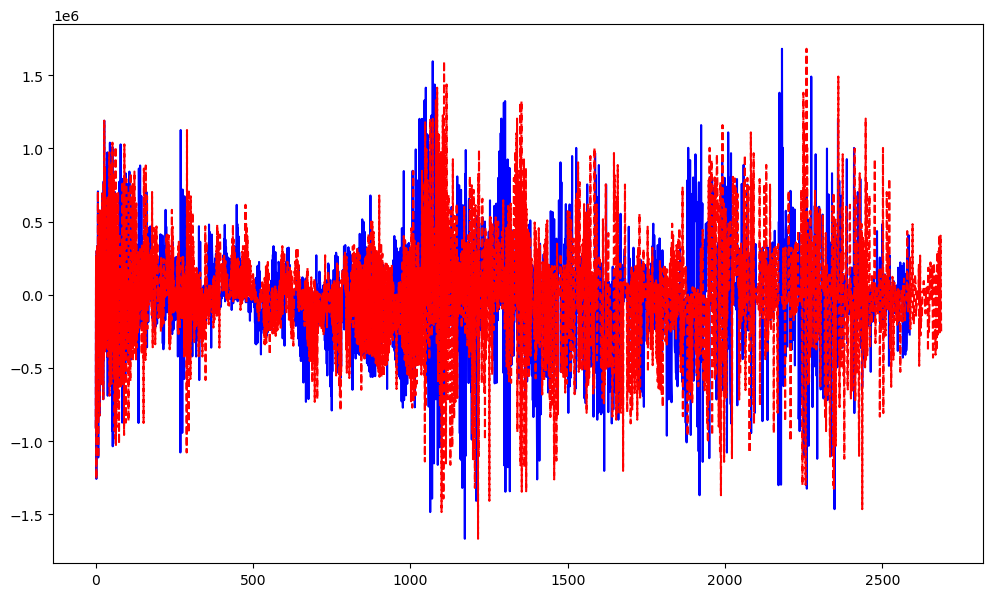

In [10]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(vol_transport_10km_old.mean('ocean_time').sum('s_rho'),'-b')
# plt.plot(vol_transport_10km_new.mean('ocean_time').sum('s_rho'),'--r')
# # plt.plot(vol_transport_10km_new.mean('ocean_time').sum('s_rho')-vol_transport_10km_old.mean('ocean_time').sum('s_rho'),'-k')

### load variables (vol&heat transp, T,S, z, distance, lat/lon) along/across the contour:

#### 1500m isobath

In [45]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v3')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v3')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v3')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_v2')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_v2')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_v2')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_v2')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [8]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v2')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v2')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v2') # replace for z_rho_1500m_daily_v2 when it finishes (9/8/23)
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_v2')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_v2')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_v2')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_v2')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 101 ms, sys: 43.4 ms, total: 144 ms
Wall time: 494 ms


In [9]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily_v3')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily_v2')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily_v2')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily_v2') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()


CPU times: user 74.5 ms, sys: 33.1 ms, total: 108 ms
Wall time: 476 ms


#### Calving Front


In [40]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v2')
temp_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v2')
salt_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v2')
z_rho_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CF_v2')
dist_along_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CF_v2')
lon_along_10km_CF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CF_v2')
lat_along_10km_CF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CF_v2')
distance_indices_10km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [41]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v2')
temp_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v2')
salt_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v2') # replace for z_rho_CF_daily_v2 when it finishes (9/8/23)
# z_rho_4km_CF = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CF_v2')
dist_along_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CF_v2')
lon_along_4km_CF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CF_v2')
lat_along_4km_CF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CF_v2')
distance_indices_4km_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 53.4 ms, sys: 21 ms, total: 74.4 ms
Wall time: 194 ms


In [42]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_CF_daily_v3')
vol_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CF_daily_v2')
temp_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_CF_daily_v2')
salt_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_CF_daily_v2') # replace for z_rho_CF_5daily when it finishes (9/8/23)
z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()


CPU times: user 74.7 ms, sys: 39.3 ms, total: 114 ms
Wall time: 547 ms


### obtain area and distances

In [13]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [14]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


# Binning the HT into density classes (sigma2)

In [15]:
# rho grid for binning:
rho_grid2=np.arange(36.2,37.4,0.025) # for sigma-2
len_rho_grid2=len(rho_grid2)


In [16]:
# # use salt and temp along the contour to calculate sigma:
sigma_2_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],2000) - 1000
sigma_2_4km = gsw.rho(salt_4km[:,:],temp_4km[:,:],2000) - 1000
sigma_2_4kmNT = gsw.rho(salt_4kmNT[:,:],temp_4kmNT[:,:],2000) - 1000

In [17]:
# same but for calving front (use salt and temp along the contour to calculate sigma):
sigma_2_10km_CF = gsw.rho(salt_10km_CF[:,:],temp_10km_CF[:,:],2000) - 1000
sigma_2_4km_CF = gsw.rho(salt_4km_CF[:,:],temp_4km_CF[:,:],2000) - 1000
sigma_2_4kmNT_CF = gsw.rho(salt_4kmNT_CF[:,:],temp_4kmNT_CF[:,:],2000) - 1000


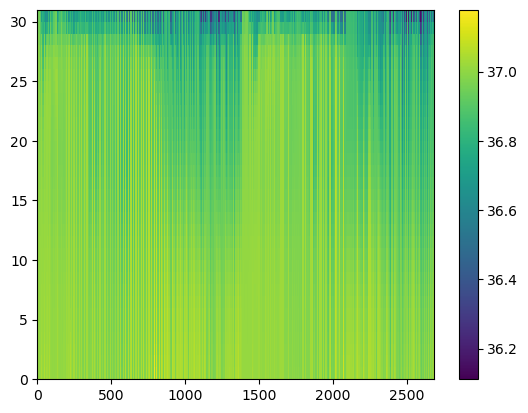

In [18]:
plt.pcolormesh(sigma_2_10km.mean('ocean_time'))#-sigma_2_10km.isel(ocean_time=300))
plt.colorbar()

#### 1500m isobath

In [19]:
# DEFINE coldest temp along contour:

Tf_10km = temp_10km.min().values
Tf_4km = temp_4km.min().values
Tf_4kmNT = temp_4kmNT.min().values

Tf_10km_CF = temp_10km_CF.min().values
Tf_4km_CF = temp_4km_CF.min().values
Tf_4kmNT_CF = temp_4kmNT_CF.min().values

print(Tf_10km)

-4.268398761749268


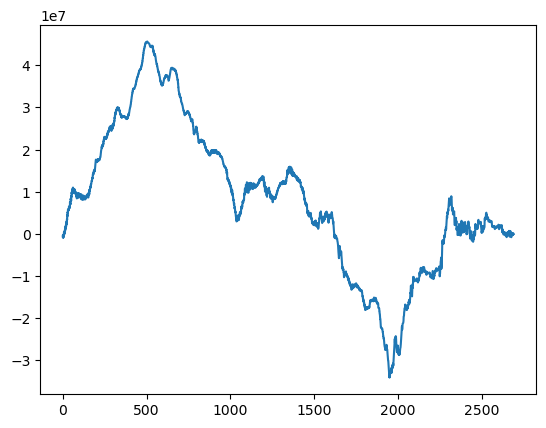

In [38]:
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_10km, axis=1), axis=0), axis=-1))


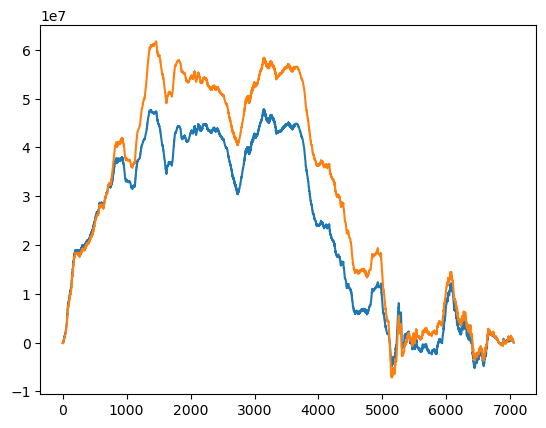

In [39]:
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_4km, axis=1), axis=0), axis=-1))
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_4kmNT, axis=1), axis=0), axis=-1))


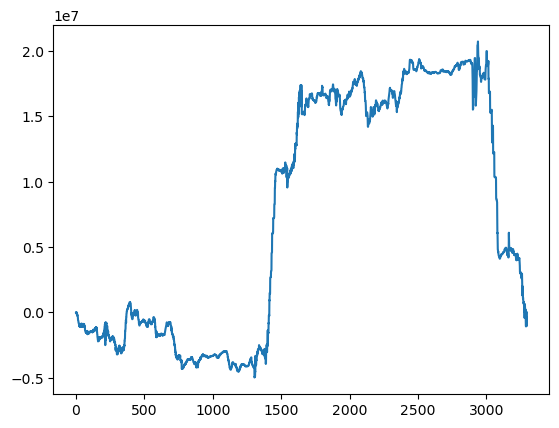

In [43]:
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_10km_CF, axis=1), axis=0), axis=-1))


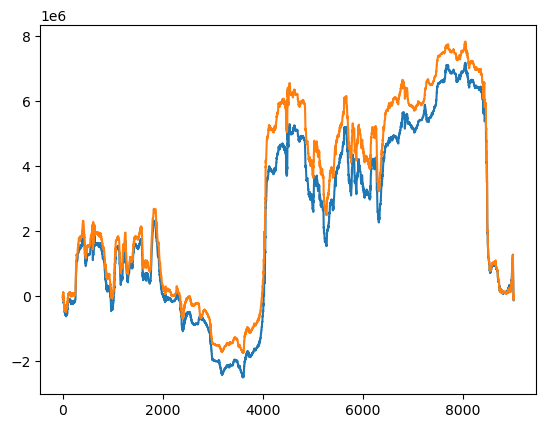

In [44]:
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_4km_CF, axis=1), axis=0), axis=-1))
plt.plot(np.cumsum(np.nanmean(np.sum(vol_transport_4kmNT_CF, axis=1), axis=0), axis=-1))


In [181]:
Mean_transp_10km.shape

(31, 2690)

In [186]:
%time
# WAOM10

Tf = Tf_10km
# Net_heat_transport_10km

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_10km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_10km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_10km_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_10km_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_10km_season = vol_transp_10km_monthly*(temp_10km_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_10km = vol_transport_10km*(temp_10km-Tf) # vT x Cp Rho0
annual_transp_10km = net_heat_transp_10km.mean('ocean_time')
Mean_transp_10km = vol_transport_10km.mean('ocean_time')*(temp_10km.mean('ocean_time')-Tf)

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_10km = np.empty((365,31,2690)) # changed 0->365;
Eddy2_transp_10km = np.empty((365,2690)) # changed 0->365;
Eddy_vol_transp_10km = np.empty((365,31,2690))
# for mm in np.arange(0,12):
for mm in np.arange(0,365):
    aa=np.where(mm == months_flr)
# heat transp
    # Eddy_transp_10km_tmp = ((temp_10km[aa[0],:,:]-Tf)*vol_transport_10km[aa[0],:,:]) - volxT_10km_season[mm,:,:] # minus monthly mean/need more than 1 year of data - calculate from monthly averages yrs 15-20
    # Eddy_transp_10km = np.concatenate((Eddy_transp_10km_tmp, Eddy_transp_10km), axis=0)
        # for now, calculating eddy relative to the annual mean (i.e. seasonal var. is projected into the eddy field):
    Eddy_transp_10km[mm,:,:] = (temp_10km[mm,:,:]-Tf)*vol_transport_10km[mm,:,:] - np.nansum(Mean_transp_10km, axis=0)
    VT_tmp = (temp_10km[mm,:,:]-Tf)*vol_transport_10km[mm,:,:]
    Eddy2_transp_10km[mm,:] = np.nansum(VT_tmp, axis=0) - np.nansum(Mean_transp_10km, axis=0)
# vol transp
    # Eddy_vol_transp_10km_tmp = vol_transport_10km[aa[0],:,:] - vol_transp_10km_monthly[mm,:,:]
    # Eddy_vol_transp_10km = np.concatenate((Eddy_vol_transp_10km_tmp, Eddy_vol_transp_10km), axis=0)
    Eddy_vol_transp_10km[mm,:,:] = vol_transport_10km[mm,:,:] - vol_transp_10km_monthly.mean('ocean_time') #vol_transport_10km.mean('ocean_time')



CPU times: user 2 µs, sys: 6 µs, total: 8 µs
Wall time: 18.6 µs


In [ ]:
%time
# WAOM4
Tf = Tf_4km

# Net_heat_transport_4km

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4km_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4km_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4km_season = vol_transp_4km_monthly*(temp_4km_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_4km = vol_transport_4km*(temp_4km-Tf) # vT x Cp Rho0
Mean_transp_4km = net_heat_transp_4km.mean('ocean_time')

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4km = np.empty((0,31,7051))
Eddy_vol_transp_4km = np.empty((0,31,7051))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4km_tmp = ((temp_4km[aa[0],:,:]-Tf)*vol_transport_4km[aa[0],:,:]) - volxT_4km_season[mm,:,:]
    Eddy_transp_4km = np.concatenate((Eddy_transp_4km_tmp, Eddy_transp_4km), axis=0)
# vol transp
    Eddy_vol_transp_4km_tmp = vol_transport_4km[aa[0],:,:] - vol_transp_4km_monthly[mm,:,:]
    Eddy_vol_transp_4km = np.concatenate((Eddy_vol_transp_4km_tmp, Eddy_vol_transp_4km), axis=0)


In [ ]:
%time
# WAOM4-NT
Tf = Tf_4kmNT

# Net_heat_transport_4kmNT

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4kmNT, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4kmNT, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4kmNT_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4kmNT_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4kmNT_season = vol_transp_4kmNT_monthly*(temp_4kmNT_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_4kmNT = vol_transport_4kmNT*(temp_4kmNT-Tf) # vT x Cp Rho0
Mean_transp_4kmNT = net_heat_transp_4kmNT.mean('ocean_time')

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4kmNT = np.empty((0,31,7051))
Eddy_vol_transp_4kmNT = np.empty((0,31,7051))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4kmNT_tmp = ((temp_4kmNT[aa[0],:,:]-Tf)*vol_transport_4kmNT[aa[0],:,:]) - volxT_4kmNT_season[mm,:,:]
    Eddy_transp_4kmNT = np.concatenate((Eddy_transp_4kmNT_tmp, Eddy_transp_4kmNT), axis=0)
# vol transp
    Eddy_vol_transp_4kmNT_tmp = vol_transport_4kmNT[aa[0],:,:] - vol_transp_4kmNT_monthly[mm,:,:]
    Eddy_vol_transp_4kmNT = np.concatenate((Eddy_vol_transp_4kmNT_tmp, Eddy_vol_transp_4kmNT), axis=0)

#### Calving Front

In [ ]:
%time
# WAOM10
Tf = Tf_10km_CF

# Net_heat_transport_10km_CF

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_10km_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_10km_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_10km_CF_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_10km_CF_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_10km_CF_season = vol_transp_10km_CF_monthly*(temp_10km_CF_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_10km_CF = vol_transport_10km_CF*(temp_10km_CF-Tf) # vT x Cp Rho0
Mean_transp_10km_CF = net_heat_transp_10km_CF.mean('ocean_time')

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_10km_CF = np.empty((0,31,3297))
Eddy_vol_transp_10km_CF = np.empty((0,31,3297))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_10km_CF_tmp = ((temp_10km_CF[aa[0],:,:]-Tf)*vol_transport_10km_CF[aa[0],:,:]) - volxT_10km_CF_season[mm,:,:]
    Eddy_transp_10km_CF = np.concatenate((Eddy_transp_10km_CF_tmp, Eddy_transp_10km_CF), axis=0)
# vol transp
    Eddy_vol_transp_10km_CF_tmp = vol_transport_10km_CF[aa[0],:,:] - vol_transp_10km_CF_monthly[mm,:,:]
    Eddy_vol_transp_10km_CF = np.concatenate((Eddy_vol_transp_10km_CF_tmp, Eddy_vol_transp_10km_CF), axis=0)



In [ ]:
%time
# WAOM4
Tf = Tf_4km_CF

# Net_heat_transport_4km_CF

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4km_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4km_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4km_CF_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4km_CF_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4km_CF_season = vol_transp_4km_CF_monthly*(temp_4km_CF_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_4km_CF = vol_transport_4km_CF*(temp_4km_CF-Tf) # vT x Cp Rho0
Mean_transp_4km_CF = net_heat_transp_4km_CF.mean('ocean_time')

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4km_CF = np.empty((0,31,9014))
Eddy_vol_transp_4km_CF = np.empty((0,31,9014))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4km_CF_tmp = ((temp_4km_CF[aa[0],:,:]-Tf)*vol_transport_4km_CF[aa[0],:,:]) - volxT_4km_CF_season[mm,:,:]
    Eddy_transp_4km_CF = np.concatenate((Eddy_transp_4km_CF_tmp, Eddy_transp_4km_CF), axis=0)
# vol transp
    Eddy_vol_transp_4km_CF_tmp = vol_transport_4km_CF[aa[0],:,:] - vol_transp_4km_CF_monthly[mm,:,:]
    Eddy_vol_transp_4km_CF = np.concatenate((Eddy_vol_transp_4km_CF_tmp, Eddy_vol_transp_4km_CF), axis=0)

In [ ]:
%time
# WAOM4-NT
Tf = Tf_4km_CF

# Net_heat_transport_4kmNT_CF

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4kmNT_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4kmNT_CF, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4kmNT_CF_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4kmNT_CF_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4kmNT_CF_season = vol_transp_4kmNT_CF_monthly*(temp_4kmNT_CF_monthly-Tf) # vT x Cp Rho0

# 2) Mean heat transport: average(vol_transp*T)
net_heat_transp_4kmNT_CF = vol_transport_4kmNT_CF*(temp_4kmNT_CF-Tf) # vT x Cp Rho0
Mean_transp_4kmNT_CF = net_heat_transp_4kmNT_CF.mean('ocean_time')

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4kmNT_CF = np.empty((0,31,9014))
Eddy_vol_transp_4kmNT_CF = np.empty((0,31,9014))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4kmNT_CF_tmp = ((temp_4kmNT_CF[aa[0],:,:]-Tf)*vol_transport_4kmNT_CF[aa[0],:,:]) - volxT_4kmNT_CF_season[mm,:,:]
    Eddy_transp_4kmNT_CF = np.concatenate((Eddy_transp_4kmNT_CF_tmp, Eddy_transp_4kmNT_CF), axis=0)
# vol transp
    Eddy_vol_transp_4kmNT_CF_tmp = vol_transport_4kmNT_CF[aa[0],:,:] - vol_transp_4kmNT_CF_monthly[mm,:,:]
    Eddy_vol_transp_4kmNT_CF = np.concatenate((Eddy_vol_transp_4kmNT_CF_tmp, Eddy_vol_transp_4kmNT_CF), axis=0)

In [ ]:
del Tf

### do some plots

##### plots cumsum for checking:

In [75]:
Eddy_transp_10km.shape

(365, 31, 2690)

Text(0.5, 1.0, 'heat transport cum. summed - WAOM10')

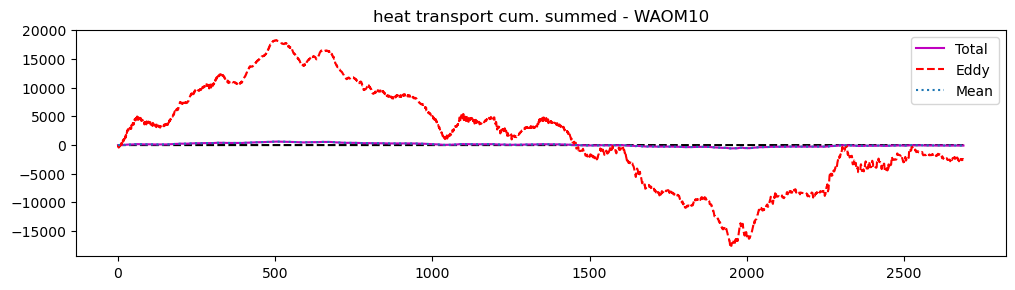

In [185]:

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
cumsum_total = np.cumsum(net_heat_transp_10km.sum('s_rho').mean('ocean_time'),axis=-1)*rho0*Cp*1e-12
cumsum_eddy = np.cumsum(np.nansum(np.nanmean(Eddy_transp_10km, axis=0),axis=0),axis=-1)*rho0*Cp*1e-12
cumsum_mean = np.cumsum(Mean_transp_10km.sum('s_rho'),axis=-1)*rho0*Cp*1e-12
# cum sum 1500m
ax1.plot(cumsum_total*0,'--k')
ax1.plot(cumsum_total,'-m',label='Total')
ax1.plot(cumsum_eddy,'--r',label='Eddy')
ax1.plot(cumsum_mean,':',label='Mean')
# ax1.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
# ax1.plot(-(cumsum_total+cumsum_eddy),'--',label='Net2')
ax1.legend()
ax1.set_title('heat transport cum. summed - WAOM10')

# ax2 = fig.add_subplot(312)
# cumsum_total = np.cumsum(net_heat_transp_4km.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4km, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
# cumsum_mean = np.cumsum(Mean_transp_4km.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# # cum sum 1500m
# # ax2.plot(cumsum_total,'-m',label='Total')
# ax2.plot(cumsum_eddy,'--r',label='Eddy')
# ax2.plot(cumsum_mean,':',label='Mean')
# ax2.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
# # ax2.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
# ax2.legend()
# ax2.set_title('heat transport cum. summed - WAOM4')

# ax3 = fig.add_subplot(313)
# cumsum_total = np.cumsum(net_heat_transp_4kmNT.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4kmNT, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
# cumsum_mean = np.cumsum(Mean_transp_4kmNT.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# # cum sum 1500m
# # ax3.plot(cumsum_total,'-m',label='Total')
# ax3.plot(cumsum_eddy,'--r',label='Eddy')
# ax3.plot(cumsum_mean,':',label='Mean')
# ax3.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
# # ax3.plot(-(cumsum_total+cumsum_eddy),'--',label='Net2')
# ax3.legend()
# ax3.set_title('heat transport cum. summed - WAOM4-NOTIDE')


Text(0.5, 1.0, 'vol transport cum. summed - WAOM10')

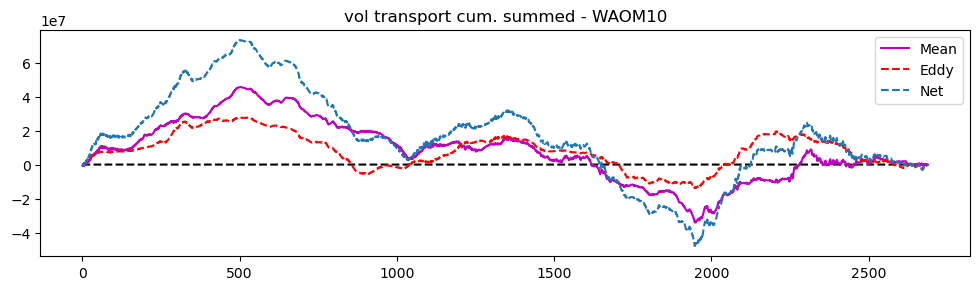

In [151]:

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
cumsum_total = np.cumsum(vol_transport_10km.mean('ocean_time').sum('s_rho'),axis=-1)
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_10km, axis=1),axis=0),axis=-1)*365
# cum sum 1500m
ax1.plot(cumsum_total*0,'--k')
ax1.plot(cumsum_total,'-m',label='Mean')
ax1.plot(cumsum_eddy,'--r',label='Eddy')
ax1.plot((cumsum_total+cumsum_eddy),'--',label='Net')
ax1.legend()
ax1.set_title('vol transport cum. summed - WAOM10')

# ax2 = fig.add_subplot(312)
# cumsum_total = np.cumsum(vol_transport_4km.mean('ocean_time').sum('s_rho'),axis=-1)
# cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4km, axis=1),axis=0),axis=-1)*365
# # cum sum 1500m
# ax2.plot(cumsum_total,'-m',label='Mean')
# ax2.plot(cumsum_eddy,'--r',label='Eddy')
# ax2.plot((cumsum_total+cumsum_eddy),'--',label='Net')
# ax2.legend()
# ax2.set_title('vol transport cum. summed - WAOM4')

# ax3 = fig.add_subplot(313)
# cumsum_total = np.cumsum(vol_transport_4kmNT.mean('ocean_time').sum('s_rho'),axis=-1)
# cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4kmNT, axis=1),axis=0),axis=-1)*365
# # cum sum 1500m
# ax3.plot(cumsum_total,'-m',label='Mean')
# ax3.plot(cumsum_eddy,'--r',label='Eddy')
# ax3.plot((cumsum_total+cumsum_eddy),'--',label='Net')
# ax3.legend()
# ax3.set_title('vol transport cum. summed - WAOM4-NOTIDE')


Text(0.5, 1.0, 'heat transport cum. summed (calv. front) - WAOM4-NOTIDE')

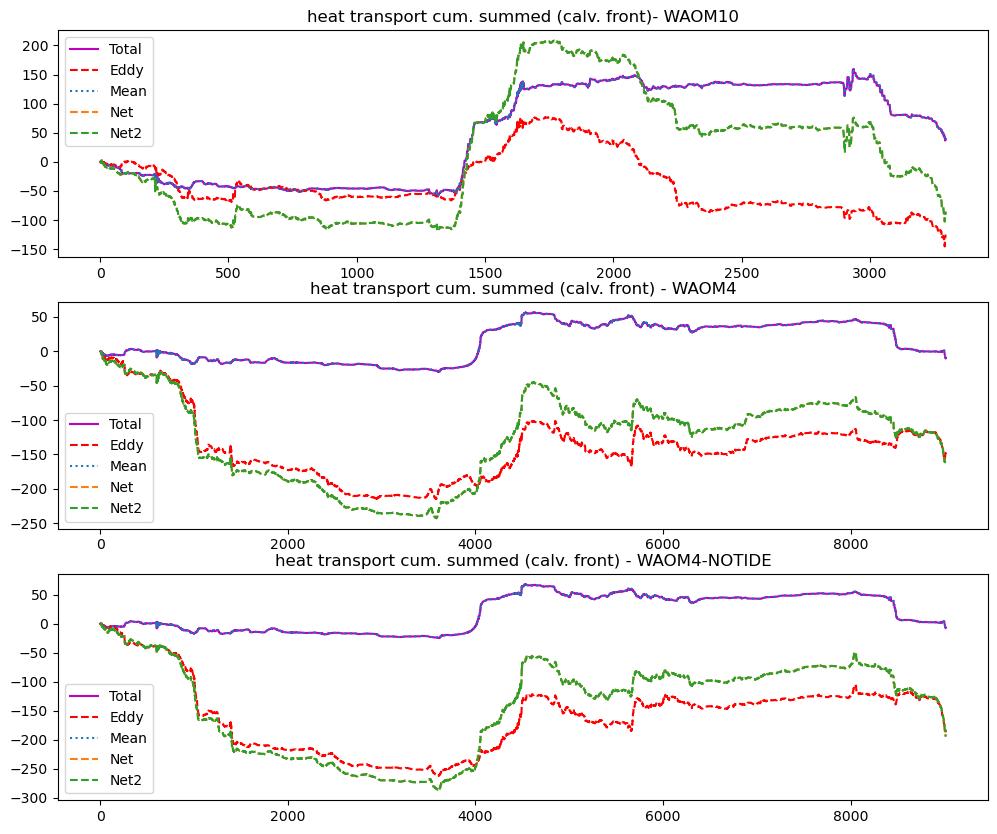

In [133]:
# calving front quick check vint:


fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
cumsum_total = np.cumsum(net_heat_transp_10km_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_10km_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean = np.cumsum(Mean_transp_10km_CF.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cum sum 1500m
ax1.plot(cumsum_total,'-m',label='Total')
ax1.plot(cumsum_eddy,'--r',label='Eddy')
ax1.plot(cumsum_mean,':',label='Mean')
ax1.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
ax1.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax1.legend()
ax1.set_title('heat transport cum. summed (calv. front)- WAOM10')

ax2 = fig.add_subplot(312)
cumsum_total = np.cumsum(net_heat_transp_4km_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4km_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean = np.cumsum(Mean_transp_4km_CF.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cum sum 1500m
ax2.plot(cumsum_total,'-m',label='Total')
ax2.plot(cumsum_eddy,'--r',label='Eddy')
ax2.plot(cumsum_mean,':',label='Mean')
ax2.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
ax2.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax2.legend()
ax2.set_title('heat transport cum. summed (calv. front) - WAOM4')

ax3 = fig.add_subplot(313)
cumsum_total = np.cumsum(net_heat_transp_4kmNT_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4kmNT_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean = np.cumsum(Mean_transp_4kmNT_CF.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cum sum 1500m
ax3.plot(cumsum_total,'-m',label='Total')
ax3.plot(cumsum_eddy,'--r',label='Eddy')
ax3.plot(cumsum_mean,':',label='Mean')
ax3.plot((cumsum_mean+cumsum_eddy),'--',label='Net')
ax3.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax3.legend()
ax3.set_title('heat transport cum. summed (calv. front) - WAOM4-NOTIDE')


Text(0.5, 1.0, 'vol transport cum. summed (Calv. front) - WAOM4-NOTIDE')

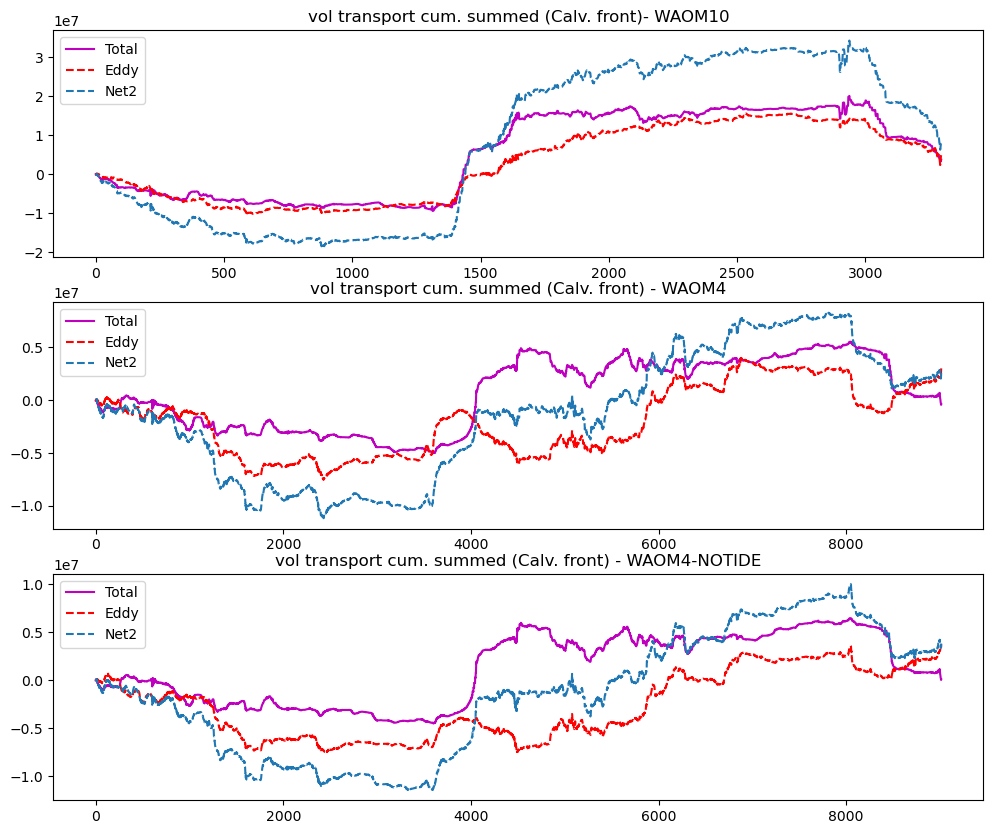

In [134]:
# Calving front quick check vint:

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(311)
cumsum_total = np.cumsum(vol_transport_10km_CF.mean('ocean_time').sum('s_rho'),axis=-1)
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_10km_CF, axis=1),axis=0),axis=-1)*365.25
# cum sum 1500m
ax1.plot(cumsum_total,'-m',label='Total')
ax1.plot(cumsum_eddy,'--r',label='Eddy')
ax1.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax1.legend()
ax1.set_title('vol transport cum. summed (Calv. front)- WAOM10')

ax2 = fig.add_subplot(312)
cumsum_total = np.cumsum(vol_transport_4km_CF.mean('ocean_time').sum('s_rho'),axis=-1)
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4km_CF, axis=1),axis=0),axis=-1)*365.25
# cum sum 1500m
ax2.plot(cumsum_total,'-m',label='Total')
ax2.plot(cumsum_eddy,'--r',label='Eddy')
ax2.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax2.legend()
ax2.set_title('vol transport cum. summed (Calv. front) - WAOM4')

ax3 = fig.add_subplot(313)
cumsum_total = np.cumsum(vol_transport_4kmNT_CF.mean('ocean_time').sum('s_rho'),axis=-1)
cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4kmNT_CF, axis=1),axis=0),axis=-1)*365.25
# cum sum 1500m
ax3.plot(cumsum_total,'-m',label='Total')
ax3.plot(cumsum_eddy,'--r',label='Eddy')
ax3.plot((cumsum_total+cumsum_eddy),'--',label='Net2')
ax3.legend()
ax3.set_title('vol transport cum. summed (Calv. front) - WAOM4-NOTIDE')


### Binning in density: calculate net heat transport (Abs - Tf) across contour per density bin in $\sigma_2$

##### if not run before, run to calculate and save mean and eddy componentes of the CSHT:

###### run and save tmp files for 1500m isobath

In [25]:
%%time

# WAOM10

# Eddy_transp_10km
# Mean_transp_10km


Mean_HT_10km_irho2 = np.empty((len(net_heat_transp_10km[:,0,0]),len_rho_grid2,len(net_heat_transp_10km[0,:,0]),len(net_heat_transp_10km[0,0,:])))
Eddy_HT_10km_irho2 = np.empty((len(net_heat_transp_10km[:,0,0]),len_rho_grid2,len(net_heat_transp_10km[0,:,0]),len(net_heat_transp_10km[0,0,:])))
Mean_VT_10km_irho2 = np.empty((len(net_heat_transp_10km[:,0,0]),len_rho_grid2,len(net_heat_transp_10km[0,:,0]),len(net_heat_transp_10km[0,0,:])))
Eddy_VT_10km_irho2 = np.empty((len(net_heat_transp_10km[:,0,0]),len_rho_grid2,len(net_heat_transp_10km[0,:,0]),len(net_heat_transp_10km[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_10km[tt,zz,:])
            eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_10km[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_10km[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_10km[tt,zz,:])

            if irho == 0:
                eddy_HT_delta = eddy_HT_tmp.copy()
                eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = mean_HT_tmp.copy()
                mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            del mean_HT_tmp
            del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp
    
        Mean_HT_10km_irho2[tt,:,zz,:] = mean_HT_delta
        Eddy_HT_10km_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_10km_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_10km_irho2[tt,:,zz,:] = eddy_VT_delta



In [26]:
%%time

# WAOM4

# Eddy_transp_4km
# Mean_transp_4km


Mean_HT_4km_irho2 = np.empty((len(net_heat_transp_4km[:,0,0]),len_rho_grid2,len(net_heat_transp_4km[0,:,0]),len(net_heat_transp_4km[0,0,:])))
Eddy_HT_4km_irho2 = np.empty((len(net_heat_transp_4km[:,0,0]),len_rho_grid2,len(net_heat_transp_4km[0,:,0]),len(net_heat_transp_4km[0,0,:])))
Mean_VT_4km_irho2 = np.empty((len(net_heat_transp_4km[:,0,0]),len_rho_grid2,len(net_heat_transp_4km[0,:,0]),len(net_heat_transp_4km[0,0,:])))
Eddy_VT_4km_irho2 = np.empty((len(net_heat_transp_4km[:,0,0]),len_rho_grid2,len(net_heat_transp_4km[0,:,0]),len(net_heat_transp_4km[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_4km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_4km[tt,zz,:])
            eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_4km[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_4km[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_4km[tt,zz,:])

            if irho == 0:
                eddy_HT_delta = eddy_HT_tmp.copy()
                eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = mean_HT_tmp.copy()
                mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            del mean_HT_tmp
            del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp

        Mean_HT_4km_irho2[tt,:,zz,:] = mean_HT_delta
        Eddy_HT_4km_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_4km_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_4km_irho2[tt,:,zz,:] = eddy_VT_delta



In [27]:
%%time

# WAOM4-NOTIDE

# Eddy_transp_4kmNT
# Mean_transp_4kmNT


Mean_HT_4kmNT_irho2 = np.empty((len(net_heat_transp_4kmNT[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT[0,:,0]),len(net_heat_transp_4kmNT[0,0,:])))
Eddy_HT_4kmNT_irho2 = np.empty((len(net_heat_transp_4kmNT[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT[0,:,0]),len(net_heat_transp_4kmNT[0,0,:])))
Mean_VT_4kmNT_irho2 = np.empty((len(net_heat_transp_4kmNT[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT[0,:,0]),len(net_heat_transp_4kmNT[0,0,:])))
Eddy_VT_4kmNT_irho2 = np.empty((len(net_heat_transp_4kmNT[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT[0,:,0]),len(net_heat_transp_4kmNT[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_4kmNT[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4kmNT[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_4kmNT[tt,zz,:])
            eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_4kmNT[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_4kmNT[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_4kmNT[tt,zz,:])

            if irho == 0:
                eddy_HT_delta = eddy_HT_tmp.copy()
                eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = mean_HT_tmp.copy()
                mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            del mean_HT_tmp
            del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp

        Mean_HT_4kmNT_irho2[tt,:,zz,:] = mean_HT_delta
        Eddy_HT_4kmNT_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_4kmNT_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_4kmNT_irho2[tt,:,zz,:] = eddy_VT_delta



Save tmp files w/ Mean/Eddy_HT_10km/4km/4kmNT_irho2

In [44]:
# # save to netcdf file:
# files_path = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

### HEAT TRANSPORT:
# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_10km[0,0,:]))))
# Mean_HT_10km_irho2_xr = xr.DataArray(Mean_HT_10km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_10km_irho2_xr = xr.DataArray(Eddy_HT_10km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_HT_10km_irho2_xr.to_netcdf(files_path + 'WAOM10_MeanHT_1500m_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_10km_irho2_xr.to_netcdf(files_path + 'WAOM10_EddyHT_1500m_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4km[0,0,:]))))
# Mean_HT_4km_irho2_xr = xr.DataArray(Mean_HT_4km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_4km_irho2_xr = xr.DataArray(Eddy_HT_4km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_HT_4km_irho2_xr.to_netcdf(files_path + 'WAOM4_MeanHT_1500m_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_4km_irho2_xr.to_netcdf(files_path + 'WAOM4_EddyHT_1500m_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4kmNT[0,0,:]))))
# Mean_HT_4kmNT_irho2_xr = xr.DataArray(Mean_HT_4kmNT_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_4kmNT_irho2_xr = xr.DataArray(Eddy_HT_4kmNT_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_HT_4kmNT_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_MeanHT_1500m_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_4kmNT_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_EddyHT_1500m_daily_v2', mode='w', format="NETCDF4")

## VOLUME TRANSPORT:
coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
                    contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_10km[0,0,:]))))
Mean_VT_10km_irho2_xr = xr.DataArray(Mean_VT_10km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
Eddy_VT_10km_irho2_xr = xr.DataArray(Eddy_VT_10km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


Mean_VT_10km_irho2_xr.to_netcdf(files_path + 'WAOM10_MeanVT_1500m_daily_v2', mode='w', format="NETCDF4")
Eddy_VT_10km_irho2_xr.to_netcdf(files_path + 'WAOM10_EddyVT_1500m_daily_v2', mode='w', format="NETCDF4")

coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
                    contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4km[0,0,:]))))
Mean_VT_4km_irho2_xr = xr.DataArray(Mean_VT_4km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
Eddy_VT_4km_irho2_xr = xr.DataArray(Eddy_VT_4km_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])

Mean_VT_4km_irho2_xr.to_netcdf(files_path + 'WAOM4_MeanVT_1500m_daily_v2', mode='w', format="NETCDF4")
Eddy_VT_4km_irho2_xr.to_netcdf(files_path + 'WAOM4_EddyVT_1500m_daily_v2', mode='w', format="NETCDF4")

coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
                    contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4kmNT[0,0,:]))))
Mean_VT_4kmNT_irho2_xr = xr.DataArray(Mean_VT_4kmNT_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
Eddy_VT_4kmNT_irho2_xr = xr.DataArray(Eddy_VT_4kmNT_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])

Mean_VT_4kmNT_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_MeanVT_1500m_daily_v2', mode='w', format="NETCDF4")
Eddy_VT_4kmNT_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_EddyVT_1500m_daily_v2', mode='w', format="NETCDF4")

###### run and save tmp files but for Calving Front:

In [62]:
%%time

# WAOM10

# Eddy_transp_10km_CF
# Mean_transp_10km_CF


# Mean_HT_10km_CF_irho2 = np.empty((len(net_heat_transp_10km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_10km_CF[0,:,0]),len(net_heat_transp_10km_CF[0,0,:])))
# Eddy_HT_10km_CF_irho2 = np.empty((len(net_heat_transp_10km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_10km_CF[0,:,0]),len(net_heat_transp_10km_CF[0,0,:])))
Mean_VT_10km_CF_irho2 = np.empty((len(net_heat_transp_10km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_10km_CF[0,:,0]),len(net_heat_transp_10km_CF[0,0,:])))
Eddy_VT_10km_CF_irho2 = np.empty((len(net_heat_transp_10km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_10km_CF[0,:,0]),len(net_heat_transp_10km_CF[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_10km_CF[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km_CF[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            # mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_10km_CF[tt,zz,:])
            # eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_10km_CF[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_10km_CF[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_10km_CF[tt,zz,:])

            if irho == 0:
                # eddy_HT_delta = eddy_HT_tmp.copy()
                # eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = mean_HT_tmp.copy()
                # mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                # eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                # mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            # del mean_HT_tmp
            # del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp
    
        # Mean_HT_10km_CF_irho2[tt,:,zz,:] = mean_HT_delta
        # Eddy_HT_10km_CF_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_10km_CF_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_10km_CF_irho2[tt,:,zz,:] = eddy_VT_delta



CPU times: user 9min 14s, sys: 28.5 s, total: 9min 43s
Wall time: 9min 13s


In [63]:
%%time

# WAOM4

# Eddy_transp_4km_CF
# Mean_transp_4km_CF


# Mean_HT_4km_CF_irho2 = np.empty((len(net_heat_transp_4km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4km_CF[0,:,0]),len(net_heat_transp_4km_CF[0,0,:])))
# Eddy_HT_4km_CF_irho2 = np.empty((len(net_heat_transp_4km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4km_CF[0,:,0]),len(net_heat_transp_4km_CF[0,0,:])))
Mean_VT_4km_CF_irho2 = np.empty((len(net_heat_transp_4km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4km_CF[0,:,0]),len(net_heat_transp_4km_CF[0,0,:])))
Eddy_VT_4km_CF_irho2 = np.empty((len(net_heat_transp_4km_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4km_CF[0,:,0]),len(net_heat_transp_4km_CF[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_4km_CF[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4km_CF[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            # mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_4km_CF[tt,zz,:])
            # eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_4km_CF[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_4km_CF[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_4km_CF[tt,zz,:])

            if irho == 0:
                # eddy_HT_delta = eddy_HT_tmp.copy()
                # eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = mean_HT_tmp.copy()
                # mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                # eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                # mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            # del mean_HT_tmp
            # del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp
    
        # Mean_HT_4km_CF_irho2[tt,:,zz,:] = mean_HT_delta
        # Eddy_HT_4km_CF_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_4km_CF_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_4km_CF_irho2[tt,:,zz,:] = eddy_VT_delta



CPU times: user 11min 52s, sys: 43.6 s, total: 12min 36s
Wall time: 11min 54s


In [64]:
%%time

# WAOM4-NOTIDE

# Eddy_transp_4kmNT_CF
# Mean_transp_4kmNT_CF


# Mean_HT_4kmNT_CF_irho2 = np.empty((len(net_heat_transp_4kmNT_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT_CF[0,:,0]),len(net_heat_transp_4kmNT_CF[0,0,:])))
# Eddy_HT_4kmNT_CF_irho2 = np.empty((len(net_heat_transp_4kmNT_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT_CF[0,:,0]),len(net_heat_transp_4kmNT_CF[0,0,:])))
Mean_VT_4kmNT_CF_irho2 = np.empty((len(net_heat_transp_4kmNT_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT_CF[0,:,0]),len(net_heat_transp_4kmNT_CF[0,0,:])))
Eddy_VT_4kmNT_CF_irho2 = np.empty((len(net_heat_transp_4kmNT_CF[:,0,0]),len_rho_grid2,len(net_heat_transp_4kmNT_CF[0,:,0]),len(net_heat_transp_4kmNT_CF[0,0,:])))

for tt in np.arange(0,len(net_heat_transp_4kmNT_CF[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4kmNT_CF[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):

            # mean_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), net_heat_transp_4kmNT_CF[tt,zz,:])
            # eddy_HT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_transp_4kmNT_CF[tt,zz,:])
            mean_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), vol_transport_4kmNT_CF[tt,zz,:])
            eddy_VT_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2))), Eddy_vol_transp_4kmNT_CF[tt,zz,:])

            if irho == 0:
                # eddy_HT_delta = eddy_HT_tmp.copy()
                # eddy_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = mean_HT_tmp.copy()
                # mean_HT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = eddy_VT_tmp.copy()
                eddy_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = mean_VT_tmp.copy()
                mean_VT_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
            elif irho == 1:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_delta = np.stack((eddy_HT_delta,eddy_HT_tmp), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_delta = np.stack((mean_HT_delta,mean_HT_tmp), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_delta = np.stack((eddy_VT_delta,eddy_VT_tmp), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_delta = np.stack((mean_VT_delta,mean_VT_tmp), axis=0)
            else:
                # eddy_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # eddy_HT_extradim = np.expand_dims(eddy_HT_tmp, axis=0)
                # eddy_HT_delta = np.concatenate((eddy_HT_delta,eddy_HT_extradim), axis=0)
                # mean_HT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                # mean_HT_extradim = np.expand_dims(mean_HT_tmp, axis=0)
                # mean_HT_delta = np.concatenate((mean_HT_delta,mean_HT_extradim), axis=0)
                eddy_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                eddy_VT_extradim = np.expand_dims(eddy_VT_tmp, axis=0)
                eddy_VT_delta = np.concatenate((eddy_VT_delta,eddy_VT_extradim), axis=0)
                mean_VT_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.025/2)),sigma_tmp > (rho_grid2[irho]+(0.025/2)))] = np.nan
                mean_VT_extradim = np.expand_dims(mean_VT_tmp, axis=0)
                mean_VT_delta = np.concatenate((mean_VT_delta,mean_VT_extradim), axis=0)
        
            # print(mean_HT_delta.shape, zz, mean_HT_tmp.shape)
            # del mean_HT_tmp
            # del eddy_HT_tmp
            del mean_VT_tmp
            del eddy_VT_tmp
    
        # Mean_HT_4kmNT_CF_irho2[tt,:,zz,:] = mean_HT_delta
        # Eddy_HT_4kmNT_CF_irho2[tt,:,zz,:] = eddy_HT_delta
        Mean_VT_4kmNT_CF_irho2[tt,:,zz,:] = mean_VT_delta
        Eddy_VT_4kmNT_CF_irho2[tt,:,zz,:] = eddy_VT_delta



CPU times: user 11min 56s, sys: 1min 51s, total: 13min 48s
Wall time: 13min 5s


In [66]:
# # save to netcdf file:

# ## HEAT TRANSPORT
# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_10km_CF[0,0,:]))))
# Mean_HT_10km_CF_irho2_xr = xr.DataArray(Mean_HT_10km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_10km_CF_irho2_xr = xr.DataArray(Eddy_HT_10km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# files_path = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'
# Mean_HT_10km_CF_irho2_xr.to_netcdf(files_path + 'WAOM10_MeanHT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_10km_CF_irho2_xr.to_netcdf(files_path + 'WAOM10_EddyHT_CF_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4km_CF[0,0,:]))))
# Mean_HT_4km_CF_irho2_xr = xr.DataArray(Mean_HT_4km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_4km_CF_irho2_xr = xr.DataArray(Eddy_HT_4km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_HT_4km_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_MeanHT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_4km_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_EddyHT_CF_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4kmNT_CF[0,0,:]))))
# Mean_HT_4kmNT_CF_irho2_xr = xr.DataArray(Mean_HT_4kmNT_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_HT_4kmNT_CF_irho2_xr = xr.DataArray(Eddy_HT_4kmNT_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_HT_4kmNT_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_MeanHT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_HT_4kmNT_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_EddyHT_CF_daily_v2', mode='w', format="NETCDF4")

# ## VOLUME TRANSPORT
# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_10km_CF[0,0,:]))))
# Mean_VT_10km_CF_irho2_xr = xr.DataArray(Mean_VT_10km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_VT_10km_CF_irho2_xr = xr.DataArray(Eddy_VT_10km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_VT_10km_CF_irho2_xr.to_netcdf(files_path + 'WAOM10_MeanVT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_VT_10km_CF_irho2_xr.to_netcdf(files_path + 'WAOM10_EddyVT_CF_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4km_CF[0,0,:]))))
# Mean_VT_4km_CF_irho2_xr = xr.DataArray(Mean_VT_4km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_VT_4km_CF_irho2_xr = xr.DataArray(Eddy_VT_4km_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_VT_4km_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_MeanVT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_VT_4km_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_EddyVT_CF_daily_v2', mode='w', format="NETCDF4")

# coordinatesD=dict(ocean_time=months, rho_grid=(['rho_grid'], rho_grid2), s_rho=(['s_rho'], np.arange(0,31)),
#                     contour_index_array=(['contour_index_array'], np.arange(0,len(net_heat_transp_4kmNT_CF[0,0,:]))))
# Mean_VT_4kmNT_CF_irho2_xr = xr.DataArray(Mean_VT_4kmNT_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])
# Eddy_VT_4kmNT_CF_irho2_xr = xr.DataArray(Eddy_VT_4kmNT_CF_irho2, coords = coordinatesD, dims = ['ocean_time','rho_grid','s_rho','contour_index_array'])


# Mean_VT_4kmNT_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_MeanVT_CF_daily_v2', mode='w', format="NETCDF4")
# Eddy_VT_4kmNT_CF_irho2_xr.to_netcdf(files_path + 'WAOM4_notides_EddyVT_CF_daily_v2', mode='w', format="NETCDF4")

##### if run before, load saved mean and eddy components of the CSHT:

In [26]:
files_path = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

dx=xr.open_dataset(files_path + 'WAOM10_MeanHT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_HT_10km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM10_EddyHT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_10km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_MeanHT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_HT_4km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_EddyHT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_4km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_notides_MeanHT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_HT_4kmNT_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_notides_EddyHT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_4kmNT_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()


In [27]:

dx=xr.open_dataset(files_path + 'WAOM10_MeanVT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_VT_10km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM10_EddyVT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_10km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_MeanVT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_VT_4km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_EddyVT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_4km_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_notides_MeanVT_1500m_daily_v2', mode='r', format="NETCDF4")
Mean_VT_4kmNT_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_notides_EddyVT_1500m_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_4kmNT_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()


In [28]:

dx=xr.open_dataset(files_path + 'WAOM10_MeanHT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_HT_10km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM10_EddyHT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_10km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_MeanHT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_HT_4km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_EddyHT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_4km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_notides_MeanHT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_HT_4kmNT_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_notides_EddyHT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_HT_4kmNT_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()


In [29]:

dx=xr.open_dataset(files_path + 'WAOM10_MeanVT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_VT_10km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM10_EddyVT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_10km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_MeanVT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_VT_4km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_EddyVT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_4km_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()

dx=xr.open_dataset(files_path + 'WAOM4_notides_MeanVT_CF_daily_v2', mode='r', format="NETCDF4")
Mean_VT_4kmNT_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()
dx=xr.open_dataset(files_path + 'WAOM4_notides_EddyVT_CF_daily_v2', mode='r', format="NETCDF4")
Eddy_VT_4kmNT_CF_irho2 = dx.variables["__xarray_dataarray_variable__"]
dx.close()


In [24]:
# %%time
# Net_HT_10km_irho2 = Mean_HT_10km_irho2+Eddy_HT_10km_irho2
# Net_HT_4km_irho2 = Mean_HT_4km_irho2+Eddy_HT_4km_irho2
# Net_HT_4kmNT_irho2 = Mean_HT_4kmNT_irho2+Eddy_HT_4kmNT_irho2

CPU times: user 2min 24s, sys: 19min 7s, total: 21min 32s
Wall time: 20min 4s


cumsum along contour:

In [22]:
%%time
# WAOM10
Mean_HT_10km_irho2.load()
Eddy_HT_10km_irho2.load()

# Mean_HT_10km_irho2_tavg_cumsum = Mean_HT_10km_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_10km_irho2_tavg = Eddy_HT_10km_irho2.mean('ocean_time')
# Eddy_HT_10km_irho2_tavg_cumsum = Eddy_HT_10km_irho2_tavg.cumsum('rho_grid') # cumsum along contour
# # cumsum along contour#w/o annual mean & w/o vertical integral:
# Mean_HT_10km_irho2_cumsum = Mean_HT_10km_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_10km_irho2_cumsum = Eddy_HT_10km_irho2.cumsum('rho_grid') # cumsum along contour


CPU times: user 249 µs, sys: 2.79 ms, total: 3.04 ms
Wall time: 19.6 ms


<xarray.Variable (ocean_time: 365, rho_grid: 48, s_rho: 31,
                  contour_index_array: 2588)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])

In [23]:
%%time
# WAOM4

Mean_HT_4km_irho2.load()
Eddy_HT_4km_irho2.load()

# Mean_HT_4km_irho2_tavg_cumsum = Mean_HT_4km_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_4km_irho2_tavg = Eddy_HT_4km_irho2.mean('ocean_time')
# Eddy_HT_4km_irho2_tavg_cumsum = Eddy_HT_4km_irho2_tavg.cumsum('rho_grid') # cumsum along contour
# # cumsum along contour#w/o annual mean & w/o vertical integral:
# Mean_HT_4km_irho2_cumsum = Mean_HT_4km_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_4km_irho2_cumsum = Eddy_HT_4km_irho2.cumsum('rho_grid') # cumsum along contour


CPU times: user 36 µs, sys: 244 µs, total: 280 µs
Wall time: 252 µs


<xarray.Variable (ocean_time: 365, rho_grid: 48, s_rho: 31,
                  contour_index_array: 6919)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])

In [24]:
%%time
# WAOM4-NOTIDE

Mean_HT_4kmNT_irho2.load()
Eddy_HT_4kmNT_irho2.load()

# Mean_HT_4kmNT_irho2_tavg_cumsum = Mean_HT_4kmNT_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_4kmNT_irho2_tavg = Eddy_HT_4kmNT_irho2.mean('ocean_time')
# Eddy_HT_4kmNT_irho2_tavg_cumsum = Eddy_HT_4kmNT_irho2_tavg.cumsum('rho_grid') # cumsum along contour
# # cumsum along contour#w/o annual mean & w/o vertical integral:
# Mean_HT_4kmNT_irho2_cumsum = Mean_HT_4kmNT_irho2.cumsum('rho_grid') # cumsum along contour
# Eddy_HT_4kmNT_irho2_cumsum = Eddy_HT_4kmNT_irho2.cumsum('rho_grid') # cumsum along contour


CPU times: user 18 µs, sys: 110 µs, total: 128 µs
Wall time: 139 µs


<xarray.Variable (ocean_time: 365, rho_grid: 48, s_rho: 31,
                  contour_index_array: 6919)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])

# Plots


In [136]:
%%time

# cumsum_total = np.cumsum(net_heat_transp_10km.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# cumsum_eddy = np.cumsum(np.nanmean(np.nansum(Eddy_transp_10km, axis=1),axis=0),axis=-1)* rho0*Cp*1e-12
# cumsum_mean = np.cumsum(Mean_transp_10km.sum('s_rho'),axis=-1)* rho0*Cp*1e-12
# # cum sum 1500m
# # ax1.plot(-cumsum_total,'-m',label='Total')
# ax1.plot(-cumsum_eddy,'--r',label='Eddy')
# ax1.plot(-cumsum_mean,':',label='Mean')
# ax1.plot(-(cumsum_mean+cumsum_eddy),'--',label='Net')

# 1) define variable cumsum along contour:

cumsum_eddy_10km = np.cumsum(np.nanmean(np.nansum(Eddy_transp_10km, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_10km = np.cumsum(net_heat_transp_10km.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy_4km = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4km, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_4km = np.cumsum(net_heat_transp_4km.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy_4kmNT = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4kmNT, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_4kmNT = np.cumsum(net_heat_transp_4kmNT.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12

# vol transpEddy_transp_10km; needs to multiply by 365
VT_cumsum_eddy_10km = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_10km, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_10km = np.cumsum(vol_transport_10km.mean('ocean_time').sum('s_rho'),axis=-1)
VT_cumsum_eddy_4km = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4km, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_4km = np.cumsum(vol_transport_4km.mean('ocean_time').sum('s_rho'),axis=-1)
VT_cumsum_eddy_4kmNT = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4kmNT, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_4kmNT = np.cumsum(vol_transport_4kmNT.mean('ocean_time').sum('s_rho'),axis=-1)


CPU times: user 3.04 s, sys: 1.47 s, total: 4.51 s
Wall time: 4.03 s


In [135]:
cumsum_eddy_10km_CF = np.cumsum(np.nanmean(np.nansum(Eddy_transp_10km_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_10km_CF = np.cumsum(net_heat_transp_10km_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy_4km_CF = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4km_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_4km_CF = np.cumsum(net_heat_transp_4km_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12
cumsum_eddy_4kmNT_CF = np.cumsum(np.nanmean(np.nansum(Eddy_transp_4kmNT_CF, axis=1),axis=0),axis=-1)*365*rho0*Cp*1e-12
cumsum_mean_4kmNT_CF = np.cumsum(net_heat_transp_4kmNT_CF.mean('ocean_time').sum('s_rho'),axis=-1)* rho0*Cp*1e-12

# vol transp
VT_cumsum_eddy_10km_CF = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_10km_CF, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_10km_CF = np.cumsum(vol_transport_10km_CF.mean('ocean_time').sum('s_rho'),axis=-1)
VT_cumsum_eddy_4km_CF = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4km_CF, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_4km_CF = np.cumsum(vol_transport_4km_CF.mean('ocean_time').sum('s_rho'),axis=-1)
VT_cumsum_eddy_4kmNT_CF = np.cumsum(np.nanmean(np.nansum(Eddy_vol_transp_4kmNT_CF, axis=1),axis=0),axis=-1)*365
VT_cumsum_mean_4kmNT_CF = np.cumsum(vol_transport_4kmNT_CF.mean('ocean_time').sum('s_rho'),axis=-1)

In [107]:
%%time

# 2) calculate OHC depth-integrated:
temp3d_4km.load()
temp3d_4km_K = temp3d_4km+3.47
temp3d_vint_4km_annual = temp3d_4km_K.sum('s_rho').mean('ocean_time')*rho0*Cp
print(temp3d_vint_4km_annual.shape)

temp3d_10km.load()
temp3d_10km_K = temp3d_10km+3.47
temp3d_vint_10km_annual = temp3d_10km_K.sum('s_rho').mean('ocean_time')*rho0*Cp
print(temp3d_vint_10km_annual.shape)


(1400, 1575)
(560, 630)
CPU times: user 3.25 s, sys: 3.15 s, total: 6.4 s
Wall time: 5.71 s


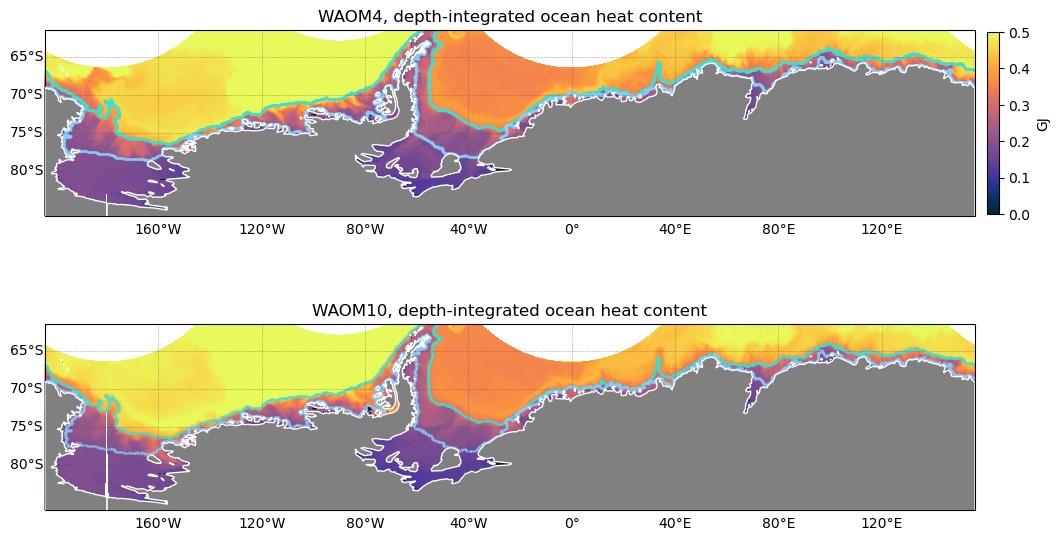

In [108]:
# Comparing OHC 10x4 km:

fig = plt.figure(figsize=(12,7))

# 1) map:
jst= 100
jen=-1
ist=0
ien=-1
tmin = 0
tmax = 0.5
# call cartopy projection
proj = ccrs.PlateCarree(central_longitude=-24)
ax2 = fig.add_subplot(211, projection=proj)
ct1=plt.pcolormesh(lon_rho_4km[jst:jen,ist:ien].values,lat_rho_4km[jst:jen,ist:ien].values,temp3d_vint_4km_annual[jst:jen,ist:ien]*1e-9, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=tmin, vmax=tmax)
plt.scatter(lon_along_4km,lat_along_4km, s=.8, alpha=0.4, color='turquoise',label='1500m isobath', transform=ccrs.PlateCarree());
plt.scatter(lon_along_4km_CF,lat_along_4km_CF, s=.8, alpha=0.4, color='lightskyblue',label='Calving front', transform=ccrs.PlateCarree());
plt.title('WAOM4, depth-integrated ocean heat content')

# ax2.gridlines(draw_labels=True,linewidth=.1)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=.5, color=[.3,.3,.3], alpha=0.75, linestyle=':')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-160, -120, -80, -40, 0, 40, 80, 120, 156])
gl.ylocator = mticker.FixedLocator([-65, -70, -75, -80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 10, 'color': 'k'}
# gl.ylabel_style = {'size': 9, 'color': 'k'}

ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
# plt.colorbar(ct1, location="right")
ax2.set_extent([-180-24, 155, -86, -61.5], crs=ccrs.PlateCarree())
x_left, x_right = ax2.get_xlim()
y_low, y_high = ax2.get_ylim()
ratio = .2
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# 2) map WAOM10
jst= 40
jen=-1
ist=0
ien=-1
ax1 = fig.add_subplot(212, projection=proj)
ct1=plt.pcolormesh(lon_rho_10km[jst:jen,ist:ien].values,lat_rho_10km[jst:jen,ist:ien].values,temp3d_vint_10km_annual[jst:jen,ist:ien]*1e-9, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=tmin, vmax=tmax)
plt.scatter(lon_along_10km,lat_along_10km, s=.8, alpha=0.4, color='turquoise',label='1500m isobath', transform=ccrs.PlateCarree());
plt.scatter(lon_along_10km_CF,lat_along_10km_CF, s=.8, alpha=0.4, color='lightskyblue',label='Calving front', transform=ccrs.PlateCarree());
plt.title('WAOM10, depth-integrated ocean heat content')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=.5, color=[.3,.3,.3], alpha=0.75, linestyle=':')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-160, -120, -80, -40, 0, 40, 80, 120, 156])
gl.ylocator = mticker.FixedLocator([-65, -70, -75, -80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.set_extent([-180-24, 155, -86, -61.5], crs=ccrs.PlateCarree())
x_left, x_right = ax1.get_xlim()
y_low, y_high = ax1.get_ylim()
ratio = .2
ax1.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

cbar_ax1 = fig.add_axes([0.91, 0.575,  0.01, 0.26])
fig.colorbar(ct1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('GJ')#, labelpad=-35)

plt.show()

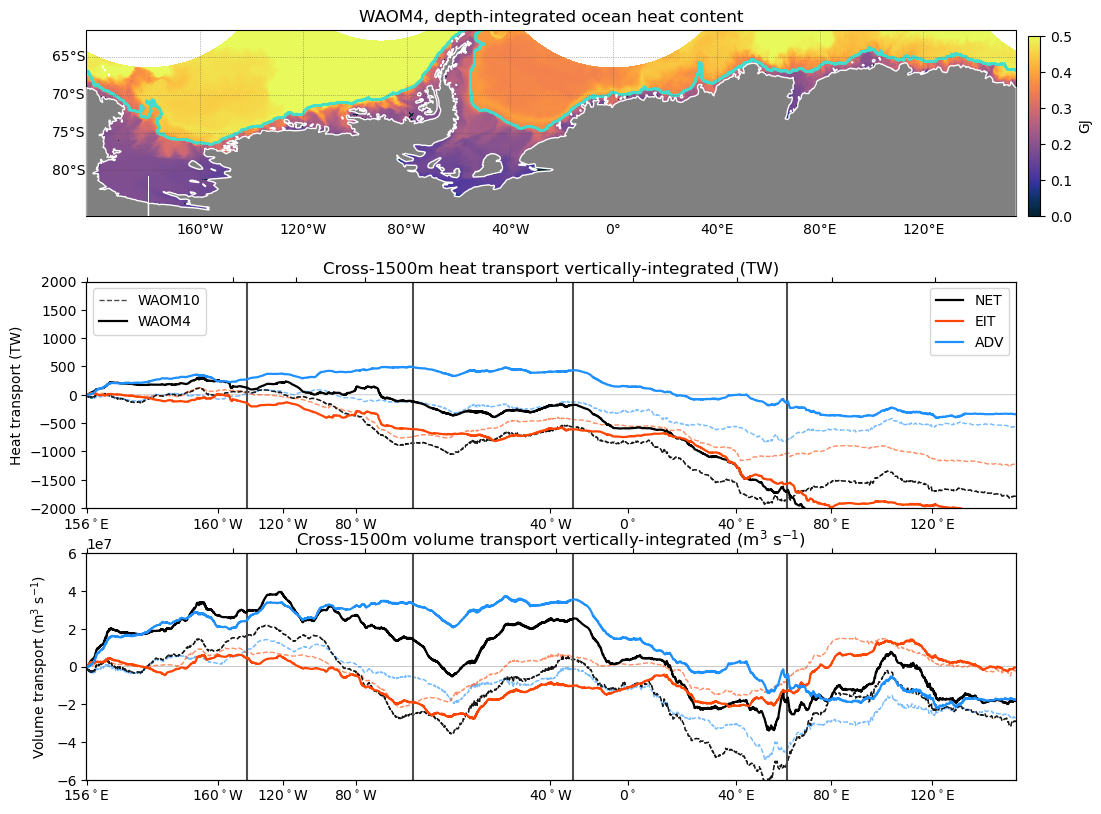

In [137]:
## paper figure with:
# 1) map of OHC depth-integrated
# 2) plot of vertically-integrated  OHT (mean+eddy) across 1500m
# 3) add OHT across CF line below.

### fig, ax = plt.subplots(nrows=2, figsize = (12, 7))
fig = plt.figure(figsize=(12,10))

# 1) map:
jst= 100
jen=-1
ist=0
ien=-1
tmin = 0
tmax = 0.5
# call cartopy projection
proj = ccrs.PlateCarree(central_longitude=-24)
ax2 = fig.add_subplot(311, projection=proj)
ct1=plt.pcolormesh(lon_rho_4km[jst:jen,ist:ien].values,lat_rho_4km[jst:jen,ist:ien].values,temp3d_vint_4km_annual[jst:jen,ist:ien]*1e-9, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=tmin, vmax=tmax)
plt.scatter(lon_along_4km,lat_along_4km, s=.8, alpha=0.4, color='turquoise',label='1500m isobath', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km_CF,lat_along_4km_CF, s=.8, alpha=0.4, color='lightskyblue',label='Calving front', transform=ccrs.PlateCarree());
plt.title('WAOM4, depth-integrated ocean heat content')

# ax2.gridlines(draw_labels=True,linewidth=.1)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=.5, color=[.3,.3,.3], alpha=0.75, linestyle=':')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-160, -120, -80, -40, 0, 40, 80, 120, 156])
gl.ylocator = mticker.FixedLocator([-65, -70, -75, -80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 10, 'color': 'k'}
# gl.ylabel_style = {'size': 9, 'color': 'k'}

ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
# plt.colorbar(ct1, location="right")
ax2.set_extent([-180-24, 155, -86, -61.5], crs=ccrs.PlateCarree())
x_left, x_right = ax2.get_xlim()
y_low, y_high = ax2.get_ylim()
ratio = .2
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

cbar_ax1 = fig.add_axes([0.91, 0.674,  0.01, 0.18])
fig.colorbar(ct1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('GJ')#, labelpad=-35)

# 2) ATTENTION!!! heat transport has to be multiplied by -1 (checked by matching with volume transport).
ax1 = fig.add_subplot(312)
# ax1.text(2,75,'Annual mean and eddy heat transport',fontsize=16)
ax1.plot(dist_along_10km[:],np.zeros(cumsum_mean_10km[:].shape),'-', color=[.7,.7,.7], linewidth=0.5)
ax1.plot(dist_along_10km[:],(cumsum_mean_10km+cumsum_eddy_10km),'--k', label='WAOM10', linewidth=1,alpha=0.7)
ax1.plot(dist_along_4km[0],(cumsum_mean_4km[0]+cumsum_eddy_4km[0]),'-k',label='WAOM4', linewidth=1.6) # plot just to add legend
# ax1.plot(dist_along_4km[0],(cumsum_mean_4kmNT[0]+cumsum_eddy_4kmNT[0]),':k',label='WAOM4-NOTIDE', linewidth=1,alpha=0.7)  # plot just to add legend
ax1.legend(loc='upper left')
ax1.plot(dist_along_10km[:],cumsum_mean_10km,'--',color='dodgerblue', linewidth=1,alpha=0.6)
ax1.plot(dist_along_10km[:],cumsum_eddy_10km,'--',color='orangered',linewidth=1,alpha=0.6)
ax1.plot(dist_along_10km[:],(cumsum_mean_10km+cumsum_eddy_10km),'--k', linewidth=1,alpha=0.7)

ax1.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax1.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax1.set_xlim(0, dist_along_10km[-1])

ax1b = ax1.twiny()
ax1b.plot(dist_along_4km[:],(cumsum_mean_4km+cumsum_eddy_4km),'-k',label='NET', linewidth=1.6)
ax1b.plot(dist_along_4km[:],cumsum_eddy_4km,'-',label='EIT',color='orangered',linewidth=1.6)
ax1b.plot(dist_along_4km[:],cumsum_mean_4km,'-',label='ADV',color='dodgerblue',linewidth=1.6)
ax1b.legend(loc='upper right')
# ax1b.plot(dist_along_4km[:],(cumsum_mean_4kmNT+cumsum_eddy_4kmNT),'-k', linewidth=1,alpha=0.7)
# ax1b.plot(dist_along_4km[:],cumsum_mean_4kmNT,':',color='dodgerblue',linewidth=1,alpha=0.6)
# ax1b.plot(dist_along_4km[:],cumsum_eddy_4kmNT,':',color='orangered',linewidth=1,alpha=0.6)
ax1b.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax1b.set_xticklabels((''))
ax1b.set_xlim(0, dist_along_4km[-1])
ax1b.legend(loc='upper right')

ymin=-2000
ymax=2000
ax1.set_ylim(ymin,ymax)
# ax1.text(dist_along_10km[452].values-2.5,ymin-50,'$\it{Ross}$',fontsize=12, color='k')       
ax1.plot([dist_along_10km[452].values,dist_along_10km[452].values],[ymin,ymax],'-', color=[.3,.3,.3])     #140W    
# ax1.text(dist_along_10km[452].values+.5,ymin-50,'$\it{West\ Ant.}$',fontsize=12, color='k')             
ax1.plot([dist_along_10km[918].values,dist_along_10km[918].values],[ymin,ymax],'-', color=[.3,.3,.3])   # 60W                         
# ax1.text(dist_along_10km[918].values+.5,ymin-50,'$\it{FRIS}$',fontsize=12, color='k')        
ax1.plot([dist_along_10km[1383].values,dist_along_10km[1383].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 25W
# ax1.text(dist_along_10km[1383].values+1.25,ymin-50,'$\it{Maud\ Land}$',fontsize=12, color='k')        
ax1.plot([dist_along_10km[2012].values,dist_along_10km[2012].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 60E 
# ax1.text(dist_along_10km[2012].values+2,ymin-50,'$\it{East\ Ant.}$',fontsize=12, color='k')   
ax1.set_title('Cross-1500m heat transport vertically-integrated (TW)')
ax1.set_ylabel('Heat transport (TW)')

# 3) Volume transp cross-1500m
ax1 = fig.add_subplot(313)
# ax1.text(2,75,'Annual mean and eddy heat transport',fontsize=16)
ax1.plot(dist_along_10km[:],np.zeros(VT_cumsum_mean_10km[:].shape),'-', color=[.7,.7,.7], linewidth=0.5)
ax1.plot(dist_along_10km[:],(VT_cumsum_mean_10km+VT_cumsum_eddy_10km),'--k', label='WAOM10', linewidth=1,alpha=0.7)
ax1.plot(dist_along_4km[0],(VT_cumsum_mean_4km[0]+VT_cumsum_eddy_4km[0]),'-k',label='WAOM4', linewidth=1.6) # plot just to add legend
# ax1.plot(dist_along_4km[0],(VT_cumsum_mean_4kmNT[0]+VT_cumsum_eddy_4kmNT[0]),':k',label='WAOM4-NOTIDE', linewidth=1,alpha=0.7)  # plot just to add legend
# ax1.legend(loc='upper left')
ax1.plot(dist_along_10km[:],VT_cumsum_mean_10km,'--',color='dodgerblue', linewidth=1,alpha=0.6)
ax1.plot(dist_along_10km[:],VT_cumsum_eddy_10km,'--',color='orangered',linewidth=1,alpha=0.6)
ax1.plot(dist_along_10km[:],(VT_cumsum_mean_10km+VT_cumsum_eddy_10km),'--k', linewidth=1,alpha=0.7)

ax1.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax1.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax1.set_xlim(0, dist_along_10km[-1])

ax1b = ax1.twiny()
ax1b.plot(dist_along_4km[:],(VT_cumsum_mean_4km+VT_cumsum_eddy_4km),'-k',label='NET', linewidth=1.6)
ax1b.plot(dist_along_4km[:],VT_cumsum_eddy_4km,'-',label='EIT',color='orangered',linewidth=1.6)
ax1b.plot(dist_along_4km[:],VT_cumsum_mean_4km,'-',label='ADV',color='dodgerblue',linewidth=1.6)
# ax1b.legend(loc='upper right')
# ax1b.plot(dist_along_4km[:],(VT_cumsum_mean_4kmNT+VT_cumsum_eddy_4kmNT),'-k', linewidth=1,alpha=0.7)
# ax1b.plot(dist_along_4km[:],VT_cumsum_mean_4kmNT,':',color='dodgerblue',linewidth=1,alpha=0.6)
# ax1b.plot(dist_along_4km[:],VT_cumsum_eddy_4kmNT,':',color='orangered',linewidth=1,alpha=0.6)
ax1b.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax1b.set_xticklabels((''))
ax1b.set_xlim(0, dist_along_4km[-1])

ymin=-6e7
ymax=6e7
ax1.set_ylim(ymin,ymax)
# ax1.text(dist_along_10km[452].values-2.5,ymin-50,'$\it{Ross}$',fontsize=12, color='k')       
ax1.plot([dist_along_10km[452].values,dist_along_10km[452].values],[ymin,ymax],'-', color=[.3,.3,.3])     #140W    
# ax1.text(dist_along_10km[452].values+.5,ymin-50,'$\it{West\ Ant.}$',fontsize=12, color='k')             
ax1.plot([dist_along_10km[918].values,dist_along_10km[918].values],[ymin,ymax],'-', color=[.3,.3,.3])   # 60W                         
# ax1.text(dist_along_10km[918].values+.5,ymin-50,'$\it{FRIS}$',fontsize=12, color='k')        
ax1.plot([dist_along_10km[1383].values,dist_along_10km[1383].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 25W
# ax1.text(dist_along_10km[1383].values+1.25,ymin-50,'$\it{Maud\ Land}$',fontsize=12, color='k')        
ax1.plot([dist_along_10km[2012].values,dist_along_10km[2012].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 60E 
# ax1.text(dist_along_10km[2012].values+2,ymin-50,'$\it{East\ Ant.}$',fontsize=12, color='k')   
ax1.set_title('Cross-1500m volume transport vertically-integrated (m$^3$ s$^{-1}$)')
ax1.set_ylabel('Volume transport (m$^3$ s$^{-1}$)')


plt.savefig(fig_path + 'Figure1_OHCvint+_MeanEddy_HTcumsum_cross1500m_v2.png', bbox_inches='tight', dpi=300)
# plt.show()

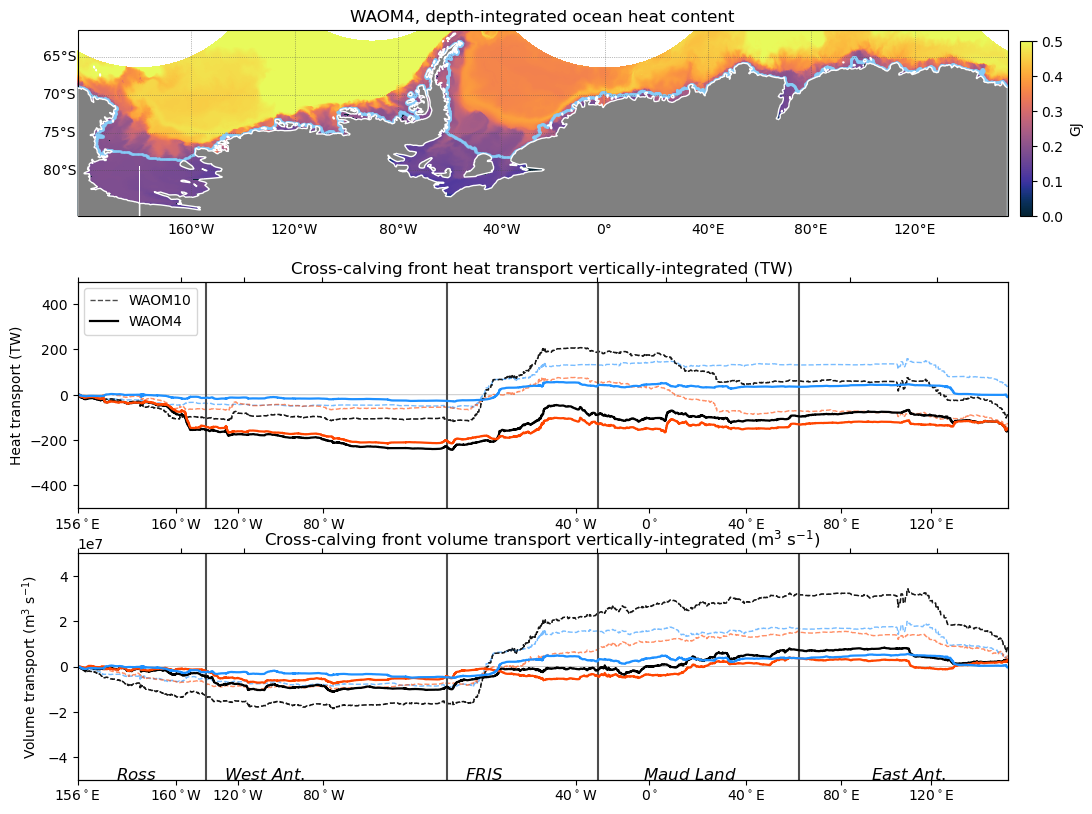

In [138]:
## paper figure with:
# 1) map of OHC depth-integrated
# 2) plot of vertically-integrated  OHT (mean+eddy) across 1500m
# 3) add OHT across CF line below.

### fig, ax = plt.subplots(nrows=2, figsize = (12, 7))
fig = plt.figure(figsize=(12,10))

# 1) map:
jst= 100
jen=-1
ist=0
ien=-1
tmin = 0
tmax = 0.5
# call cartopy projection
proj = ccrs.PlateCarree(central_longitude=-24)
ax2 = fig.add_subplot(311, projection=proj)
ct1=plt.pcolormesh(lon_rho_4km[jst:jen,ist:ien].values,lat_rho_4km[jst:jen,ist:ien].values,temp3d_vint_4km_annual[jst:jen,ist:ien]*1e-9, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=tmin, vmax=tmax)
# plt.scatter(lon_along_4km,lat_along_4km, s=.8, alpha=0.4, color='turquoise',label='1500m isobath', transform=ccrs.PlateCarree());
plt.scatter(lon_along_4km_CF,lat_along_4km_CF, s=.8, alpha=0.4, color='lightskyblue',label='Calving front', transform=ccrs.PlateCarree());
plt.title('WAOM4, depth-integrated ocean heat content')

# ax2.gridlines(draw_labels=True,linewidth=.1)
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=.5, color=[.3,.3,.3], alpha=0.75, linestyle=':')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-160, -120, -80, -40, 0, 40, 80, 120, 156])
gl.ylocator = mticker.FixedLocator([-65, -70, -75, -80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 10, 'color': 'k'}
# gl.ylabel_style = {'size': 9, 'color': 'k'}

ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
# plt.colorbar(ct1, location="right")
ax2.set_extent([-180-24, 155, -86, -61.5], crs=ccrs.PlateCarree())
x_left, x_right = ax2.get_xlim()
y_low, y_high = ax2.get_ylim()
ratio = .2
ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

cbar_ax1 = fig.add_axes([0.91, 0.674,  0.01, 0.175])
fig.colorbar(ct1, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('GJ')#, labelpad=-35)

# 2) Calving front v-int HT
ax3 = fig.add_subplot(312)
# ax1.text(2,75,'Annual mean and eddy heat transport',fontsize=16)
ax3.plot(dist_along_10km_CF[:],np.zeros(cumsum_mean_10km_CF[:].shape),'-', color=[.7,.7,.7], linewidth=0.5)
ax3.plot(dist_along_10km_CF[:],(cumsum_mean_10km_CF+cumsum_eddy_10km_CF),'--k', label='WAOM10', linewidth=1,alpha=0.7)
ax3.plot(dist_along_4km_CF[0],(cumsum_mean_4km_CF[0]+cumsum_eddy_4km_CF[0]),'-k',label='WAOM4', linewidth=1.6) # plot just to add legend
# ax3.plot(dist_along_4km_CF[0],-(cumsum_mean_4kmNT_CF[0]+cumsum_eddy_4kmNT_CF[0]),':k',label='WAOM4-NOTIDE', linewidth=1,alpha=0.7)  # plot just to add legend
ax3.legend(loc='upper left')
ax3.plot(dist_along_10km_CF[:],cumsum_mean_10km_CF,'--',color='dodgerblue', linewidth=1,alpha=0.6)
ax3.plot(dist_along_10km_CF[:],cumsum_eddy_10km_CF,'--',color='orangered',linewidth=1,alpha=0.6)
ax3.plot(dist_along_10km_CF[:],(cumsum_mean_10km_CF+cumsum_eddy_10km_CF),'--k', linewidth=1,alpha=0.7)

ax3.set_xticks(dist_along_10km_CF[distance_indices_10km_CF.astype(int)[:]])
ax3.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax3.set_xlim(0, dist_along_10km_CF[-1])

ymin=-500
ymax=500
ax3.set_ylim(ymin,ymax)
# ax3.text(dist_along_10km_CF[436].values-2.5,ymin-50,'$\it{Ross}$',fontsize=12, color='k')       
ax3.plot([dist_along_10km_CF[436].values,dist_along_10km_CF[436].values],[ymin,ymax],'-', color=[.3,.3,.3])     #140W    
# ax3.text(dist_along_10km_CF[436].values+.5,ymin-50,'$\it{West\ Ant.}$',fontsize=12, color='k')             
ax3.plot([dist_along_10km_CF[1293].values,dist_along_10km_CF[1293].values],[ymin,ymax],'-', color=[.3,.3,.3])   # 60W                         
# ax3.text(dist_along_10km_CF[1293].values+.5,ymin-50,'$\it{FRIS}$',fontsize=12, color='k')        
ax3.plot([dist_along_10km_CF[1826].values,dist_along_10km_CF[1826].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 25W
# ax3.text(dist_along_10km_CF[1826].values+1.25,ymin-50,'$\it{Maud\ Land}$',fontsize=12, color='k')        
ax3.plot([dist_along_10km_CF[2540].values,dist_along_10km_CF[2540].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 60E 
# ax3.text(dist_along_10km_CF[2540].values+2,ymin-50,'$\it{East\ Ant.}$',fontsize=12, color='k')   
ax3.set_title('Cross-calving front heat transport vertically-integrated (TW)')
ax3.set_ylabel('Heat transport (TW)')

ax3b = ax3.twiny()
ax3b.plot(dist_along_4km_CF[:],(cumsum_mean_4km_CF+cumsum_eddy_4km_CF),'-k',label='NET', linewidth=1.6)
ax3b.plot(dist_along_4km_CF[:],cumsum_eddy_4km_CF,'-',label='EIT',color='orangered',linewidth=1.6)
ax3b.plot(dist_along_4km_CF[:],cumsum_mean_4km_CF,'-',label='ADV',color='dodgerblue',linewidth=1.6)
# ax3b.legend(loc='upper right')
# ax3b.plot(dist_along_4km_CF[:],(cumsum_mean_4kmNT_CF+cumsum_eddy_4kmNT_CF),'-k', linewidth=1,alpha=0.7)
# ax3b.plot(dist_along_4km_CF[:],cumsum_mean_4kmNT_CF,':',color='dodgerblue',linewidth=1,alpha=0.6)
# ax3b.plot(dist_along_4km_CF[:],cumsum_eddy_4kmNT_CF,':',color='orangered',linewidth=1,alpha=0.6)
ax3b.set_xticks(dist_along_4km_CF[distance_indices_4km_CF.astype(int)[:]])
ax3b.set_xticklabels((''))
ax3b.set_xlim(0, dist_along_4km_CF[-1])
# ax3b.legend(loc='upper right')

# 3) Calving front v-int VT
ax3 = fig.add_subplot(313)
# ax1.text(2,75,'Annual mean and eddy heat transport',fontsize=16)
ax3.plot(dist_along_10km_CF[:],np.zeros(VT_cumsum_mean_10km_CF[:].shape),'-', color=[.7,.7,.7], linewidth=0.5)
ax3.plot(dist_along_10km_CF[:],(VT_cumsum_mean_10km_CF+VT_cumsum_eddy_10km_CF),'--k', label='WAOM10', linewidth=1,alpha=0.7)
ax3.plot(dist_along_4km_CF[0],(VT_cumsum_mean_4km_CF[0]+VT_cumsum_eddy_4km_CF[0]),'-k',label='WAOM4', linewidth=1.6) # plot just to add legend
# ax3.plot(dist_along_4km_CF[0],(VT_cumsum_mean_4kmNT_CF[0]+cumsum_eddy_4kmNT_CF[0]),':k',label='WAOM4-NOTIDE', linewidth=1,alpha=0.7)  # plot just to add legend
# ax3.legend(loc='upper left')
ax3.plot(dist_along_10km_CF[:],VT_cumsum_mean_10km_CF,'--',color='dodgerblue', linewidth=1,alpha=0.6)
ax3.plot(dist_along_10km_CF[:],VT_cumsum_eddy_10km_CF,'--',color='orangered',linewidth=1,alpha=0.6)
ax3.plot(dist_along_10km_CF[:],(VT_cumsum_mean_10km_CF+VT_cumsum_eddy_10km_CF),'--k', linewidth=1,alpha=0.7)

ax3.set_xticks(dist_along_10km_CF[distance_indices_10km_CF.astype(int)[:]])
ax3.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax3.set_xlim(0, dist_along_10km_CF[-1])

ymin=-5e7
ymax=5e7
ax3.set_ylim(ymin,ymax)
ax3.text(dist_along_10km_CF[436].values-2.5,ymin-50,'$\it{Ross}$',fontsize=12, color='k')       
ax3.plot([dist_along_10km_CF[436].values,dist_along_10km_CF[436].values],[ymin,ymax],'-', color=[.3,.3,.3])     #140W    
ax3.text(dist_along_10km_CF[436].values+.5,ymin-50,'$\it{West\ Ant.}$',fontsize=12, color='k')             
ax3.plot([dist_along_10km_CF[1293].values,dist_along_10km_CF[1293].values],[ymin,ymax],'-', color=[.3,.3,.3])   # 60W                         
ax3.text(dist_along_10km_CF[1293].values+.5,ymin-50,'$\it{FRIS}$',fontsize=12, color='k')        
ax3.plot([dist_along_10km_CF[1826].values,dist_along_10km_CF[1826].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 25W
ax3.text(dist_along_10km_CF[1826].values+1.25,ymin-50,'$\it{Maud\ Land}$',fontsize=12, color='k')        
ax3.plot([dist_along_10km_CF[2540].values,dist_along_10km_CF[2540].values],[ymin,ymax],'-', color=[.3,.3,.3])     # 60E 
ax3.text(dist_along_10km_CF[2540].values+2,ymin-50,'$\it{East\ Ant.}$',fontsize=12, color='k')   
ax3.set_title('Cross-calving front volume transport vertically-integrated (m$^3$ s$^{-1}$)')
ax3.set_ylabel('Volume transport (m$^3$ s$^{-1}$)')

ax3b = ax3.twiny()
ax3b.plot(dist_along_4km_CF[:],(VT_cumsum_mean_4km_CF+VT_cumsum_eddy_4km_CF),'-k',label='NET', linewidth=1.6)
ax3b.plot(dist_along_4km_CF[:],VT_cumsum_eddy_4km_CF,'-',label='EIT',color='orangered',linewidth=1.6)
ax3b.plot(dist_along_4km_CF[:],VT_cumsum_mean_4km_CF,'-',label='ADV',color='dodgerblue',linewidth=1.6)
# ax3b.legend(loc='upper right')
# ax3b.plot(dist_along_4km_CF[:],(VT_cumsum_mean_4kmNT_CF+VT_cumsum_eddy_4kmNT_CF),'-k', linewidth=1,alpha=0.7)
# ax3b.plot(dist_along_4km_CF[:],VT_cumsum_mean_4kmNT_CF,':',color='dodgerblue',linewidth=1,alpha=0.6)
# ax3b.plot(dist_along_4km_CF[:],VT_cumsum_eddy_4kmNT_CF,':',color='orangered',linewidth=1,alpha=0.6)
ax3b.set_xticks(dist_along_4km_CF[distance_indices_4km_CF.astype(int)[:]])
ax3b.set_xticklabels((''))
ax3b.set_xlim(0, dist_along_4km_CF[-1])

plt.savefig(fig_path + 'Figure1_OHCvint+_MeanEddy_HTcumsum_crossCF_v2.png', bbox_inches='tight', dpi=300)
# plt.show()

In [139]:
# lon_along_10km[2012]

In [105]:
# ## paper figure with:
# # 1) map of Delta OHC depth-integrated (yr10 - yr9)
# # 2) plot of vertically-integrated  OHT (mean+eddy) across 1500m
# # 3) add OHT across CF line below.

# fig = plt.figure(figsize=(12,7))
# # 1)
# ax1 = fig.add_subplot(212)
# # ax1.text(2,75,'Annual mean and eddy heat transport',fontsize=16)
# ax1.plot(dist_along_10km[:],np.zeros(cumsum_mean_10km[:].shape),'-', color=[.7,.7,.7], linewidth=0.5)
# ax1.plot(dist_along_10km[:],cumsum_mean_10km+cumsum_eddy_10km,'--k', label='WAOM10', linewidth=1,alpha=0.7)
# ax1.plot(dist_along_4km[0],cumsum_mean_4km[0]+cumsum_eddy_4km[0],'-k',label='WAOM4', linewidth=1.6) # plot just to add legend
# ax1.plot(dist_along_4km[0],cumsum_mean_4kmNT[0]+cumsum_eddy_4kmNT[0],':k',label='WAOM4-NOTIDE', linewidth=1,alpha=0.7)  # plot just to add legend
# ax1.legend(loc='upper left')
# ax1.plot(dist_along_10km[:],cumsum_mean_10km,'--',color='dodgerblue', linewidth=1,alpha=0.6)
# ax1.plot(dist_along_10km[:],cumsum_eddy_10km,'--',color='orangered',linewidth=1,alpha=0.6)
# ax1.plot(dist_along_10km[:],cumsum_mean_10km+cumsum_eddy_10km,'--k', linewidth=1,alpha=0.7)

# ax1.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
# ax1.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# ax1.set_xlim(0, dist_along_10km[-1])

# ax1b = ax1.twiny()
# ax1b.plot(dist_along_4km[:],cumsum_mean_4km+cumsum_eddy_4km,'-k',label='NET', linewidth=1.6)
# ax1b.plot(dist_along_4km[:],cumsum_eddy_4km,'-',label='EIT',color='orangered',linewidth=1.6)
# ax1b.plot(dist_along_4km[:],cumsum_mean_4km,'-',label='ADV',color='dodgerblue',linewidth=1.6)
# ax1b.legend(loc='upper right')
# ax1b.plot(dist_along_4km[:],cumsum_mean_4kmNT+cumsum_eddy_4kmNT,'-k', linewidth=1,alpha=0.7)
# ax1b.plot(dist_along_4km[:],cumsum_mean_4kmNT,':',color='dodgerblue',linewidth=1,alpha=0.6)
# ax1b.plot(dist_along_4km[:],cumsum_eddy_4kmNT,':',color='orangered',linewidth=1,alpha=0.6)
# ax1b.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
# ax1b.set_xticklabels((''))
# ax1b.set_xlim(0, dist_along_4km[-1])
# ax1b.legend(loc='upper right')

# ax1.set_ylim(-450,450)
# ax1.text(2.895576e+00-1.5,-400,'Ross',fontsize=13, color='k')         # 4) Mask Ross (140W : 160E, lat < -60)
# ax1.plot([3.634185,3.634185],[-600,600],'-', color=[.3,.3,.3])                 
# ax1.text(4.1,-400,'West Ant.',fontsize=13, color='k')           # 5) Mask West Antarctica (150W : 90W, lat < -65)
# ax1.plot([8,8],[-600,600],'-', color=[.3,.3,.3])                                # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
# ax1.text(9,-400,'Weddell',fontsize=13, color='k')
# ax1.plot([11.5,11.5],[-600,600],'-', color=[.3,.3,.3])     
# ax1.text(12,-400,'Maud Land',fontsize=13, color='k')                  # 2) Mask Maud Land (25W : 60E, lat < -60)
# ax1.plot([15,15],[-600,600],'-', color=[.3,.3,.3])      
# ax1.text(17,-400,'East Ant.',fontsize=13, color='k')            # 3) Mask East Antarctica (60E : 160E, lat < -60)
# ax1.set_title('Cross-1500m heat transport vertically-integrated (TW)')
# ax1.set_ylabel('Heat transport (TW)')

# # map:
# jst= 100
# jen=-1
# ist=0
# ien=-1
# tmin = -.05
# tmax = +.05
# # call cartopy projection
# proj = ccrs.PlateCarree(central_longitude=-24)
# ax2 = fig.add_subplot(211, projection=proj)
# ct1=plt.pcolormesh(lon_rho_4km[jst:jen,ist:ien].values,lat_rho_4km[jst:jen,ist:ien].values,(temp3d_vint_4km_yr10m12[jst:jen,ist:ien]-
#                                                                                             temp3d_vint_4km_yr10m1[jst:jen,ist:ien])*1e-9,transform=ccrs.PlateCarree(), cmap=cmocean.cm.delta, vmin=tmin, vmax=tmax)
# plt.scatter(lon_along_4km_CF,lat_along_4km_CF, s=.8, alpha=0.2, color='orchid',label='Calving front', transform=ccrs.PlateCarree());
# plt.scatter(lon_along_4km,lat_along_4km, s=.8, alpha=0.2, color='coral',label='1500m isobath', transform=ccrs.PlateCarree());
# plt.title('Ocean heat content depth-integrated')

# ax2.gridlines(draw_labels=True,linewidth=.1)
# ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
# ax2.set_extent([-180-24, 155, -86, -61.5], crs=ccrs.PlateCarree())
# x_left, x_right = ax2.get_xlim()
# y_low, y_high = ax2.get_ylim()
# ratio = .2
# ax2.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

# cbar_ax1 = fig.add_axes([0.91, 0.575,  0.01, 0.26])
# fig.colorbar(ct1, cax=cbar_ax1, orientation='vertical')
# cbar_ax1.set_ylabel('GJ')#, labelpad=-35)

# plt.savefig(fig_path + 'Figure1_OHCvint+_MeanEddy_HTcumsum_cross1500m_deltaYr_snapshot_v2.png', bbox_inches='tight', dpi=300)
# # plt.show()

In [35]:
# define dist and z coordinates for pcolormesh plot:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


In [36]:
rho_grid2_01 = np.arange(36.2,37.4,0.05) # for sigma-2
print(rho_grid2[np.arange(32,34)])

[37.    37.025]


In [37]:
Mean_HT_10km_irho2.shape

(365, 48, 31, 2688)

### plot mean, eddy, and mean-eddy sections (depth x along_contour), binned & integrated over some density bins

## Plot section WAOM10

#### WAOM 10, MEAN HT

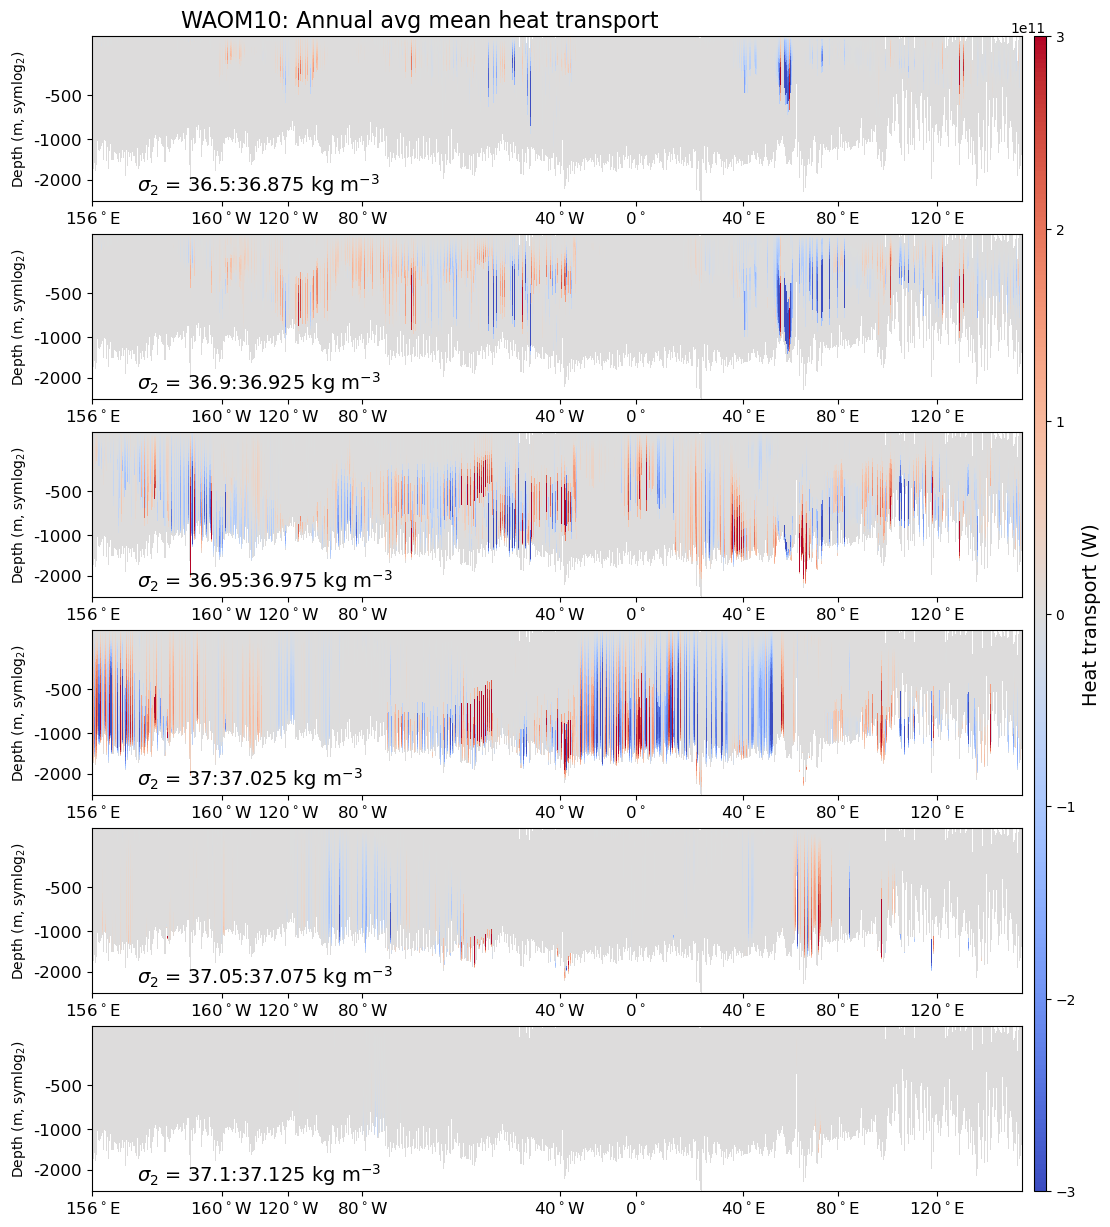

In [42]:
# Annual average for density-cross-1500m transports:
# WAOM10
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM10: Annual avg mean heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_10km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Mean_HT_cross1500m_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 10, EDDY HT

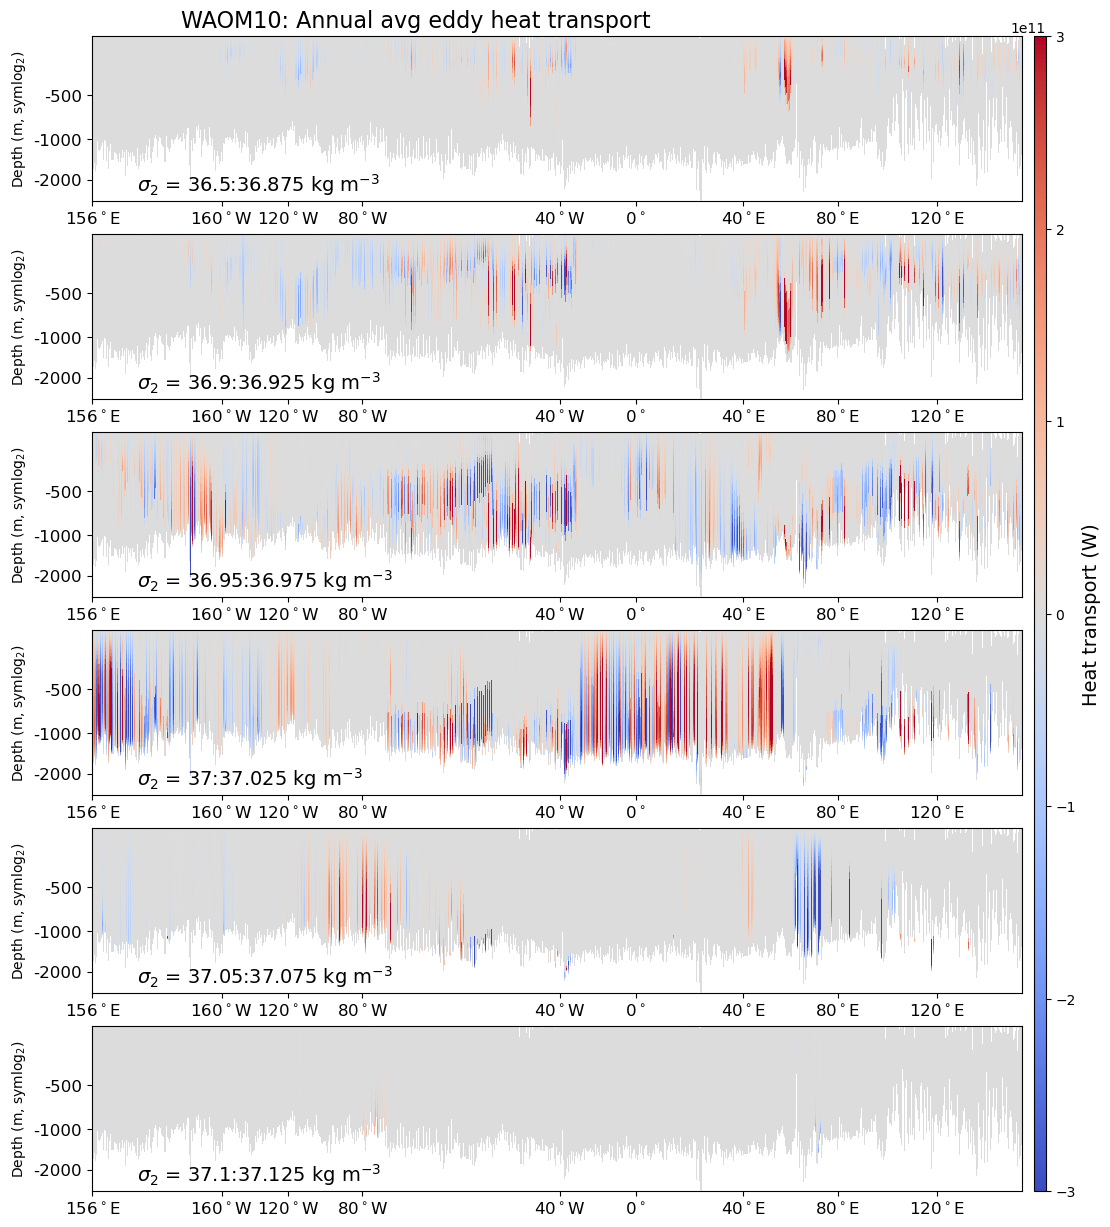

In [43]:
# Annual average for density-cross-1500m transports:
# WAOM10
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM10: Annual avg eddy heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1)* rho0*Cp*1e-12, axis=0), vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(np.nansum(Eddy_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_10km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Eddy_HT_cross1500m_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 10, MEAN+EDDY HT

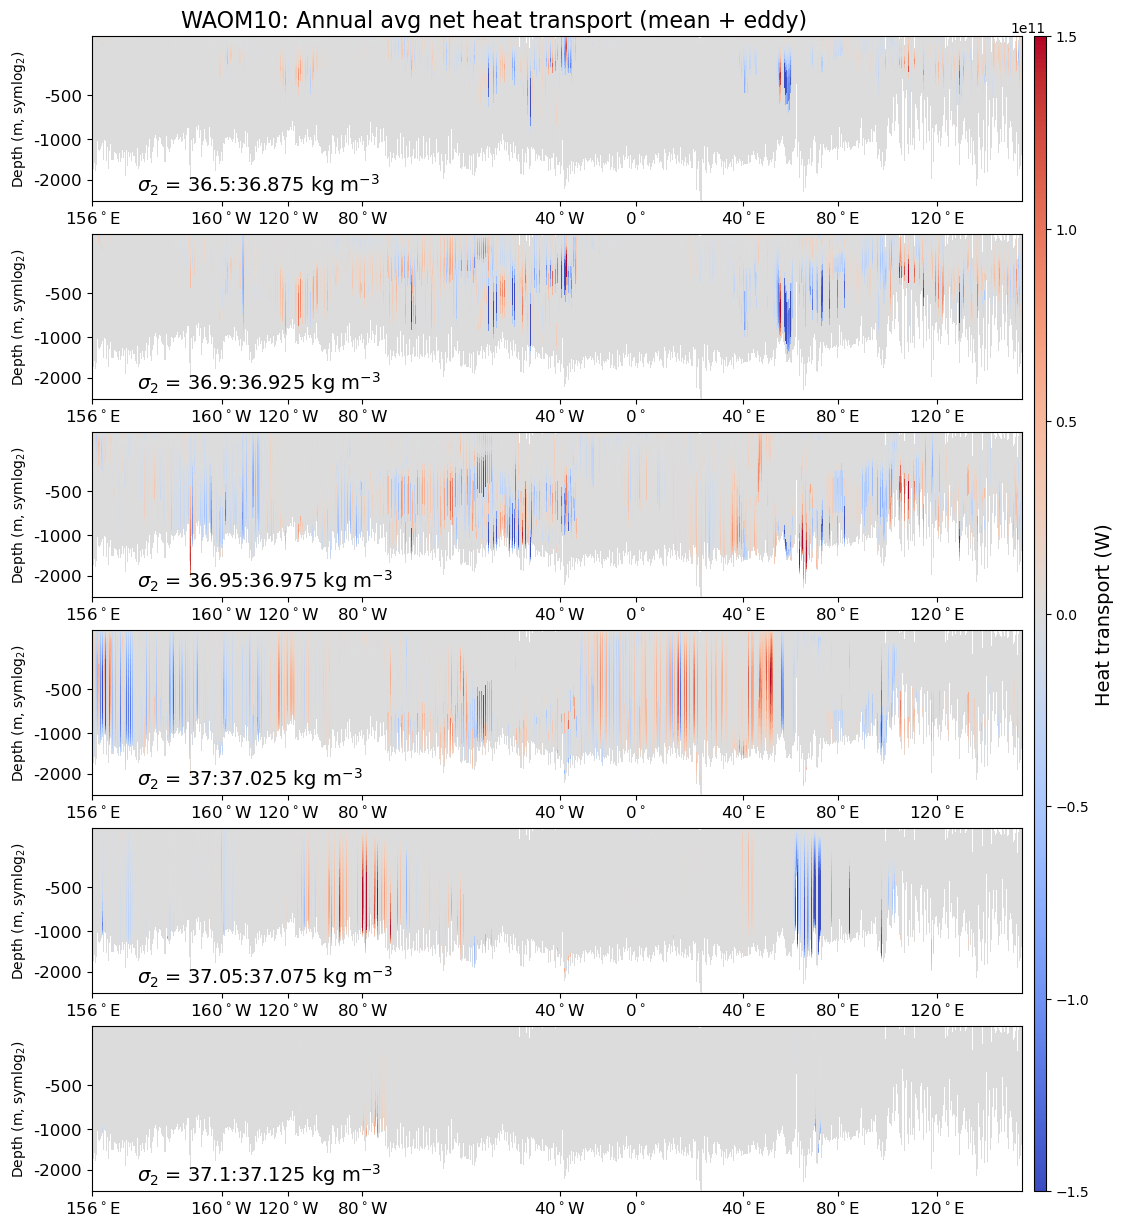

In [55]:
# Annual average for density-cross-1500m transports:
# WAOM10
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM10: Annual avg net heat transport (mean + eddy)',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),\
                        np.nanmean(np.nansum(Net_HT_10km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_10km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Net_HT_cross1500m_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


## Plot section WAOM4

#### WAOM 4, MEAN HT

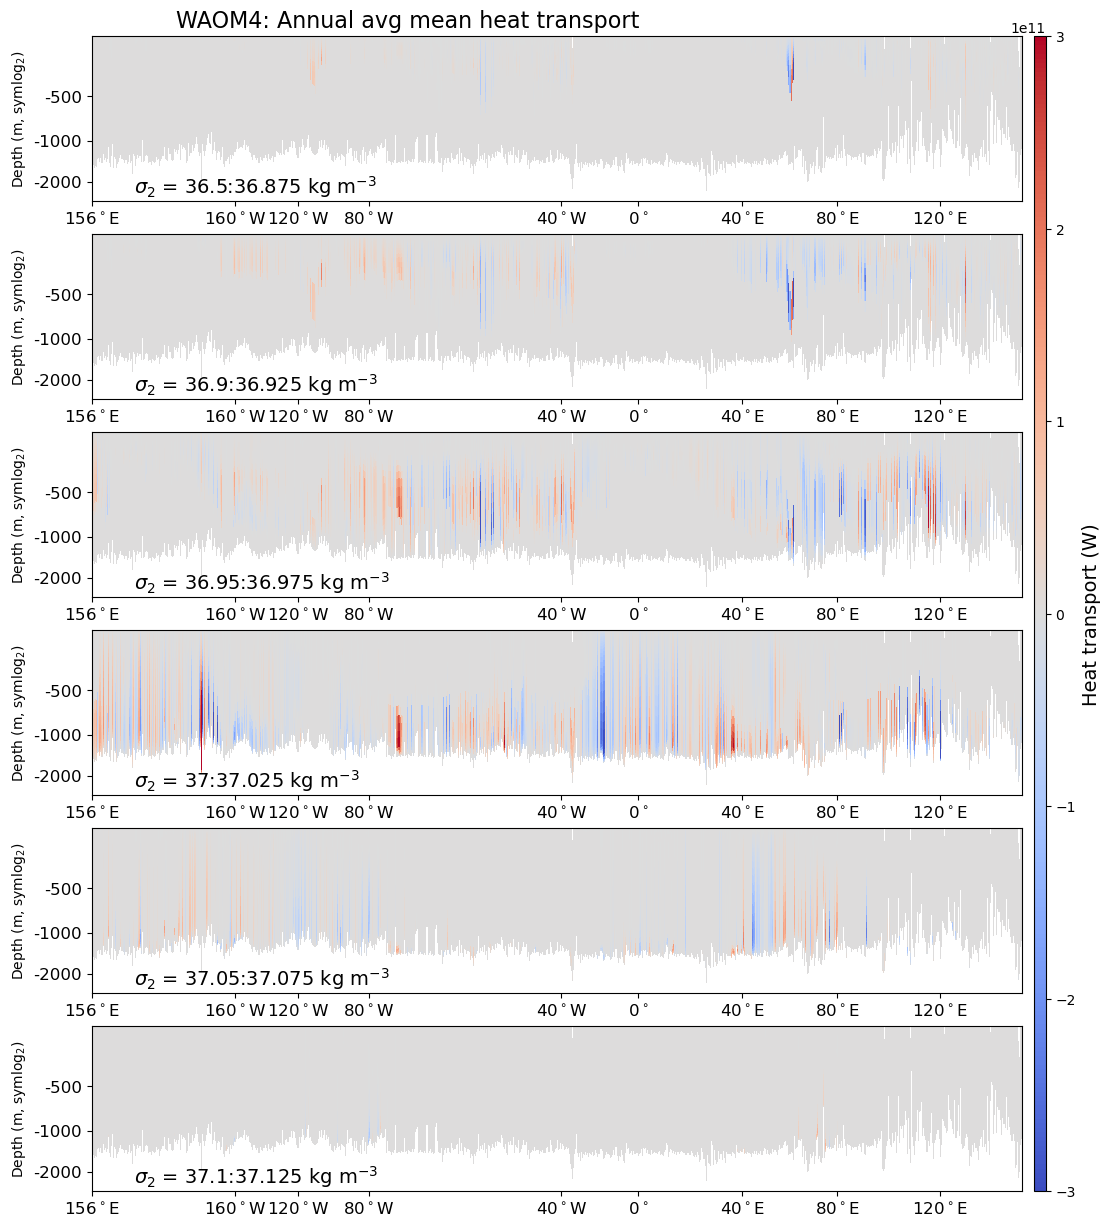

In [44]:
# Annual average for density-cross-1500m transports:
# WAOM4
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4: Annual avg mean heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Mean_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 4, EDDY HT

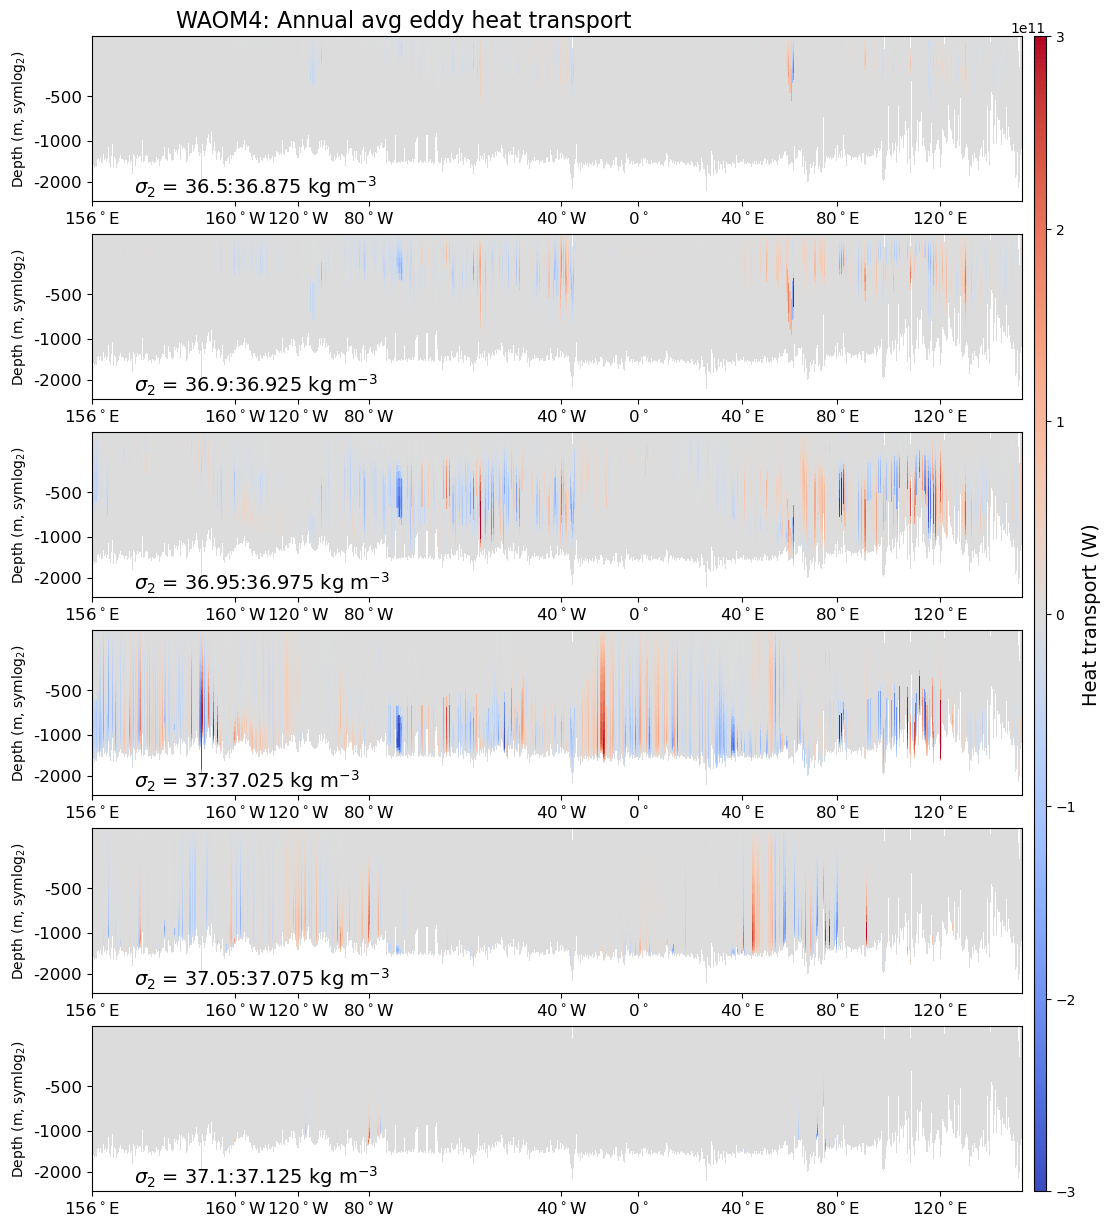

In [45]:
# Annual average for density-cross-1500m transports:
# WAOM4
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4: Annual avg eddy heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1)* rho0*Cp*1e-12, axis=0), vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Eddy_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 4, MEAN+EDDY HT

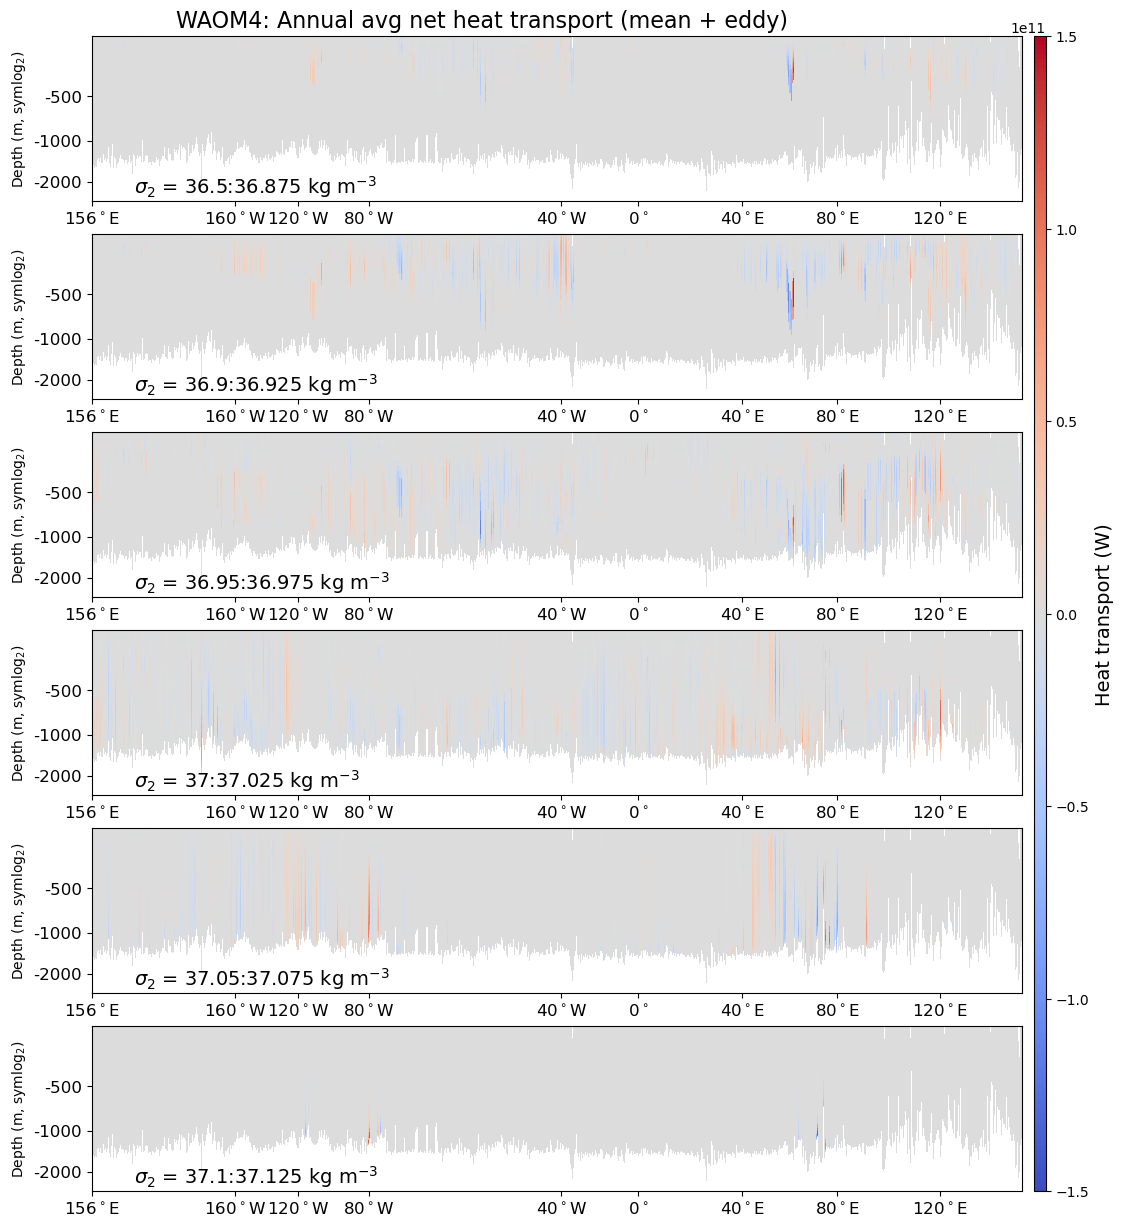

In [54]:
# Annual average for density-cross-1500m transports:
# WAOM4
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4: Annual avg net heat transport (mean + eddy)',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4km_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Net_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


## Plot section WAOM4-NOTIDE

#### WAOM 4, MEAN HT

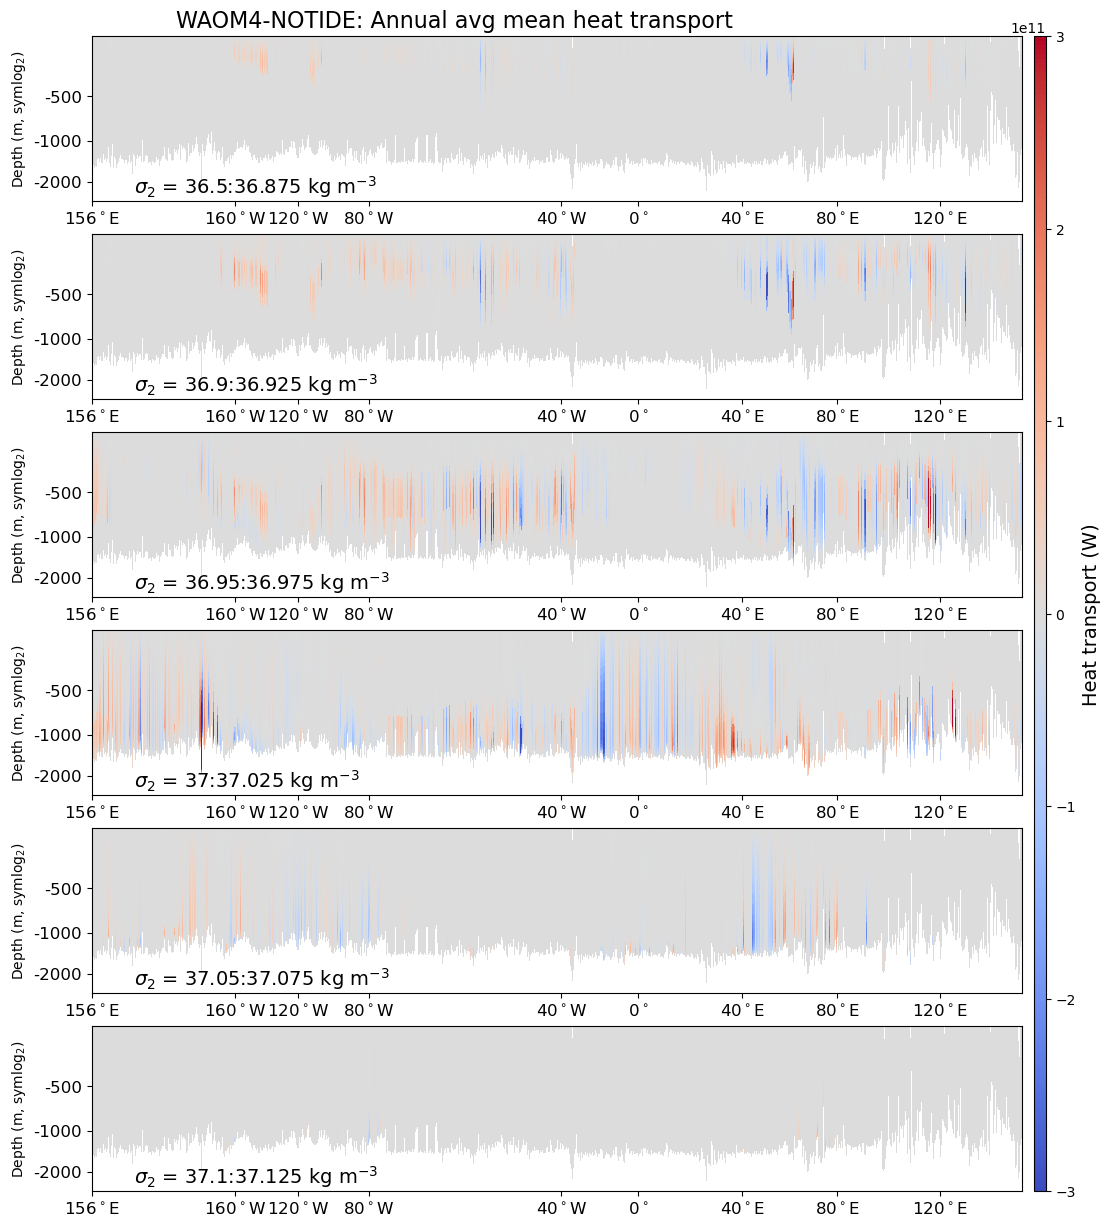

In [49]:
# Annual average for density-cross-1500m transports:
# WAOM4-NT
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4-NOTIDE: Annual avg mean heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),  axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_notides_Mean_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 4, EDDY HT

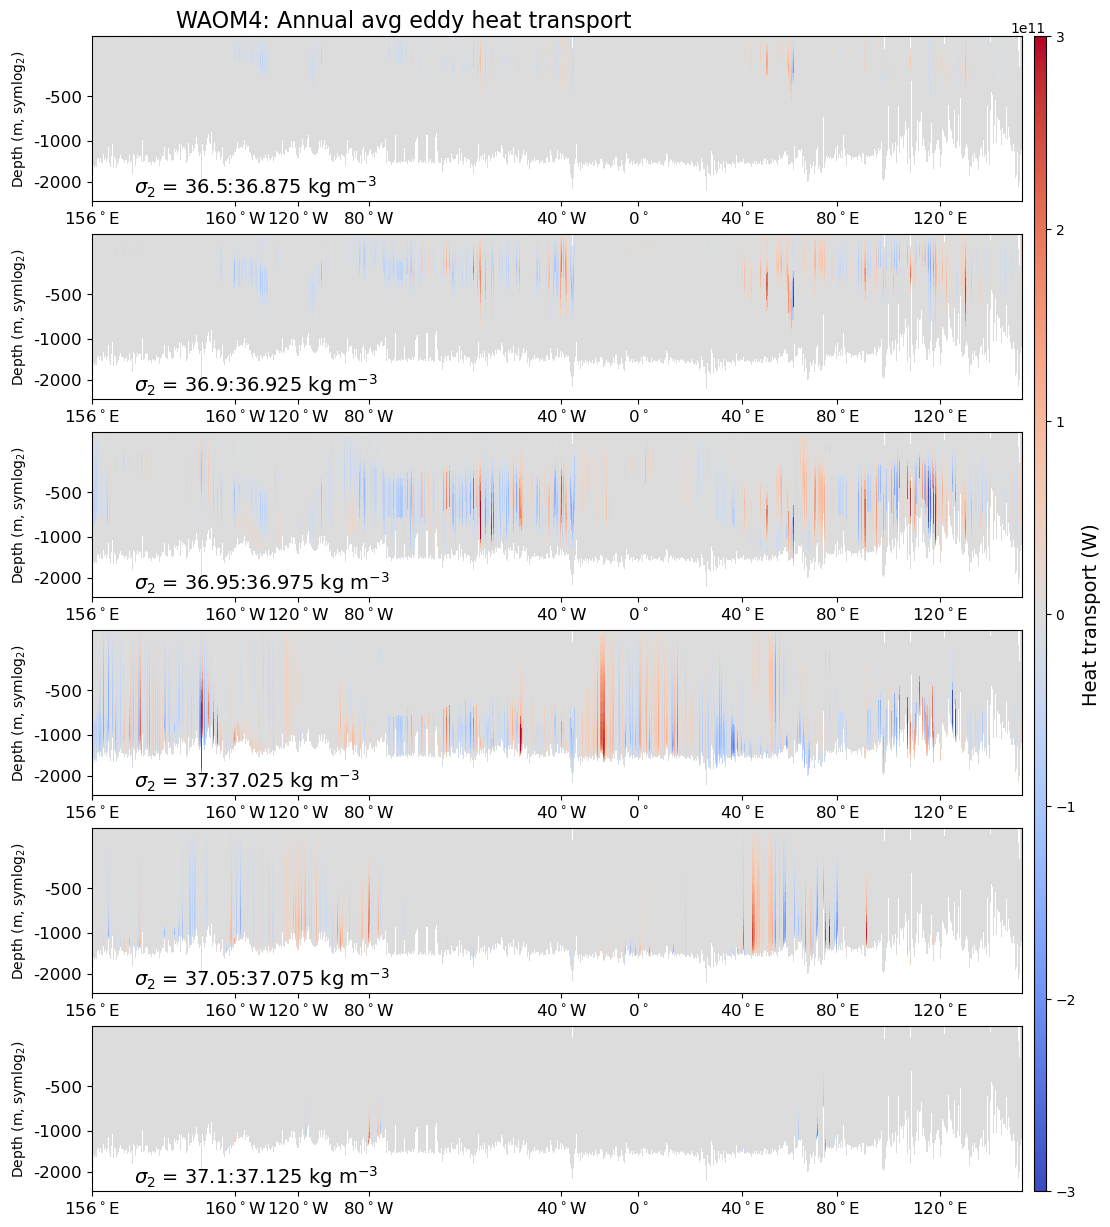

In [50]:
# Annual average for density-cross-1500m transports:
# WAOM4-NT
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4: Annual avg eddy heat transport',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1)* rho0*Cp*1e-12, axis=0), vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(np.nansum(Eddy_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, vmin=-3e11, vmax=3e11, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_notides_Eddy_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


#### WAOM 4, MEAN+EDDY HT

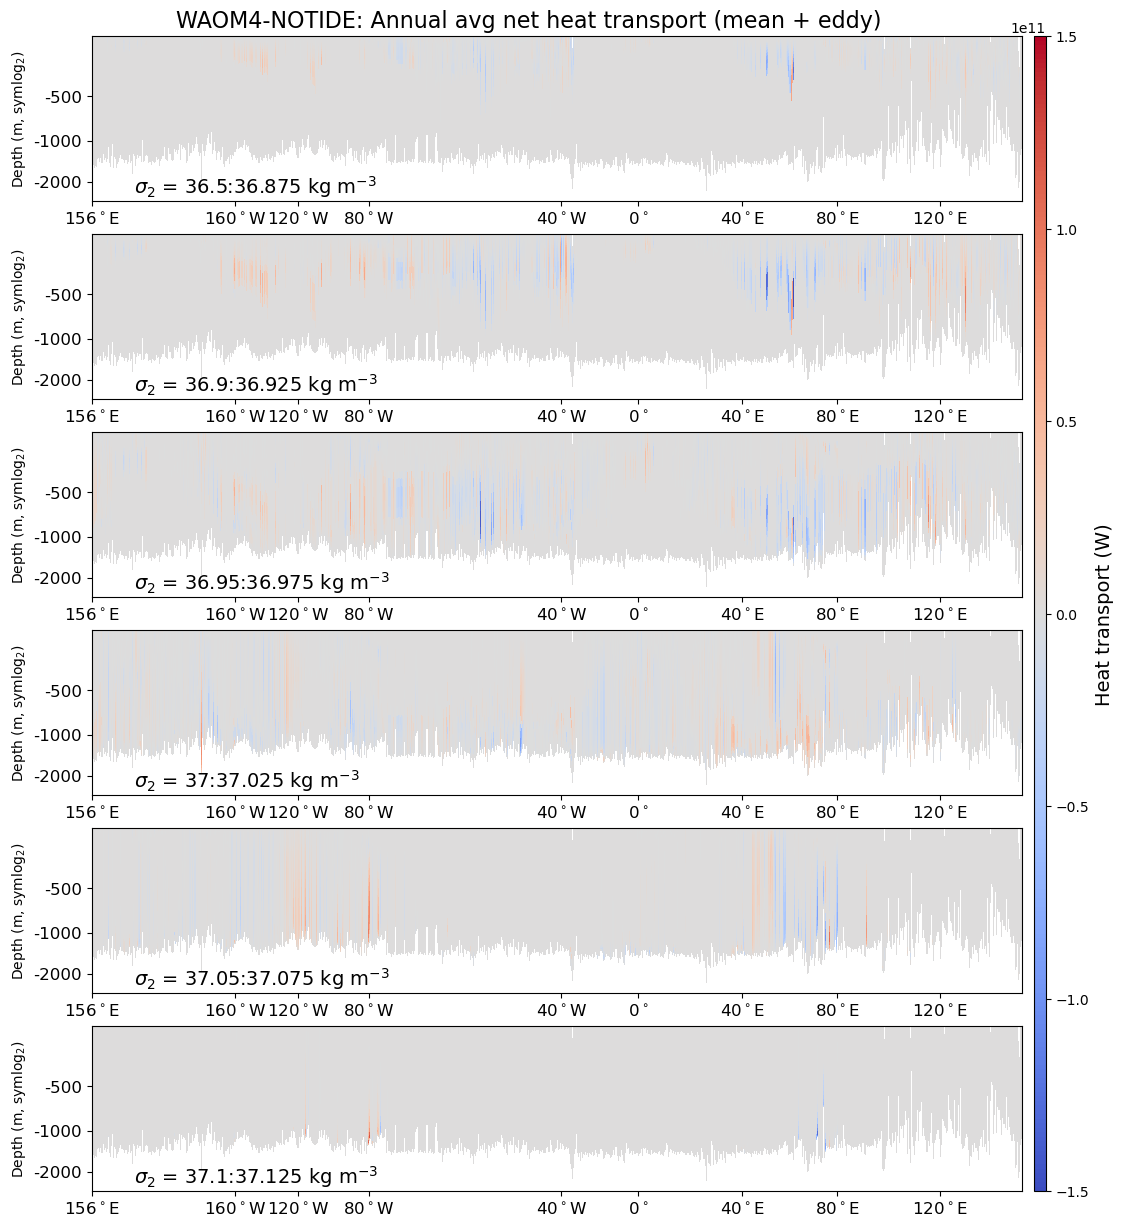

In [53]:
# Annual average for density-cross-1500m transports:
# WAOM4-NT
fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'WAOM4-NOTIDE: Annual avg net heat transport (mean + eddy)',fontsize=16)

ll=np.arange(26,28) #17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
# ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].text(1,-2500,'$\sigma_{2}$ = 36.5:36.875 kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=np.arange(28,30) #18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2}$ = 36.9:36.925 kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=np.arange(30,32) #19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2}$ = 36.95:36.975 kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=np.arange(32,34) #20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2}$ = 37:37.025 kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=np.arange(34,36) #21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2}$ = 37.05:37.075 kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=np.arange(36,38) #22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,\
                        np.nanmean(np.nansum(Net_HT_4kmNT_irho2[:,ll,:,:], axis=1), axis=0)* rho0*Cp*1e-12, cmap='coolwarm', vmin=-1.5e11, vmax=1.5e11)
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_notides_Net_HT_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


## Movies with different isopycnals:


### - WAOM10:

In [ ]:
# # Annual average for density-cross-1500m transports:
# # WAOM10

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_10km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_10km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_10km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_10km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_10km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_10km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### - WAOM4:

In [29]:
# # Annual average for density-cross-1500m transports:
# # WAOM4

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_4km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_4km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_4km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### - WAOM4-NOTIDE:

In [30]:
# # Annual average for density-cross-1500m transports:
# # WAOM4-NOTIDE

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_4km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_4km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_4km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### movies for T/S/dens sections:

In [31]:
# %%time
# # Movie for density/temperature/salinity: WAOM10

# for tt in np.arange(0,365):
#     fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
#     cst = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_2_10km[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
#     ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_10km[-1])
#     ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
#     fig.colorbar(cst, ax=ax[0])
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ct = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],temp_10km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
#     ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_10km[-1])
#     ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
#     fig.colorbar(ct, ax=ax[1])
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     cs = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],salt_10km[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
#     ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_10km[-1])
#     ax[2].text(1,-2500,'Salinity',fontsize=14)
#     fig.colorbar(cs, ax=ax[2])
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_sig2_temp_salt_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

In [32]:
# %%time
# # Movie for density/temperature/salinity: WAOM4

# for tt in np.arange(0,365):
#     fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
#     cst = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,sigma_2_4km[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
#     fig.colorbar(cst, ax=ax[0])
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ct = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,temp_4km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
#     fig.colorbar(ct, ax=ax[1])
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     cs = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,salt_4km[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'Salinity',fontsize=14)
#     fig.colorbar(cs, ax=ax[2])
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_sig2_temp_salt_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

In [33]:
# %%time
# # Movie for density/temperature/salinity: WAOM4-NOTIDE

# for tt in np.arange(0,365):
#     fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
#     cst = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,sigma_2_4kmNT[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
#     fig.colorbar(cst, ax=ax[0])
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ct = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,temp_4kmNT[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
#     fig.colorbar(ct, ax=ax[1])
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     cs = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,salt_4kmNT[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'Salinity',fontsize=14)
#     fig.colorbar(cs, ax=ax[2])
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_sig2_temp_salt_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

## Doing some TS-diagrams:

In [118]:
# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -4. + (0.1 * -4.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 5 + (0.1 * 5.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-4,5,ydim)
si = np.linspace(30,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],2000) # sigma-2000
# Substract 1000 to convert to sigma-2
dens = dens - 1000

tmin, tmax, smin, smax sizes=, -4.4 5.5 29.7 36.36


ValueError: 'c' argument has 79782065 elements, which is inconsistent with 'x' and 'y' with size 218581.

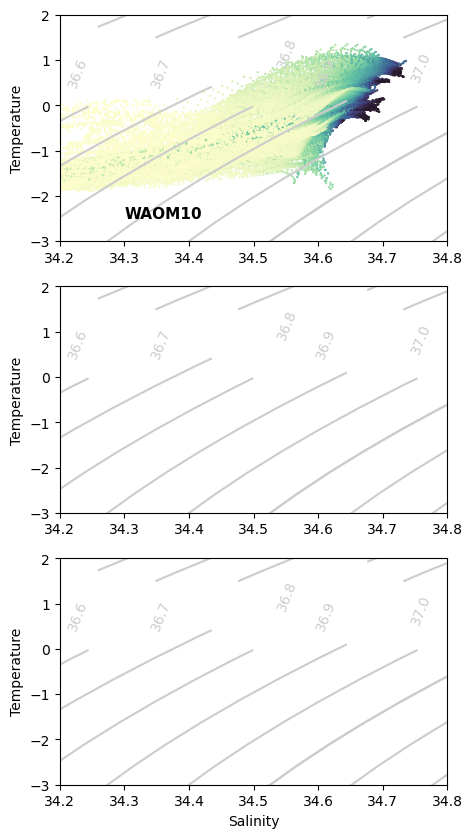

In [119]:
import cmocean

fig, ax = plt.subplots(nrows=3, figsize = (5, 10))
# normal isopycnals
for aa in range(0,3):
    CS1 = ax[aa].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,37.2,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
    ax[aa].clabel(CS1, CS1.levels, inline=True, fontsize=10)
    CS2 = ax[aa].contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
    ax[aa].clabel(CS2, CS2.levels, inline=True, fontsize=10)
    # specific isopycnals
    # cc1 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.85],linestyles='solid', colors='darkgrey', linewidth=0.1)
    # ax[aa].clabel(cc1, cc1.levels, inline=True, fontsize=10)
    # cc2 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='solid', colors='khaki', linewidth=0.1)
    # ax[aa].clabel(cc2, cc2.levels, inline=True, fontsize=10)
    # cc3 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.95],linestyles='solid', colors='aqua', linewidth=0.1)
    # ax[aa].clabel(cc3, cc3.levels, inline=True, fontsize=10)
    # cc4 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.0],linestyles='solid', colors='steelblue', linewidth=0.1)
    # ax[aa].clabel(cc4, cc4.levels, inline=True, fontsize=10)
    # cc5 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.05],linestyles='solid', colors='darkorange', linewidth=0.1)
    # ax[aa].clabel(cc5, cc5.levels, inline=True, fontsize=10)
    # cc6 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.1],linestyles='solid', colors='limegreen', linewidth=0.1)
    # ax[aa].clabel(cc6, cc6.levels, inline=True, fontsize=10)
    ax[aa].set_xlim([34.2,34.8])
    ax[aa].set_ylim([-3,2])
    ax[aa].set_ylabel('Temperature')
    if aa == 2:
        ax[aa].set_xlabel('Salinity')
        
sc = ax[0].scatter(np.nanmean(salt_10km,axis=0),np.nanmean(temp_10km,axis=0),
                 c=-np.nanmean(z_rho_10km,axis=0),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0].text(34.3,-2.5,'WAOM10', fontsize=11, fontweight='bold')

sc = ax[1].scatter(np.nanmean(salt_4km,axis=0),np.nanmean(temp_4km,axis=0),
                 c=-z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1].text(34.3,-2.5,'WAOM4', fontsize=11, fontweight='bold')

sc = ax[2].scatter(np.nanmean(salt_4kmNT,axis=0),np.nanmean(temp_4kmNT,axis=0),
                 c=-z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2].text(34.3,-2.5,'WAOM4-NOTIDE', fontsize=11, fontweight='bold')

# - cbar horiz
# cbar_ax1 = fig.add_axes([0.12, 0.005, 0.785, 0.01])
# fig.colorbar(sc, cax=cbar_ax1, orientation='horizontal')
# cbar_ax1.set_xlabel('Depth (m)')
# - cbar vert
cbar_ax1 = fig.add_axes([0.8, 0.3, 0.01, 0.6])
fig.colorbar(sc, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')

plt.subplots_adjust(left=0.25, right=0.75, bottom=0.3, top=0.9)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_TSdiag_1500m_rho2_annnual.png"
plt.savefig(name_fig, bbox_inches='tight', dpi=300)

In [120]:
Mean_HT_10km_irho2.shape

(365, 48, 31, 2688)

# integrated over circumpolar domain per density classes:

In [79]:
%%time

# - Calculate total sum per density bin:
# the order of the operations matter; averaging on time as last operat. hugely changes the directions of transport.

Sum_MeanHT_10km_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_10km_sigma2 = np.empty((len(rho_grid2),3297)) # 
Sum_MeanVT_10km_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_10km_sigma2 = np.empty((len(rho_grid2),3297)) # 

Sum_MeanHT_4km_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_4km_sigma2 = np.empty((len(rho_grid2),9014)) # 
Sum_MeanVT_4km_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_4km_sigma2 = np.empty((len(rho_grid2),9014)) # 

Sum_MeanHT_4kmNT_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_4kmNT_sigma2 = np.empty((len(rho_grid2),9014)) # 
Sum_MeanVT_4kmNT_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_4kmNT_sigma2 = np.empty((len(rho_grid2),9014)) # 

for ll in np.arange(0,len(rho_grid2),1):
    Sum_MeanHT_10km_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM VERT LEV, SUM ALONG CONTOUR, MEAN TIME
    # Cumsum_MeanHT_10km_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_10km_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM RHO_GRID, CUMSUM ALONG CONTOUR, MEAN TIME
    Sum_MeanVT_10km_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_10km_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM VERT LEV, SUM ALONG CONTOUR, MEAN TIME
    # Cumsum_MeanVT_10km_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_10km_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM RHO_GRID, CUMSUM ALONG CONTOUR, MEAN TIME
   
    Sum_MeanHT_4km_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanHT_4km_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    Sum_MeanVT_4km_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_4km_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanVT_4km_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_4km_irho2[:,ll,:,:], axis=1),axis=1), axis=0)

    Sum_MeanHT_4kmNT_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanHT_4kmNT_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_4kmNT_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    Sum_MeanVT_4kmNT_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_4kmNT_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanVT_4kmNT_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_4kmNT_irho2[:,ll,:,:], axis=1),axis=1), axis=0)



CPU times: user 7min 54s, sys: 7min 29s, total: 15min 24s
Wall time: 40min 7s


In [80]:
%%time

# - Calculate total sum per density bin:
# the order of the operations matter; averaging on time as last operat. hugely changes the directions of transport.

Sum_MeanHT_10km_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_10km_CF_sigma2 = np.empty((len(rho_grid2),3297)) # 
Sum_MeanVT_10km_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_10km_CF_sigma2 = np.empty((len(rho_grid2),3297)) # 

Sum_MeanHT_4km_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_4km_CF_sigma2 = np.empty((len(rho_grid2),9014)) # 
Sum_MeanVT_4km_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_4km_CF_sigma2 = np.empty((len(rho_grid2),9014)) # 

Sum_MeanHT_4kmNT_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanHT_4kmNT_CF_sigma2 = np.empty((len(rho_grid2),9014)) # 
Sum_MeanVT_4kmNT_CF_sigma2 = np.empty(len(rho_grid2)) # 
# Cumsum_MeanVT_4kmNT_CF_sigma2 = np.empty((len(rho_grid2),9014)) # 

for ll in np.arange(0,len(rho_grid2),1):
    Sum_MeanHT_10km_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_10km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM VERT LEV, SUM ALONG CONTOUR, MEAN TIME
    # Cumsum_MeanHT_10km_CF_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_10km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM RHO_GRID, CUMSUM ALONG CONTOUR, MEAN TIME
    Sum_MeanVT_10km_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_10km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM VERT LEV, SUM ALONG CONTOUR, MEAN TIME
    # Cumsum_MeanVT_10km_CF_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_10km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0) #SUM RHO_GRID, CUMSUM ALONG CONTOUR, MEAN TIME
   
    Sum_MeanHT_4km_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_4km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanHT_4km_CF_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_4km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    Sum_MeanVT_4km_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_4km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanVT_4km_CF_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_4km_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)

    Sum_MeanHT_4kmNT_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_HT_4kmNT_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanHT_4kmNT_CF_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_HT_4kmNT_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    Sum_MeanVT_4kmNT_CF_sigma2[ll] = np.nanmean(np.nansum(np.nansum(Mean_VT_4kmNT_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)
    # Cumsum_MeanVT_CF_4kmNT_sigma2[ll,:] = np.nanmean(np.cumsum(np.nansum(Mean_VT_4kmNT_CF_irho2[:,ll,:,:], axis=1),axis=1), axis=0)




CPU times: user 8min 57s, sys: 8min 59s, total: 17min 56s
Wall time: 44min 37s


In [81]:
print(fig_path)

/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/


In [ ]:
fig, ax = plt.subplots(ncols=1, figsize = (8, 4))

# multiplying by -1 to match vol transp
ax.plot(rho_grid2,-Sum_MeanHT_10km_sigma2*rho0*Cp*1e-12,'--r', label='WAOM10')
ax.plot(rho_grid2,-Sum_MeanHT_4km_sigma2*rho0*Cp*1e-12,'--b', label='WAOM4')
ax.plot(rho_grid2,-Sum_MeanHT_4kmNT_sigma2*rho0*Cp*1e-12,'--c', label='WAOM4-NOTIDE')
ax.legend()
ax.plot(rho_grid2,-Sum_EddyHT_10km_sigma2*rho0*Cp*1e-12,':r', label='WAOM10')
ax.plot(rho_grid2,-Sum_EddyHT_4km_sigma2*rho0*Cp*1e-12,':b', label='WAOM4')
ax.plot(rho_grid2,-Sum_EddyHT_4kmNT_sigma2*rho0*Cp*1e-12,':c', label='WAOM4-NOTIDE')
ax.plot(rho_grid2,-(Sum_MeanHT_10km_sigma2+Sum_EddyHT_10km_sigma2)*rho0*Cp*1e-12,'-r', label='WAOM10')
ax.plot(rho_grid2,-(Sum_MeanHT_4km_sigma2+Sum_EddyHT_4km_sigma2)*rho0*Cp*1e-12,'-b', label='WAOM4')
ax.plot(rho_grid2,-(Sum_MeanHT_4kmNT_sigma2+Sum_EddyHT_4kmNT_sigma2)*rho0*Cp*1e-12,'-c', label='WAOM4-NOTIDE')
ax.grid()
ax.set_xlim(36.6,37.35)
ax.set_ylim(-50,50)

ax.set_ylabel('Net heat transport (TW)')# (Abs-T$_{f}$, 10$^{15}$W'])
ax.set_xlabel('Pot. density ($\sigma_2$)')

name_fig='WAOM10x4x4NT_Cross-1500m_sumtransport_Sigma2bin_MeanEddyHT_vint_annual_v2.png'
plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)
plt.show()


NameError: name 'Sum_EddyHT_10km_sigma2' is not defined

NameError: name 'Sum_MeanHT_10km_CF_sigma2' is not defined

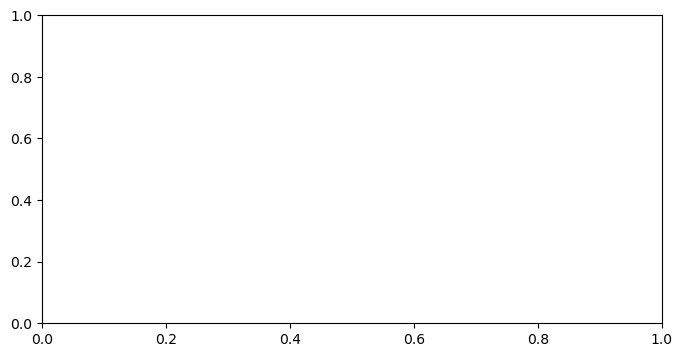

In [121]:
fig, ax = plt.subplots(ncols=1, figsize = (8, 4))

# multiplying by -1 to match vol transp
ax.plot(rho_grid2,-Sum_MeanHT_10km_CF_sigma2*rho0*Cp*1e-12,'--r', label='WAOM10')
ax.plot(rho_grid2,-Sum_MeanHT_4km_CF_sigma2*rho0*Cp*1e-12,'--b', label='WAOM4')
ax.plot(rho_grid2,-Sum_MeanHT_4kmNT_CF_sigma2*rho0*Cp*1e-12,'--c', label='WAOM4-NOTIDE')
ax.legend()
ax.plot(rho_grid2,-Sum_EddyHT_10km_CF_sigma2*rho0*Cp*1e-12,':r', label='WAOM10')
ax.plot(rho_grid2,-Sum_EddyHT_4km_CF_sigma2*rho0*Cp*1e-12,':b', label='WAOM4')
ax.plot(rho_grid2,-Sum_EddyHT_4kmNT_CF_sigma2*rho0*Cp*1e-12,':c', label='WAOM4-NOTIDE')
ax.plot(rho_grid2,-(Sum_MeanHT_10km_CF_sigma2+Sum_EddyHT_10km_sigma2)*rho0*Cp*1e-12,'-r', label='WAOM10')
ax.plot(rho_grid2,-(Sum_MeanHT_4km_CF_sigma2+Sum_EddyHT_4km_sigma2)*rho0*Cp*1e-12,'-b', label='WAOM4')
ax.plot(rho_grid2,-(Sum_MeanHT_4kmNT_CF_sigma2+Sum_EddyHT_4kmNT_sigma2)*rho0*Cp*1e-12,'-c', label='WAOM4-NOTIDE')
ax.grid()
ax.set_xlim(36.6,37.35)
ax.set_ylim(-25,25)

ax.set_ylabel('Net heat transport (TW)')# (Abs-T$_{f}$, 10$^{15}$W'])
ax.set_xlabel('Pot. density ($\sigma_2$)')

name_fig='WAOM10x4x4NT_Cross-CF_sumtransport_Sigma2bin_MeanEddyHT_vint_annual_v2.png'
plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
np.around(rho_grid2[33],2)


In [ ]:
rho_grid2

In [ ]:
# FIGURE 2: CROSS-1500M HEAT TRANSPORT PER DENSITY! 2 rows, 3 columns
# 1) Circum-Ant. Cross-1500m heat transport per density classes (row 1, col 1)
# 2) TS-diagram WAOM4 (row 1, col 2)
# 3) net cross-1500 HT integrated for densities >= 37 sig2 (row 2, col 1:2)
# 4) mean/eddy decom. cross-1500 HT depth-int. for densities >= 37 sig2 (row 3, col 1:2)

fig = plt.figure(figsize=(15,14))

# 
# 1)
# NET
ax1 = fig.add_subplot(3,2,1)
ax1.plot(rho_grid2,(Sum_MeanHT_10km_sigma2+Sum_EddyHT_10km_sigma2)* rho0*Cp*1e-12,'--k', label='WAOM10',linewidth=1,alpha=.7)
ax1.plot(rho_grid2,(Sum_MeanHT_4km_sigma2+Sum_EddyHT_4km_sigma2)* rho0*Cp*1e-12,'-k', label='WAOM4',linewidth=1.6)
ax1.plot(rho_grid2,(Sum_MeanHT_4kmNT_sigma2+Sum_EddyHT_4kmNT_sigma2)* rho0*Cp*1e-12,':k', label='WAOM4-NOTIDE',linewidth=1,alpha=.7)
ax1.legend(loc='upper left')
ax1b = ax1.twiny()
ax1b.plot(rho_grid2[0],(Sum_MeanHT_4km_sigma2[0]+Sum_EddyHT_4km_sigma2[0])* rho0*Cp*1e-12,'-k', label='NET',linewidth=1.6)
ax1b.plot(rho_grid2,Sum_MeanHT_4km_sigma2* rho0*Cp*1e-12,'-',color='dodgerblue', label='ADV',linewidth=1.6)
ax1b.plot(rho_grid2,Sum_EddyHT_4km_sigma2* rho0*Cp*1e-12,'-', color='orangered', label='EIT',linewidth=1.6)

ax1b.plot(rho_grid2,Sum_MeanHT_10km_sigma2* rho0*Cp*1e-12,'--',color='dodgerblue',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_EddyHT_10km_sigma2* rho0*Cp*1e-12,'--',color='orangered',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_MeanHT_4kmNT_sigma2* rho0*Cp*1e-12,':',color='dodgerblue',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_EddyHT_4kmNT_sigma2* rho0*Cp*1e-12,':', color='orangered',linewidth=1,alpha=.6)
# line at 37.02 sig2
ax1.plot(np.around(rho_grid2[33],2)*np.ones(np.arange(-100,100).shape)\
          ,np.arange(-100,100),'-', color='gold',linewidth=2,alpha=0.75)

ax1b.legend(loc='lower left')
ax1.grid()
ax1b.set_xlim(36.7,37.2)
ax1b.set_ylim(-100,100)
ax1b.set_xticklabels((''))
ax1.set_ylabel('Heat transport (TW)')
ax1.set_xlabel('Potential density ($\sigma_2$)')

# 2) TS-diagram
ax2 = fig.add_subplot(3,2,2)
CS1 = ax2.contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,37.2,.1),linestyles='solid', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax2.clabel(CS1, CS1.levels, inline=True, fontsize=10)
CS2 = ax2.contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax2.clabel(CS2, CS2.levels, inline=True, fontsize=10)
# specific isopycnals
cc1 = ax2.contour(Si,Ti,dens.transpose(), levels=[37.02],linestyles='solid', colors='gold',linewidth=0.2)
ax2.clabel(cc1, cc1.levels, inline=True, fontsize=10)
ax2.set_xlim([34.2,34.8])
ax2.set_ylim([-2.5,1.5])
ax2.set_ylabel('Potential temperature (degC)')
ax2.set_xlabel('Salinity')
sc = ax2.scatter(np.nanmean(salt_4km,axis=0),np.nanmean(temp_4km,axis=0),
                 c=-z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax2.text(34.21,-2.3,'WAOM4', fontsize=12)#, fontweight='bold')
cbar_ax1 = fig.add_axes([0.76, 0.73, 0.01, 0.16])
fig.colorbar(sc, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')

# 3)
ax3 = fig.add_subplot(3,1,2)
ll=np.arange(33,38) #20
cht = ax3.pcolormesh(dist_along_axis_4km,z_rho_4km,(\
                     np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1), axis=0) +
                     np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0))*rho0*Cp*1e-12, cmap='coolwarm', vmin=-.1, vmax=.1)
ax3.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax3.set_xticklabels((''))#156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            # '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax3.set_xlim(0, dist_along_4km[-1])
ax3.text(1,-2500,'Cross-1500m heat transport due to NET, $\sigma_{2}$ $\geq$ ' + str(np.around(rho_grid2[ll[0]],2)) + ' kg m$^{-3}$',fontsize=12)
ax3.plot([3.634185,3.634185],[-2000,0],'-', color=[.6,.6,.6])                 
ax3.plot([8,8],[-2000,0],'-', color=[.6,.6,.6])                                # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax3.plot([11.5,11.5],[-2000,0],'-', color=[.6,.6,.6])     
ax3.plot([15,15],[-2000,0],'-', color=[.6,.6,.6])      
ax3.set_yscale('symlog',base = 2, linthresh=700)
ax3.set_ylabel('Depth (m, log$_2$)')
ax3.set_yticklabels(['-2000','-1000','-500'])
# ax3.set_ylim(-2000,0)
ax3.set_aspect('auto')

# ax3.tick_params(labelsize=12)
cbar_ax2 = fig.add_axes([0.76, 0.52, 0.01, 0.16])
fig.colorbar(cht, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Heat transport (TW)')

# 4)
ax4 = fig.add_subplot(3,1,3)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-k', label='NET',linewidth=1.6)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-',color='dodgerblue', label='ADV',linewidth=1.6)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_EddyHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-',color='orangered', label='EIT',linewidth=1.6)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':k',linewidth=1.,alpha=0.7)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':',color='dodgerblue',linewidth=1.,alpha=0.6)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':',color='orangered',linewidth=1.,alpha=0.6)
ax4.legend(loc='lower left')
ax4.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax4.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax4.set_xlim(0, dist_along_4km[-1])
ax4.legend(loc='upper left')

ax4.set_ylim(-300,300)
ax4.text(2.895576e+00-1.5,-290,'Ross',fontsize=13, color='k')         # 4) Mask Ross (140W : 160E, lat < -60)
ax4.plot([3.634185,3.634185],[-600,600],'-', color=[.6,.6,.6])                 
ax4.text(4.1,-290,'West Ant.',fontsize=13, color='k')           # 5) Mask West Antarctica (150W : 90W, lat < -65)
ax4.plot([8,8],[-600,600],'-', color=[.6,.6,.6])                                # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax4.text(9,-290,'Weddell',fontsize=13, color='k')
ax4.plot([11.5,11.5],[-600,600],'-', color=[.6,.6,.6])     
ax4.text(12,-290,'Maud Land',fontsize=13, color='k')                  # 2) Mask Maud Land (25W : 60E, lat < -60)
ax4.plot([15,15],[-600,600],'-', color=[.6,.6,.6])      
ax4.text(17,-290,'East Ant.',fontsize=13, color='k')            # 3) Mask East Antarctica (60E : 160E, lat < -60)
ax4.set_title('Cross-1500m heat transport due to NET vertically-integrated, $\sigma_{2}$ $\geq$ ' + str(np.around(rho_grid2[ll[0]],2)) + 'kg m$^{-3}$')
ax4.set_ylabel('Heat transport (TW)')

ax4b = ax4.twiny() # to plot 10km together
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_MeanHT_10km_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--k', label='WAOM10',linewidth=1.,alpha=0.6)
cht1b = ax4b.plot(dist_along_4km[0],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,0],axis=0) + np.nansum(Cumsum_EddyHT_4km_sigma2[ll,0],axis=0))*rho0*Cp*1e-12,'-k', label='WAOM4',linewidth=1.6)
cht1b = ax4b.plot(dist_along_4km[0],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,0],axis=0) + np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,0],axis=0))*rho0*Cp*1e-12,':k', label='WAOM4-NOTIDE',linewidth=1.6)
ax4b.legend(loc='upper right')
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_MeanHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--',color='dodgerblue',linewidth=1.,alpha=0.6)
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_EddyHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--',color='orangered',linewidth=1.,alpha=0.6)
ax4b.set_xticklabels((''))
ax4b.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax4b.set_xlim(0, dist_along_10km[-1])

plt.subplots_adjust(left=0.25, right=0.75, bottom=0.3, top=0.9)

name_fig='Figure2_Cross-1500m_sumtransport_Sig2_gt37.02_MeanEddyHT_v2.png'
plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)
plt.show()



In [ ]:
# FIGURE 2: CROSS-1500M HEAT TRANSPORT PER DENSITY! 2 rows, 3 columns
# 1) Circum-Ant. Cross-1500m heat transport per density classes (row 1, col 1)
# 2) TS-diagram WAOM4 (row 1, col 2)
# 3) net cross-1500 HT integrated for densities >= 37 sig2 (row 2, col 1:2)
# 4) mean/eddy decom. cross-1500 HT depth-int. for densities >= 37 sig2 (row 3, col 1:2)

fig = plt.figure(figsize=(15,14))

# 
# 1)
# NET
ax1 = fig.add_subplot(3,2,1)
ax1.plot(rho_grid2,(Sum_MeanHT_10km_sigma2+Sum_EddyHT_10km_sigma2)* rho0*Cp*1e-12,'--k', label='WAOM10',linewidth=1,alpha=.7)
ax1.plot(rho_grid2,(Sum_MeanHT_4km_sigma2+Sum_EddyHT_4km_sigma2)* rho0*Cp*1e-12,'-k', label='WAOM4',linewidth=1.6)
ax1.plot(rho_grid2,(Sum_MeanHT_4kmNT_sigma2+Sum_EddyHT_4kmNT_sigma2)* rho0*Cp*1e-12,':k', label='WAOM4-NOTIDE',linewidth=1,alpha=.7)
ax1.legend(loc='upper left')
ax1b = ax1.twiny()
ax1b.plot(rho_grid2[0],(Sum_MeanHT_4km_sigma2[0]+Sum_EddyHT_4km_sigma2[0])* rho0*Cp*1e-12,'-k', label='NET',linewidth=1.6)
ax1b.plot(rho_grid2,Sum_MeanHT_4km_sigma2* rho0*Cp*1e-12,'-',color='dodgerblue', label='ADV',linewidth=1.6)
ax1b.plot(rho_grid2,Sum_EddyHT_4km_sigma2* rho0*Cp*1e-12,'-', color='orangered', label='EIT',linewidth=1.6)

ax1b.plot(rho_grid2,Sum_MeanHT_10km_sigma2* rho0*Cp*1e-12,'--',color='dodgerblue',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_EddyHT_10km_sigma2* rho0*Cp*1e-12,'--',color='orangered',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_MeanHT_4kmNT_sigma2* rho0*Cp*1e-12,':',color='dodgerblue',linewidth=1,alpha=.6)
ax1b.plot(rho_grid2,Sum_EddyHT_4kmNT_sigma2* rho0*Cp*1e-12,':', color='orangered',linewidth=1,alpha=.6)
ax1.plot(np.around(rho_grid2[27],2)*np.ones(np.arange(-100,100).shape)\
          ,np.arange(-100,100),'-', color='gold',linewidth=2,alpha=0.75)
ax1.plot(np.around(rho_grid2[32],2)*np.ones(np.arange(-100,100).shape)\
          ,np.arange(-100,100),'-', color='gold',linewidth=2,alpha=0.75)
ax1b.legend(loc='lower left')
ax1.grid()
ax1b.set_xlim(36.7,37.2)
ax1b.set_ylim(-100,100)
ax1b.set_xticklabels((''))
ax1.set_ylabel('Heat transport (TW)')
ax1.set_xlabel('Potential density ($\sigma_2$)')


# 2) TS-diagram
ax2 = fig.add_subplot(3,2,2)
CS1 = ax2.contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,37.2,.1),linestyles='solid', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax2.clabel(CS1, CS1.levels, inline=True, fontsize=10)
CS2 = ax2.contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.5,0.5,0.5)], linewidth=0.1)
ax2.clabel(CS2, CS2.levels, inline=True, fontsize=10)
# specific isopycnals
cc1 = ax2.contour(Si,Ti,dens.transpose(), levels=[36.87],linestyles='solid', colors='gold', linewidth=0.2)
ax2.clabel(cc1, cc1.levels, inline=True, fontsize=10)
cc1 = ax2.contour(Si,Ti,dens.transpose(), levels=[37],linestyles='solid', colors='gold', linewidth=0.2)
ax2.clabel(cc1, cc1.levels, inline=True, fontsize=10)
ax2.set_xlim([34.2,34.8])
ax2.set_ylim([-2.5,1.5])
ax2.set_ylabel('Potential temperature (degC)')
ax2.set_xlabel('Salinity')
sc = ax2.scatter(np.nanmean(salt_4km,axis=0),np.nanmean(temp_4km,axis=0),
                 c=-z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax2.text(34.21,-2.3,'WAOM4', fontsize=12)#, fontweight='bold')
cbar_ax1 = fig.add_axes([0.76, 0.73, 0.01, 0.16])
fig.colorbar(sc, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')

# 3)
ax3 = fig.add_subplot(3,1,2)
ll=np.arange(27,33) #20
cht = ax3.pcolormesh(dist_along_axis_4km,z_rho_4km,(\
                     np.nanmean(np.nansum(Mean_HT_4km_irho2[:,ll,:,:], axis=1), axis=0) +
                     np.nanmean(np.nansum(Eddy_HT_4km_irho2[:,ll,:,:], axis=1), axis=0))*rho0*Cp*1e-12, cmap='coolwarm', vmin=-.1, vmax=.1)
ax3.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax3.set_xticklabels((''))#156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            # '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax3.set_xlim(0, dist_along_4km[-1])
ax3.text(1,-2500,'Cross-1500m heat transport due to NET, ' + str(np.around(rho_grid2[ll[0]],2)) + ' $\leq$ $\sigma_{2}$ $\geq$ ' + str(np.around(rho_grid2[ll[-1]],2)) + ' kg m$^{-3}$',fontsize=12)

ax3.plot([3.634185,3.634185],[-2000,0],'-', color=[.6,.6,.6])                 
ax3.plot([8,8],[-2000,0],'-', color=[.6,.6,.6])                                # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax3.plot([11.5,11.5],[-2000,0],'-', color=[.6,.6,.6])     
ax3.plot([15,15],[-2000,0],'-', color=[.6,.6,.6])      

ax3.set_yscale('symlog',base = 2, linthresh=700)
ax3.set_ylabel('Depth (m, symlog$_2$)')
ax3.set_yticklabels(['-2000','-1000','-500'])
ax3.set_aspect('auto')

cbar_ax2 = fig.add_axes([0.76, 0.52, 0.01, 0.16])
fig.colorbar(cht, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Heat transport (TW)')

# 4)
ax4 = fig.add_subplot(3,1,3)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-k', label='NET',linewidth=1.6)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-',color='dodgerblue', label='ADV',linewidth=1.6)
cht1 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_EddyHT_4km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'-',color='orangered', label='EIT',linewidth=1.6)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':k',linewidth=1.,alpha=0.7)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':',color='dodgerblue',linewidth=1.,alpha=0.6)
cht2 = ax4.plot(dist_along_4km[:],(np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,':',color='orangered',linewidth=1.,alpha=0.6)
ax4.legend(loc='lower left')
ax4.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax4.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax4.set_xlim(0, dist_along_4km[-1])
ax4.legend(loc='upper left')

ax4.set_ylim(-300,300)
ax4.text(2.895576e+00-1.5,-290,'Ross',fontsize=13, color='k')         # 4) Mask Ross (140W : 160E, lat < -60)
ax4.plot([3.634185,3.634185],[-600,600],'-', color=[.6,.6,.6])                 
ax4.text(4.1,-290,'West Ant.',fontsize=13, color='k')           # 5) Mask West Antarctica (150W : 90W, lat < -65)
ax4.plot([8,8],[-600,600],'-', color=[.6,.6,.6])                                # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax4.text(9,-290,'Weddell',fontsize=13, color='k')
ax4.plot([11.5,11.5],[-600,600],'-', color=[.6,.6,.6])     
ax4.text(12,-290,'Maud Land',fontsize=13, color='k')                  # 2) Mask Maud Land (25W : 60E, lat < -60)
ax4.plot([15,15],[-600,600],'-', color=[.6,.6,.6])      
ax4.text(17,-290,'East Ant.',fontsize=13, color='k')            # 3) Mask East Antarctica (60E : 160E, lat < -60)
ax4.set_title('Cross-1500m heat transport due to NET vertically-integrated, ' + str(np.around(rho_grid2[ll[0]],2)) + ' $\leq$ $\sigma_{2}$ $\geq$ ' + str(np.around(rho_grid2[ll[-1]],2)) + ' kg m$^{-3}$')
ax4.set_ylabel('Heat transport (TW)')

ax4b = ax4.twiny() # to plot 10km together
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_MeanHT_10km_sigma2[ll,:],axis=0) + np.nansum(Cumsum_EddyHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--k', label='WAOM10',linewidth=1.,alpha=0.6)
cht1b = ax4b.plot(dist_along_4km[0],(np.nansum(Cumsum_MeanHT_4km_sigma2[ll,0],axis=0) + np.nansum(Cumsum_EddyHT_4km_sigma2[ll,0],axis=0))*rho0*Cp*1e-12,'-k', label='WAOM4',linewidth=1.6)
cht1b = ax4b.plot(dist_along_4km[0],(np.nansum(Cumsum_MeanHT_4kmNT_sigma2[ll,0],axis=0) + np.nansum(Cumsum_EddyHT_4kmNT_sigma2[ll,0],axis=0))*rho0*Cp*1e-12,':k', label='WAOM4-NOTIDE',linewidth=1.6)
ax4b.legend(loc='upper right')
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_MeanHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--',color='dodgerblue',linewidth=1.,alpha=0.6)
cht1b = ax4b.plot(dist_along_10km[:],(np.nansum(Cumsum_EddyHT_10km_sigma2[ll,:],axis=0))*rho0*Cp*1e-12,'--',color='orangered',linewidth=1.,alpha=0.6)
ax4b.set_xticklabels((''))
ax4b.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax4b.set_xlim(0, dist_along_10km[-1])
                     
plt.subplots_adjust(left=0.25, right=0.75, bottom=0.3, top=0.9)

name_fig='Figure2_Cross-1500m_sumtransport_Sig2_36.85-37_MeanEddyHT_v2.png'
plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)
plt.show()



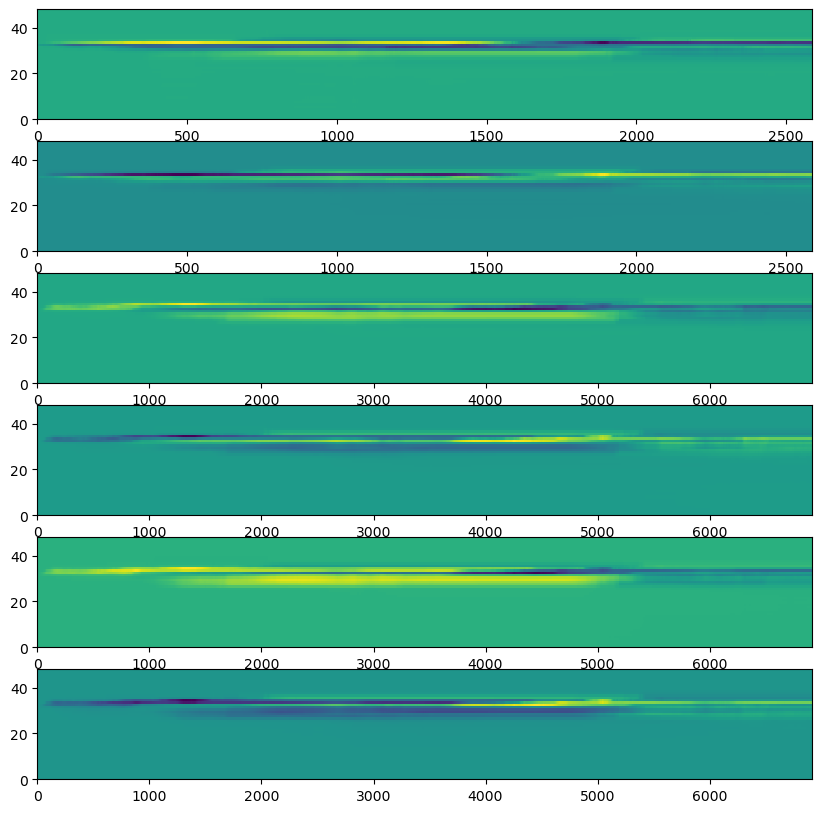

In [43]:
fig, ax = plt.subplots(nrows=6, figsize = (10, 10))
ax[0].pcolormesh(Cumsum_MeanHT_10km_sigma2, label='WAOM10')
ax[1].pcolormesh(Cumsum_EddyHT_10km_sigma2, label='WAOM10')

ax[2].pcolormesh(Cumsum_MeanHT_4km_sigma2, label='WAOM4')
ax[3].pcolormesh(Cumsum_EddyHT_4km_sigma2, label='WAOM10')

ax[4].pcolormesh(Cumsum_MeanHT_4kmNT_sigma2, label='WAOM4-NOTIDE')
ax[5].pcolormesh(Cumsum_EddyHT_4kmNT_sigma2, label='WAOM10')



NameError: name 'Cumsum_MeanHT_10km_sigma2' is not defined

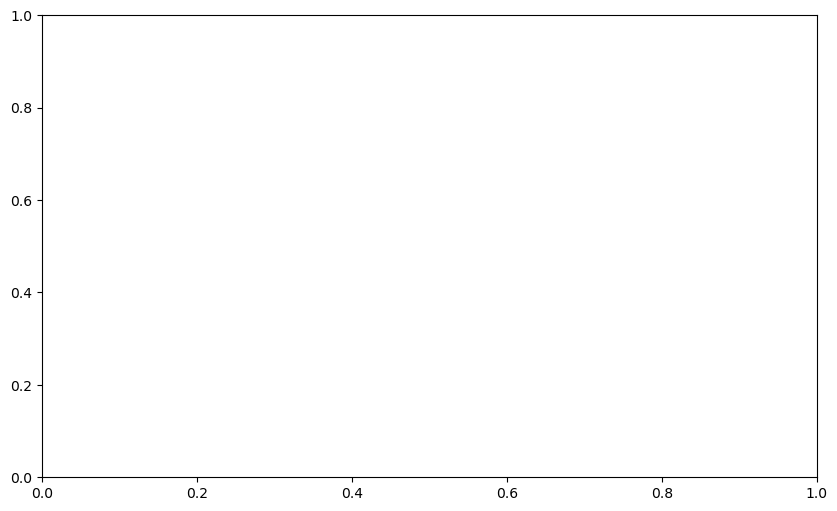

In [122]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(dist_along_10km,np.nansum(Cumsum_MeanHT_10km_sigma2,axis=0),'--r',label='WAOM10 Mean')       # 1. time-mean, 2. vertical integral
plt.plot(dist_along_4km,np.nansum(Cumsum_MeanHT_4km_sigma2,axis=0),'--b',label='WAOM4 Mean')       # 1. time-mean, 2. vertical integral
plt.plot(dist_along_4km,np.nansum(Cumsum_MeanHT_4kmNT_sigma2,axis=0),'--c',label='WAOM4-NOTIDE Mean')       # 1. time-mean, 2. vertical integral
plt.plot(dist_along_10km,np.nansum(Cumsum_EddyHT_10km_sigma2,axis=0),':r',label='WAOM10 Eddy')       # 1. time-mean, 2. vertical integral
plt.plot(dist_along_4km,np.nansum(Cumsum_EddyHT_4km_sigma2,axis=0),':b',label='WAOM4 Eddy')       # 1. time-mean, 2. vertical integral
plt.plot(dist_along_4km,np.nansum(Cumsum_EddyHT_4kmNT_sigma2,axis=0),':c',label='WAOM4-NOTIDE Eddy')       # 1. time-mean, 2. vertical integral
plt.legend()

### below need updates...

In [47]:
# print integrated values:

print('====================================================')
print('Sigma Net 2 - WAOM10 = ',np.nansum(Sum_10km_sigma2)*1e-12,' TW')
print('Sigma Net 2 - WAOM4 = ',np.nansum(Sum_4km_sigma2)*1e-12,' TW')
print('Sigma Net 2 - WAOM4-NOTIDE = ',np.nansum(Sum_4kmNT_sigma2)*1e-12,' TW')
print('====================================================')


NameError: name 'Sum_10km_sigma2' is not defined

In [47]:
print(Net_heat_transport_10km_irho2.shape)

(365, 48, 31, 2588)


In [48]:
# # SANITY CHECK: plot intergrated over density layers:


# fig, ax = plt.subplots(nrows=3, figsize = (12, 14))

# ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,:,:,:], axis=1), axis=1),axis=0),'--',label='WAOM10')       # 1. time-mean, 2. vertical integral
# ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,:,:,:], axis=1), axis=1),axis=0),'--',label='WAOM4')       
# ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,:,:,:], axis=1), axis=1),axis=0),'--',label='WAOM4-NOTIDE')

# for aa in range(0,3):
#     ax[aa].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[aa].set_xlim(0, dist_along_10km[-1])
#     # ax[aa].set_ylim(-4.5e14, 4.5e14)
#     ax[aa].set_ylim(-9e14, 9e14)
#     ax[aa].set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
#     ax[aa].grid('on')
#     if aa==0:
#         ax[aa].legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
#     if aa==2:
#         ax[aa].set_xlabel('Longitude coordinates along contour')
    
# ax[0].set_title('WAOM10 - $\sigma_{2}$')
# ax[1].set_title('WAOM4 - $\sigma_{2}$')
# ax[2].set_title('WAOM4-NOTIDE - $\sigma_{2}$')

# name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_Sigma2bin_vint-total_annual_v2.png'
# plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)


In [49]:
# integrate for intervals of density based on WM definitions:

# 36.8 - 36.9 - CDW: rho_grid2[16:18]
# 36.95 - still CDW? Changes a lot b/w 10-4km, specially West Antarct: rho_grid2[19]
# >37.0: DSW: rho_grid2[20:-1]




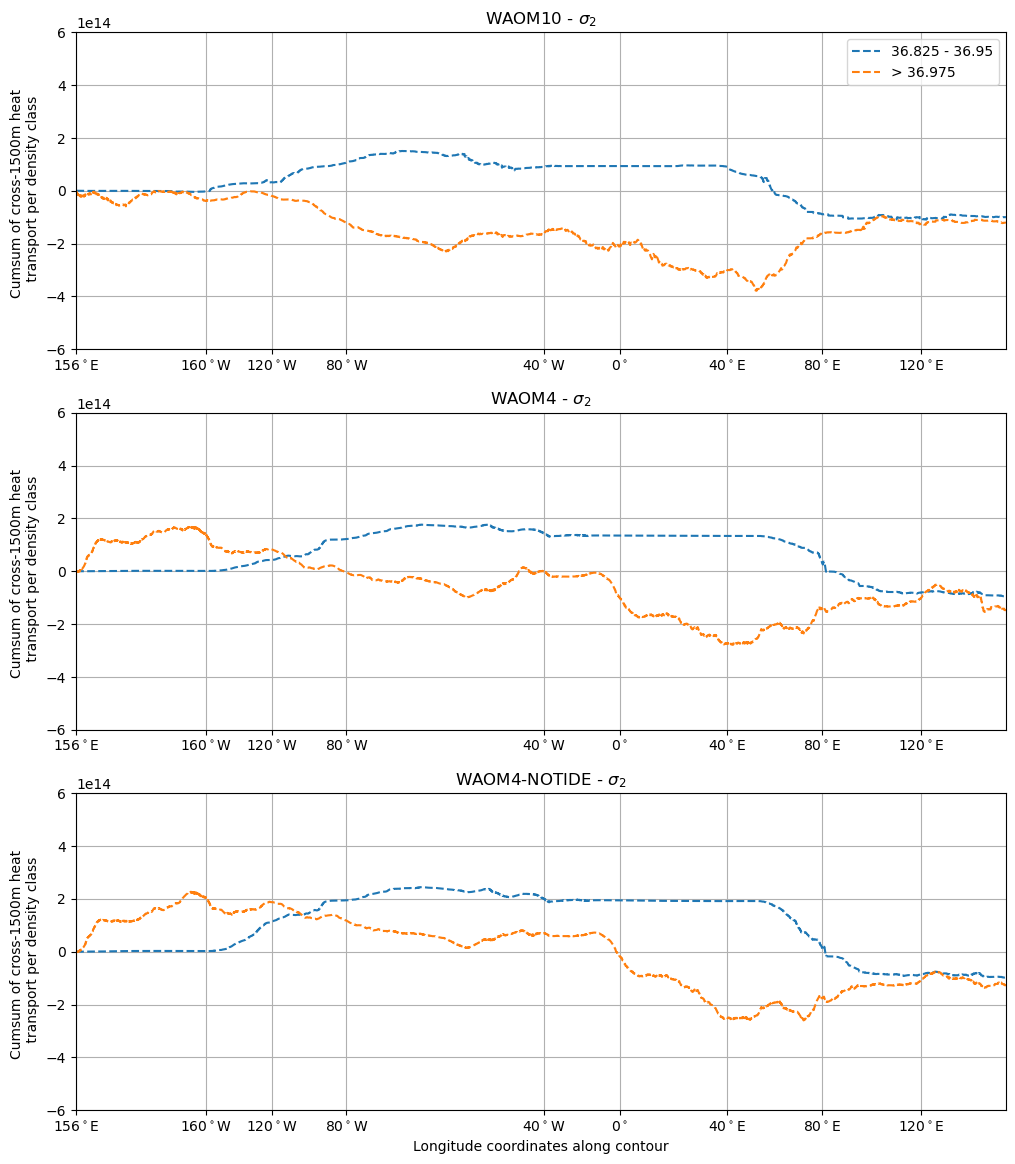

In [50]:
### -> used for dens (sig2) bins with 0.025 size:

fig, ax = plt.subplots(nrows=3, figsize = (12, 14))

ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,25:30,:,:], axis=1), axis=1),axis=0),'--',label='36.825 - 36.95')       # 1. time-mean, 2. vertical integral
ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,31:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 36.975')       # 1. time-mean, 2. vertical integral

ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,25:30,:,:], axis=1), axis=1),axis=0),'--',label='36.825 - 36.95')       # 1. time-mean, 2. vertical integral
ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,31:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 36.975')       # 1. time-mean, 2. vertical integral

ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,25:30,:,:], axis=1), axis=1),axis=0),'--',label='36.825 - 36.95')       # 1. time-mean, 2. vertical integral
ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,31:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 36.975')       # 1. time-mean, 2. vertical integral

for aa in range(0,3):
    ax[aa].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                              '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[aa].set_xlim(0, dist_along_10km[-1])
    ax[aa].set_ylim(-6e14, 6e14)
    ax[aa].set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
    ax[aa].grid('on')
    if aa==0:
        ax[aa].legend(loc='best')#, bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
    if aa==2:
        ax[aa].set_xlabel('Longitude coordinates along contour')
    
ax[0].set_title('WAOM10 - $\sigma_{2}$')
ax[1].set_title('WAOM4 - $\sigma_{2}$')
ax[2].set_title('WAOM4-NOTIDE - $\sigma_{2}$')

name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_Sigma2_perWMbins0.025_annual_v2.png'
plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)

In [51]:
### -> used for dens (sig2) bins with 0.05 size:

# fig, ax = plt.subplots(nrows=3, figsize = (12, 14))

# ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,16:18,:,:], axis=1), axis=1),axis=0),'--',label='36.8 - 36.9')       # 1. time-mean, 2. vertical integral
# ax[0].plot(dist_along_10km,np.nanmean(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,19,:,:], axis=1),axis=0),'--',label='36.95')       # 1. time-mean, 2. vertical integral
# ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,20:21,:,:], axis=1), axis=1),axis=0),'--',label='37.0 - 37.05')       # 1. time-mean, 2. vertical integral
# ax[0].plot(dist_along_10km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,22:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 37.1')       # 1. time-mean, 2. vertical integral

# ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,16:18,:,:], axis=1), axis=1),axis=0),'--',label='36.8 - 36.9')       # 1. time-mean, 2. vertical integral
# ax[1].plot(dist_along_4km,np.nanmean(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,19,:,:], axis=1),axis=0),'--',label='36.95')       # 1. time-mean, 2. vertical integral
# ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,20:21,:,:], axis=1), axis=1),axis=0),'--',label='37.0 - 37.05')       # 1. time-mean, 2. vertical integral
# ax[1].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4km_irho2_cumsum[:,22:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 37.1')       # 1. time-mean, 2. vertical integral

# ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,16:18,:,:], axis=1), axis=1),axis=0),'--',label='36.8 - 36.9')       # 1. time-mean, 2. vertical integral
# ax[2].plot(dist_along_4km,np.nanmean(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,19,:,:], axis=1),axis=0),'--',label='36.95')       # 1. time-mean, 2. vertical integral
# ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,20:21,:,:], axis=1), axis=1),axis=0),'--',label='37.0 - 37.05')       # 1. time-mean, 2. vertical integral
# ax[2].plot(dist_along_4km,np.nanmean(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2_cumsum[:,22:-1,:,:], axis=1), axis=1),axis=0),'--',label='> 37.1')       # 1. time-mean, 2. vertical integral

# for aa in range(0,3):
#     ax[aa].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[aa].set_xlim(0, dist_along_10km[-1])
#     ax[aa].set_ylim(-2.5e14, 2.5e14)
#     ax[aa].set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
#     ax[aa].grid('on')
#     if aa==0:
#         ax[aa].legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
#     if aa==2:
#         ax[aa].set_xlabel('Longitude coordinates along contour')
    
# ax[0].set_title('WAOM10 - $\sigma_{2}$')
# ax[1].set_title('WAOM4 - $\sigma_{2}$')
# ax[2].set_title('WAOM4-NOTIDE - $\sigma_{2}$')

# name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_Sigma2_perWMbins_annual_v2.png'
# plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)

# doing TS diagrams per regions:


In [52]:
# read model lon/lat grid:

dg = xr.open_dataset("/g/data/hh5/tmp/access-om/fbd581/ROMS/waom4_frc/waom4extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset

dg.close()

In [53]:
# mask per subregions following Dias et al (2023):

# create mask per longitude: Weddell, Maud Land, East Antarctica, Ross, West Antarctica
import matplotlib.path as mpath
import cartopy.feature as cfeature

# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
mask_Wed1lon = ma.masked_where(lon_rho <= -90, np.ones(lon_rho.shape)) # West limit for lat<-75
mask_Wed1lat = ma.masked_where(lat_rho > -75, np.ones(lat_rho.shape))
mask_Wed1 = mask_Wed1lon*mask_Wed1lat

mask_Wed2lon = ma.masked_where(lon_rho <= -65, np.ones(lon_rho.shape)) # West limit for lat<-75
mask_Wed2lat = ma.masked_where(lat_rho <= -75, np.ones(lat_rho.shape))
mask_Wed2 = mask_Wed2lon*mask_Wed2lat

mask_Wed12 = np.ma.array(mask_Wed1.filled(1) * mask_Wed2.filled(1), mask=(mask_Wed1.mask * mask_Wed2.mask))

mask_Wed3= ma.masked_where(lon_rho > -25, np.ones(lon_rho.shape)) # East limit for any latitude

mask_Wed = mask_Wed12*mask_Wed3

# 2) Mask Maud Land (25W : 60E, lat < -60)

mask_Mau1lon = ma.masked_where(lon_rho <= -25, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau1 = mask_Mau1lon*mask_Mau1lat

mask_Mau2lon = ma.masked_where(lon_rho >= 60, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Mau2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Mau2 = mask_Mau2lon*mask_Mau2lat

mask_Mau = mask_Mau1*mask_Mau2

# 3) Mask East Antarctica (60E : 160E, lat < -60)

mask_EAnt1lon = ma.masked_where(lon_rho < 60, np.ones(lon_rho.shape)) # East limit for any latitude
mask_EAnt1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_EAnt1 = mask_EAnt1lon*mask_EAnt1lat

mask_EAnt2lon = ma.masked_where(lon_rho >= 160, np.ones(lon_rho.shape)) # East limit for any latitude
mask_EAnt2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_EAnt2 = mask_EAnt2lon*mask_EAnt2lat

mask_EAnt = mask_EAnt1*mask_EAnt2

# 4) Mask Ross (140W : 160E, lat < -60)

mask_Ros1lon = ma.masked_where(lon_rho < 160, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Ros1lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Ros1 = mask_Ros1lon*mask_Ros1lat

mask_Ros2lon = ma.masked_where(lon_rho >= -149, np.ones(lon_rho.shape)) # East limit for any latitude
mask_Ros2lat = ma.masked_where(lat_rho > -60, np.ones(lat_rho.shape))
mask_Ros2 = mask_Ros2lon*mask_Ros2lat

mask_Ros = np.ma.array(mask_Ros1.filled(1) * mask_Ros2.filled(1), mask=(mask_Ros1.mask * mask_Ros2.mask))
# 5) Mask West Antarctica (150W : 90W, lat < -65)

mask_WAnt1 = ma.masked_where(lon_rho < -149, np.ones(lon_rho.shape)) # West limit for any latitude

mask_WAnt2lon = ma.masked_where(lon_rho > -90, np.ones(lon_rho.shape)) # East limit for lat <-73
mask_WAnt2lat = ma.masked_where(lat_rho > -75, np.ones(lat_rho.shape))
mask_WAnt2 = mask_WAnt2lon*mask_WAnt2lat

mask_WAnt3lon = ma.masked_where(lon_rho > -65, np.ones(lon_rho.shape)) # East limit for lat >-73
mask_WAnt3lat = ma.masked_where(lat_rho <= -75, np.ones(lat_rho.shape))
mask_WAnt3 = mask_WAnt3lon*mask_WAnt3lat

mask_WAnt23 = np.ma.array(mask_WAnt2.filled(1) * mask_WAnt3.filled(1), mask=(mask_WAnt2.mask * mask_WAnt3.mask))

mask_WAnt = mask_WAnt1*mask_WAnt23

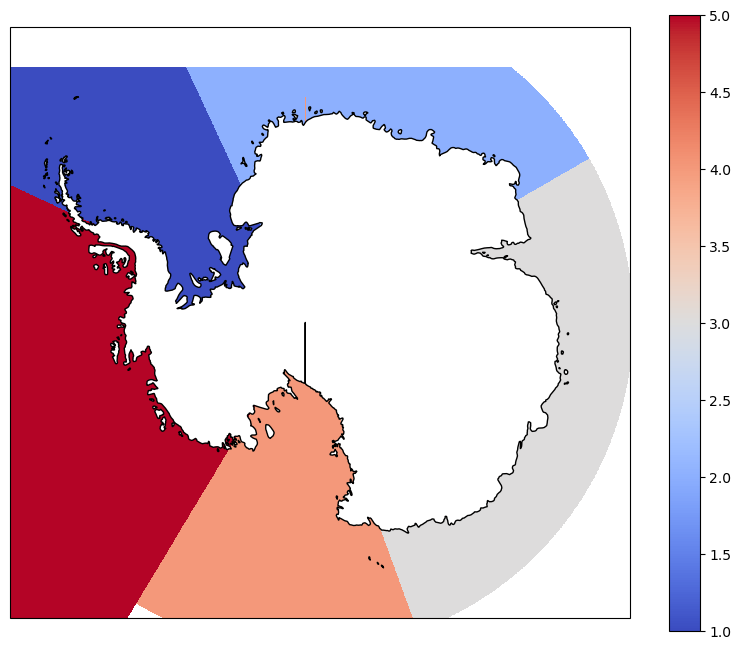

In [54]:
proj = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10,8))
# 1) Mask Weddell (90W : 25W, lat < -73, 65W : 25W, lat <= -73)
ax1 = fig.add_subplot(111, projection=proj)
c1=plt.pcolormesh(lon_rho, lat_rho, 1*np.ones(lon_rho.shape)*mask_Wed, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=1, vmax=5)
# 2) Mask Maud Land (25W : 60E, lat < -60)
c2=plt.pcolormesh(lon_rho, lat_rho, 2*np.ones(lon_rho.shape)*mask_Mau, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=1, vmax=5)
# 3) Mask East Antarctica (60E : 160E, lat < -60)
c3=plt.pcolormesh(lon_rho, lat_rho, 3*np.ones(lon_rho.shape)*mask_EAnt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=1, vmax=5)
# 4) Mask Ross (140W : 160E, lat < -65)
c4=plt.pcolormesh(lon_rho, lat_rho, 4*np.ones(lon_rho.shape)*mask_Ros, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=1, vmax=5)
# 5) Mask West Antarctica (140W : 90W, lat < -60)
c5=plt.pcolormesh(lon_rho, lat_rho, 5*np.ones(lon_rho.shape)*mask_WAnt, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=1, vmax=5)
# 6) add contour line:
# ax1.plot(lon_along_10km[0:500], lat_along_10km[0:500], transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white')
plt.colorbar(c5)
# plt.clim([1,5])
plt.show()

# name_fig="waom10extend_subregion_masks.png"
# plt.savefig(fig_path + name_fig, bbox_inches='tight', dpi=300)

In [55]:
# define limits based on longitude along contour: WAOM10

ind_contour_Wed = np.where((np.round(lon_along_10km)>=-90) & (np.round(lon_along_10km)<-25)) # Weddell 90W-25W
ind_contour_Mau = np.where((np.round(lon_along_10km)>=-25) & (np.round(lon_along_10km)<60)) # Maud 25W-60E
ind_contour_EAnt = np.where((np.round(lon_along_10km)>=60) & (np.round(lon_along_10km)<160)) # East A 60E-160E
ind_contour_Ros = np.where((np.round(lon_along_10km)>=160) | (np.round(lon_along_10km)<-140)) # Ross 160E-140W
ind_contour_WAnt = np.where((np.round(lon_along_10km)>=-140) & (np.round(lon_along_10km)<-90)) # West A 140W-90W

# transform tuple from np.where to a labeled DataArray:
ind_Wed_10km = xr.DataArray(np.asarray(ind_contour_Wed[0]), dims=['contour_index_array'])
ind_Mau_10km = xr.DataArray(np.asarray(ind_contour_Mau[0]), dims=['contour_index_array'])
ind_EAnt_10km = xr.DataArray(np.asarray(ind_contour_EAnt[0]), dims=['contour_index_array'])
ind_Ros_10km = xr.DataArray(np.asarray(ind_contour_Ros[0]), dims=['contour_index_array'])
ind_WAnt_10km = xr.DataArray(np.asarray(ind_contour_WAnt[0]), dims=['contour_index_array'])
del ind_contour_Wed, ind_contour_Mau, ind_contour_EAnt, ind_contour_Ros, ind_contour_WAnt

In [56]:
# define limits based on longitude along contour: WAOM4

ind_contour_Wed = np.where((np.round(lon_along_4km)>=-90) & (np.round(lon_along_4km)<-25)) # Weddell 90W-25W
ind_contour_Mau = np.where((np.round(lon_along_4km)>=-25) & (np.round(lon_along_4km)<60)) # Maud 25W-60E
ind_contour_EAnt = np.where((np.round(lon_along_4km)>=60) & (np.round(lon_along_4km)<160)) # East A 60E-160E
ind_contour_Ros = np.where((np.round(lon_along_4km)>=160) | (np.round(lon_along_4km)<-140)) # Ross 160E-140W
ind_contour_WAnt = np.where((np.round(lon_along_4km)>=-140) & (np.round(lon_along_4km)<-90)) # West A 140W-90W

# transform tuple from np.where to a labeled DataArray:
ind_Wed_4km = xr.DataArray(np.asarray(ind_contour_Wed[0]), dims=['contour_index_array'])
ind_Mau_4km = xr.DataArray(np.asarray(ind_contour_Mau[0]), dims=['contour_index_array'])
ind_EAnt_4km = xr.DataArray(np.asarray(ind_contour_EAnt[0]), dims=['contour_index_array'])
ind_Ros_4km = xr.DataArray(np.asarray(ind_contour_Ros[0]), dims=['contour_index_array'])
ind_WAnt_4km = xr.DataArray(np.asarray(ind_contour_WAnt[0]), dims=['contour_index_array'])
del ind_contour_Wed, ind_contour_Mau, ind_contour_EAnt, ind_contour_Ros, ind_contour_WAnt

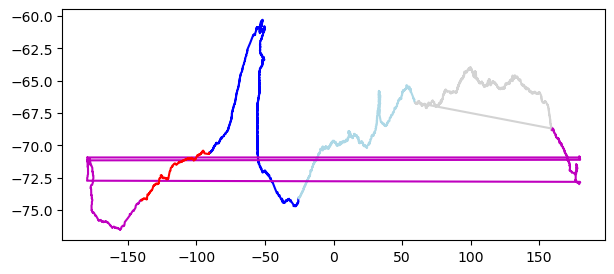

In [57]:

fig = plt.figure(figsize=(7,3))
# 1) Mask Weddell (90W : 25W, lat < -73, 65W : 25W, lat <= -73)
ax1 = fig.add_subplot(111)#, projection=proj)
# 6) add contour line:
ax1.plot(lon_along_10km[ind_Wed_10km], lat_along_10km[ind_Wed_10km],'b')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_10km[ind_Mau_10km], lat_along_10km[ind_Mau_10km],'lightblue')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_10km[ind_EAnt_10km], lat_along_10km[ind_EAnt_10km],'lightgray')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_10km[ind_Ros_10km], lat_along_10km[ind_Ros_10km],'m')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_10km[ind_WAnt_10km], lat_along_10km[ind_WAnt_10km],'r')#, transform=ccrs.PlateCarree())



# ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white')
plt.colorbar(c5)
# plt.clim([1,5])
plt.show()


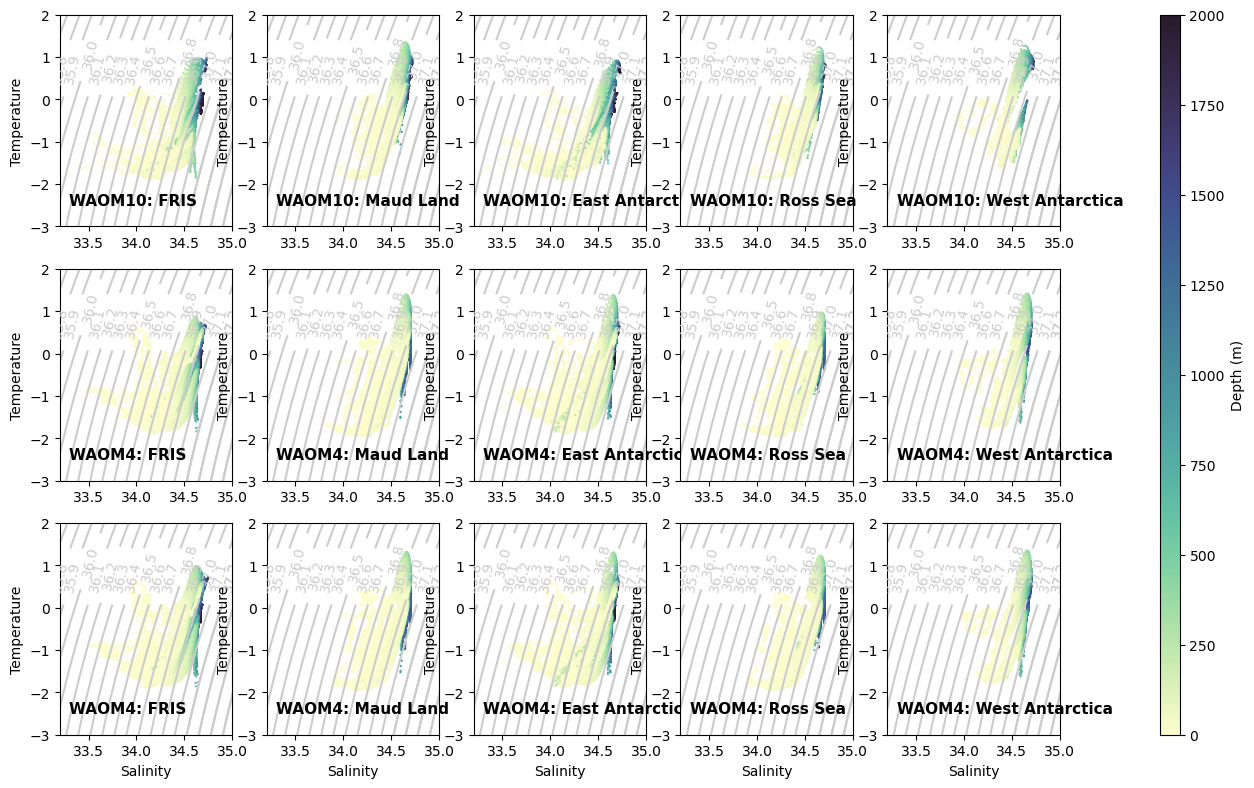

In [58]:
import cmocean

fig, ax = plt.subplots(nrows=3, ncols=5, figsize = (20, 12))
# normal isopycnals
for bb in range(0,5):
    for aa in range(0,3):
        CS1 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
        CS2 = ax[aa,bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
        ax[aa,bb].clabel(CS2, CS2.levels, inline=True, fontsize=10)
        ax[aa,bb].set_xlim([33.2,35])
        ax[aa,bb].set_ylim([-3,2])
        ax[aa,bb].set_ylabel('Temperature')
        if aa == 2:
            ax[aa,bb].set_xlabel('Salinity')

# FRIS
sc = ax[0,0].scatter(salt_10km.isel(contour_index_array=ind_Wed_10km).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_Wed_10km).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_Wed_10km).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0,0].text(33.3,-2.5,'WAOM10: FRIS', fontsize=11, fontweight='bold')

sc = ax[1,0].scatter(salt_4km.isel(contour_index_array=ind_Wed_4km).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_Wed_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Wed_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1,0].text(33.3,-2.5,'WAOM4: FRIS', fontsize=11, fontweight='bold')

sc = ax[2,0].scatter(salt_4kmNT.isel(contour_index_array=ind_Wed_4km).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_Wed_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Wed_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2,0].text(33.3,-2.5,'WAOM4: FRIS', fontsize=11, fontweight='bold')
# MAUD LAND
sc = ax[0,1].scatter(salt_10km.isel(contour_index_array=ind_Mau_10km).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_Mau_10km).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_Mau_10km).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0,1].text(33.3,-2.5,'WAOM10: Maud Land', fontsize=11, fontweight='bold')

sc = ax[1,1].scatter(salt_4km.isel(contour_index_array=ind_Mau_4km).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_Mau_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Mau_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1,1].text(33.3,-2.5,'WAOM4: Maud Land', fontsize=11, fontweight='bold')

sc = ax[2,1].scatter(salt_4kmNT.isel(contour_index_array=ind_Mau_4km).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_Mau_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Mau_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2,1].text(33.3,-2.5,'WAOM4: Maud Land', fontsize=11, fontweight='bold')
# East antarct.
sc = ax[0,2].scatter(salt_10km.isel(contour_index_array=ind_EAnt_10km).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_EAnt_10km).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_EAnt_10km).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0,2].text(33.3,-2.5,'WAOM10: East Antarctica', fontsize=11, fontweight='bold')

sc = ax[1,2].scatter(salt_4km.isel(contour_index_array=ind_EAnt_4km).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_EAnt_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_EAnt_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1,2].text(33.3,-2.5,'WAOM4: East Antarctica', fontsize=11, fontweight='bold')

sc = ax[2,2].scatter(salt_4kmNT.isel(contour_index_array=ind_EAnt_4km).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_EAnt_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_EAnt_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2,2].text(33.3,-2.5,'WAOM4: East Antarctica', fontsize=11, fontweight='bold')
# Ross.
sc = ax[0,3].scatter(salt_10km.isel(contour_index_array=ind_Ros_10km).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_Ros_10km).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_Ros_10km).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0,3].text(33.3,-2.5,'WAOM10: Ross Sea', fontsize=11, fontweight='bold')

sc = ax[1,3].scatter(salt_4km.isel(contour_index_array=ind_Ros_4km).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_Ros_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Ros_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1,3].text(33.3,-2.5,'WAOM4: Ross Sea', fontsize=11, fontweight='bold')

sc = ax[2,3].scatter(salt_4kmNT.isel(contour_index_array=ind_Ros_4km).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_Ros_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_Ros_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2,3].text(33.3,-2.5,'WAOM4: Ross Sea', fontsize=11, fontweight='bold')
# West antarct.
sc = ax[0,4].scatter(salt_10km.isel(contour_index_array=ind_WAnt_10km).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_WAnt_10km).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_WAnt_10km).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0,4].text(33.3,-2.5,'WAOM10: West Antarctica', fontsize=11, fontweight='bold')

sc = ax[1,4].scatter(salt_4km.isel(contour_index_array=ind_WAnt_4km).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_WAnt_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_WAnt_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1,4].text(33.3,-2.5,'WAOM4: West Antarctica', fontsize=11, fontweight='bold')

sc = ax[2,4].scatter(salt_4kmNT.isel(contour_index_array=ind_WAnt_4km).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_WAnt_4km).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_WAnt_4km),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2,4].text(33.3,-2.5,'WAOM4: West Antarctica', fontsize=11, fontweight='bold')

# - cbar horiz
# cbar_ax1 = fig.add_axes([0.12, 0.005, 0.785, 0.01])
# fig.colorbar(sc, cax=cbar_ax1, orientation='horizontal')
# cbar_ax1.set_xlabel('Depth (m)')
# - cbar vert
cbar_ax1 = fig.add_axes([0.8, 0.3, 0.01, 0.6])
fig.colorbar(sc, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Depth (m)')

plt.subplots_adjust(left=0.25, right=0.75, bottom=0.3, top=0.9)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_TSdiag_1500m_rho2_annnual_subregions.png"
plt.savefig(name_fig, bbox_inches='tight', dpi=300)

# Analyses for the regin near Totten & Moscow Univ. Ice Shelves:

In [59]:
## getting index first:

ind_contour_TIS = np.where((np.round(lon_along_10km)>=95) & (np.round(lon_along_10km)<140))
# transform tuple from np.where to a labeled DataArray:
ind_TIS_10km = xr.DataArray(np.asarray(ind_contour_TIS[0]), dims=['contour_index_array'])

ind_contour_TIS = np.where((np.round(lon_along_4km)>=95) & (np.round(lon_along_4km)<140))
# transform tuple from np.where to a labeled DataArray:
ind_TIS_4km = xr.DataArray(np.asarray(ind_contour_TIS[0]), dims=['contour_index_array'])

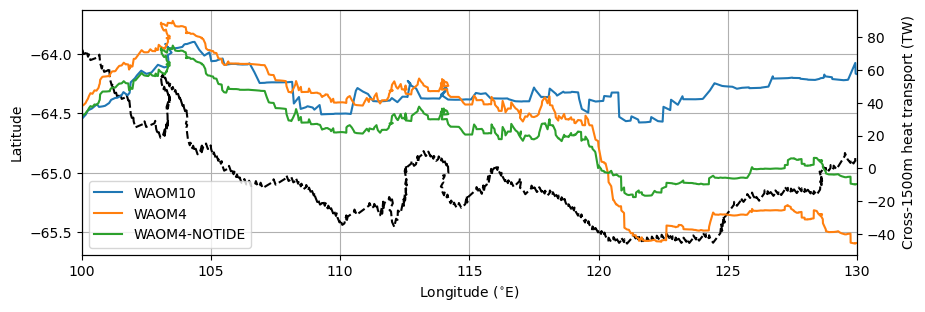

In [60]:
# plot cumsum HT only for the East Antarctica sector:

# var = Net_heat_transport_10km_irho2
# var = np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,:,:,ind_TIS_10km[:]], axis=1), axis=1),axis=0)
var_10km = Net_heat_transport_10km_irho2[:,:,:,ind_TIS_10km[:]]
var_4km = Net_heat_transport_4km_irho2[:,:,:,ind_TIS_4km[:]]
var_4kmNT = Net_heat_transport_4kmNT_irho2[:,:,:,ind_TIS_4km[:]]

vplot_10km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_10km, axis=1), axis=1), axis=1), axis=0)
vplot_4km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4km, axis=1), axis=1), axis=1), axis=0)
vplot_4kmNT = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4kmNT, axis=1), axis=1), axis=1), axis=0)


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)#, projection=proj)
# ax1.plot(lon_along_10km[ind_TIS_10km[:]], lat_along_10km[ind_TIS_10km[:]],'lightgray')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_4km[ind_TIS_4km[:]], lat_along_4km[ind_TIS_4km[:]],linestyle='dashed',color='k',label='1500m isobath')#, transform=ccrs.PlateCarree())
# ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lon_along_10km[ind_TIS_10km[:]], vplot_10km*1e-12,label='WAOM10')#, transform=ccrs.PlateCarree())
ax2.plot(lon_along_4km[ind_TIS_4km[:]], vplot_4km*1e-12,label='WAOM4')#, transform=ccrs.PlateCarree())
ax2.plot(lon_along_4km[ind_TIS_4km[:]], vplot_4kmNT*1e-12,label='WAOM4-NOTIDE')#, transform=ccrs.PlateCarree())
ax2.legend()

ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude ($^{\circ}$E)')
ax2.set_ylabel('Cross-1500m heat transport (TW)')
ax1.grid()

ax1.set_xlim(100,130)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_Cross-1500m_HT_vint_annnual_EAntTIS.png"
plt.savefig(name_fig, dpi=300)

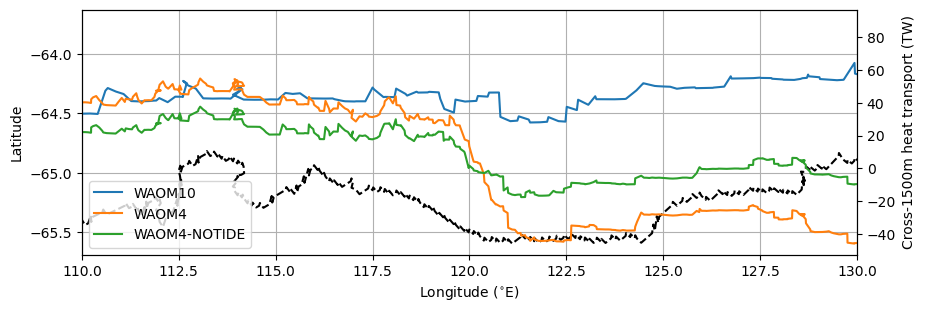

In [77]:
# plot cumsum HT only for the East Antarctica sector:

# var = Net_heat_transport_10km_irho2
# var = np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,:,:,ind_TIS_10km[:]], axis=1), axis=1),axis=0)
var_10km = Net_heat_transport_10km_irho2[:,:,:,ind_TIS_10km[:]]
var_4km = Net_heat_transport_4km_irho2[:,:,:,ind_TIS_4km[:]]
var_4kmNT = Net_heat_transport_4kmNT_irho2[:,:,:,ind_TIS_4km[:]]

vplot_10km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_10km, axis=1), axis=1), axis=1), axis=0)
vplot_4km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4km, axis=1), axis=1), axis=1), axis=0)
vplot_4kmNT = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4kmNT, axis=1), axis=1), axis=1), axis=0)


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)#, projection=proj)
# ax1.plot(lon_along_10km[ind_TIS_10km[:]], lat_along_10km[ind_TIS_10km[:]],'lightgray')#, transform=ccrs.PlateCarree())
ax1.plot(lon_along_4km[ind_TIS_4km[:]], lat_along_4km[ind_TIS_4km[:]],linestyle='dashed',color='k',label='1500m isobath')#, transform=ccrs.PlateCarree())
# ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lon_along_10km[ind_TIS_10km[:]], vplot_10km*1e-12,label='WAOM10')#, transform=ccrs.PlateCarree())
ax2.plot(lon_along_4km[ind_TIS_4km[:]], vplot_4km*1e-12,label='WAOM4')#, transform=ccrs.PlateCarree())
ax2.plot(lon_along_4km[ind_TIS_4km[:]], vplot_4kmNT*1e-12,label='WAOM4-NOTIDE')#, transform=ccrs.PlateCarree())
ax2.legend()

ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude ($^{\circ}$E)')
ax2.set_ylabel('Cross-1500m heat transport (TW)')
ax1.grid()

ax1.set_xlim(110,130)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_Cross-1500m_HT_vint_annnual_EAntTIS_2.png"
plt.savefig(name_fig, dpi=300)

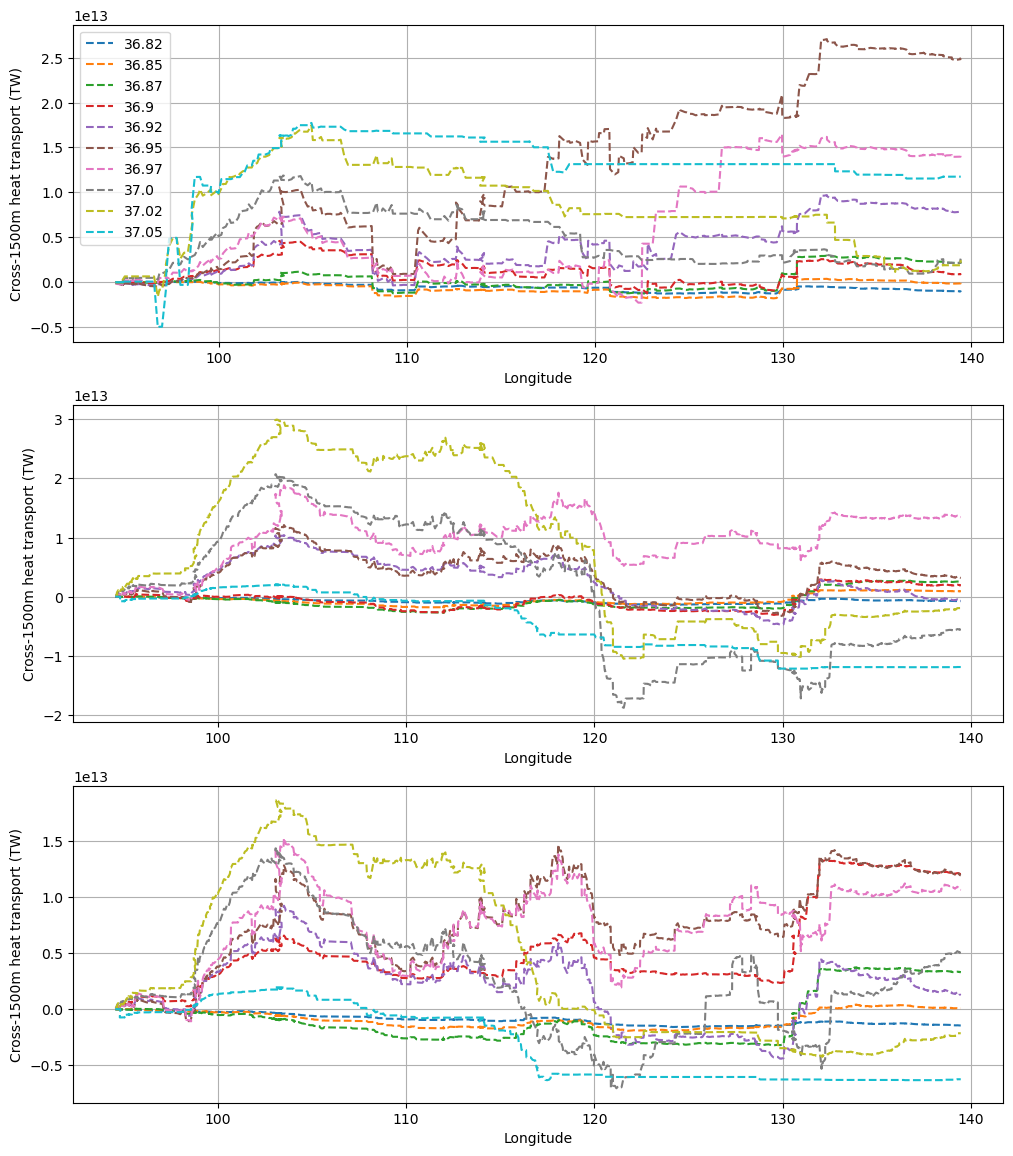

In [61]:
# fig2: per density bin:

# plot cumsum HT only for the East Antarctica sector:

# var = Net_heat_transport_10km_irho2
# var = np.nanmean(np.nansum(np.nansum(Net_heat_transport_10km_irho2_cumsum[:,:,:,ind_TIS_10km[:]], axis=1), axis=1),axis=0)
var_10km = Net_heat_transport_10km_irho2[:,:,:,ind_TIS_10km[:]]
var_4km = Net_heat_transport_4km_irho2[:,:,:,ind_TIS_4km[:]]
var_4kmNT = Net_heat_transport_4kmNT_irho2[:,:,:,ind_TIS_4km[:]]

vplot_10km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_10km, axis=1), axis=2), axis=0), axis=1)
vplot_4km = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4km, axis=1), axis=2), axis=0), axis=1)
vplot_4kmNT = np.nanmean(np.cumsum(np.nansum(np.nansum(var_4kmNT, axis=1), axis=2), axis=0), axis=1)


fig, ax = plt.subplots(nrows=3, figsize = (12, 14))
# ax[0].plot(lon_along_4km[ind_TIS_4km[:]], lat_along_4km[ind_TIS_4km[:]],linestyle='dashed',color='k',label='1500m isobath')#, transform=ccrs.PlateCarree())
# ax[0].legend()

for ll in np.arange(25,35,1):
    ax[0].plot(lon_along_10km[ind_TIS_10km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_10km_irho2[:,ll,:,ind_TIS_10km[:]], axis=2), axis=0), axis=1),'--',label=str(round(rho_grid2[ll],2)))  
    ax[1].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_4km_irho2[:,ll,:,ind_TIS_4km[:]], axis=2), axis=0), axis=1),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    ax[2].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_4kmNT_irho2[:,ll,:,ind_TIS_4km[:]], axis=2), axis=0), axis=1),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
# for ll in np.arange(35,45,1):
#     ax[0].plot(lon_along_10km[ind_TIS_10km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_10km_irho2[:,ll,:,ind_TIS_10km[:]], axis=2), axis=0), axis=1),'-',label=str(round(rho_grid2[ll],2)))  
#     ax[1].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_4km_irho2[:,ll,:,ind_TIS_4km[:]], axis=2), axis=0), axis=1),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
#     ax[2].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(Net_heat_transport_4kmNT_irho2[:,ll,:,ind_TIS_4km[:]], axis=2), axis=0), axis=1),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
# MCDW = rho2[28:32]
# DSW = rho2[32:35]

ax[0].legend()
for aa in np.arange(0,3):
    ax[aa].set_ylabel('Latitude')
    ax[aa].set_xlabel('Longitude')
    ax[aa].set_ylabel('Cross-1500m heat transport (TW)')
    ax[aa].grid()

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_Cross-1500m_HT_sig2_annnual_subregions.png"
plt.savefig(name_fig, dpi=300)

In [62]:
print(Net_heat_transport_10km_irho2[:,ll,:,ind_TIS_10km[:]].shape, lon_along_10km[ind_TIS_10km[:]].shape)
print(np.nansum(Net_heat_transport_10km_irho2[:,28:32,:,ind_TIS_10km[:]], axis=1).shape)
# print(np.cumsum(np.nansum(Net_heat_transport_10km_irho2[:,ll,:,ind_TIS_10km[:]], axis=2), axis=0).shape)
# print(np.nanmean(np.cumsum(np.nansum(Net_heat_transport_10km_irho2[:,ll,:,ind_TIS_10km[:]], axis=2), axis=0), axis=1).shape)

(329, 365, 31) (329,)
(365, 31, 329)


In [63]:
Net_heat_transport_10km_irho2[:,28:32,:,ind_TIS_10km[:]].shape

(365, 4, 31, 329)

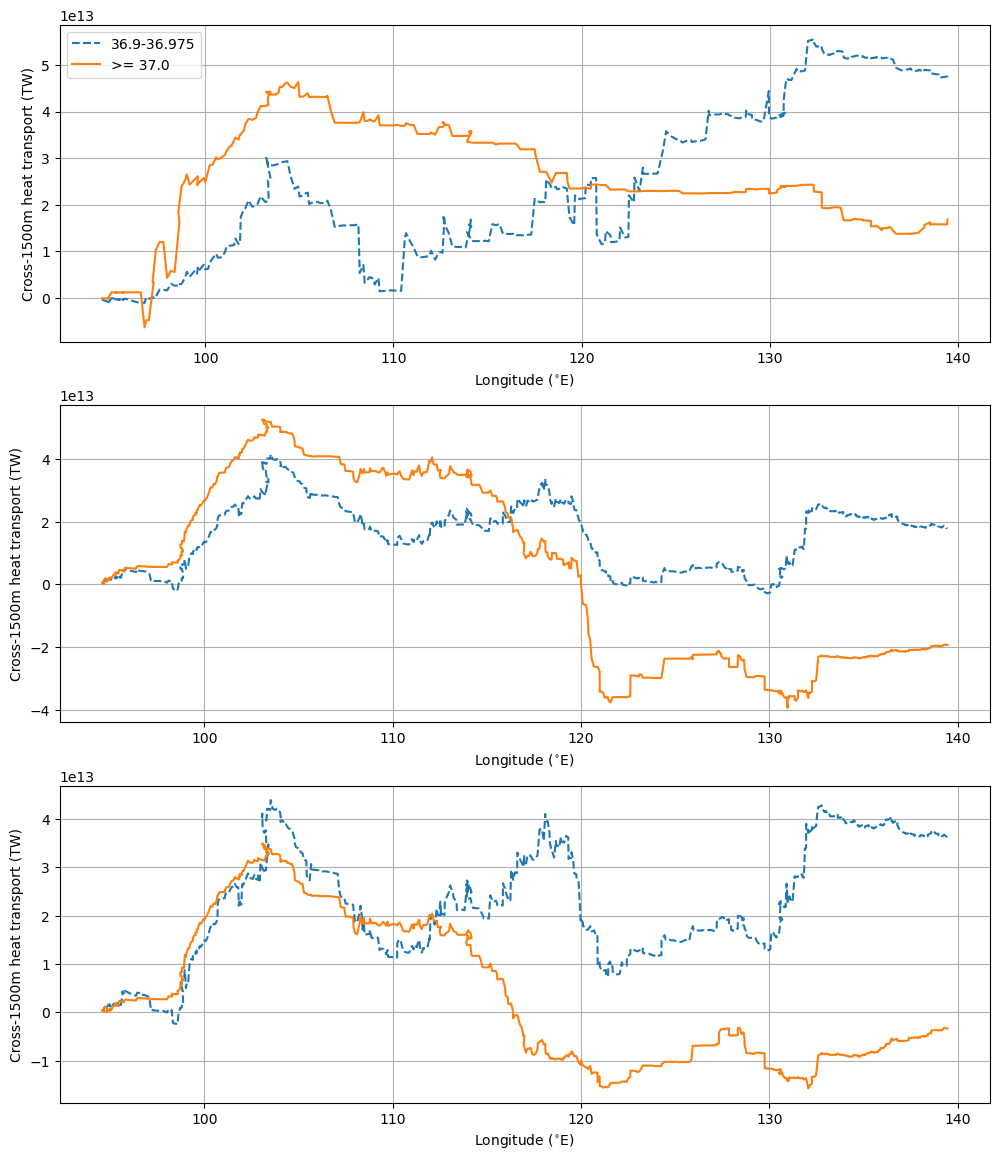

In [64]:
# fig2: per density bin:

# plot cumsum HT only for the East Antarctica sector:

fig, ax = plt.subplots(nrows=3, figsize = (12, 14))
# ax[0].plot(lon_along_4km[ind_TIS_4km[:]], lat_along_4km[ind_TIS_4km[:]],linestyle='dashed',color='k',label='1500m isobath')#, transform=ccrs.PlateCarree())
# ax[0].legend()
ax[0].plot(lon_along_10km[ind_TIS_10km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_10km_irho2[:,28:32,:,ind_TIS_10km[:]], axis=1), axis=1), axis=1), axis=0),'--',label='36.9-36.975')
ax[1].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_4km_irho2[:,28:32,:,ind_TIS_4km[:]], axis=1), axis=1), axis=1), axis=0),'--',label='36.9-36.975')
ax[2].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2[:,28:32,:,ind_TIS_4km[:]], axis=1), axis=1), axis=1), axis=0),'--',label='36.9-36.975')
# MCDW = rho2[28:32]
ax[0].plot(lon_along_10km[ind_TIS_10km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_10km_irho2[:,32:35,:,ind_TIS_10km[:]], axis=1), axis=1), axis=1), axis=0),'-',label='>= 37.0')
ax[1].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_4km_irho2[:,32:35,:,ind_TIS_4km[:]], axis=1), axis=1), axis=1), axis=0),'-',label='>= 37.0')
ax[2].plot(lon_along_4km[ind_TIS_4km[:]],np.nanmean(np.cumsum(np.nansum(np.nansum(Net_heat_transport_4kmNT_irho2[:,32:35,:,ind_TIS_4km[:]], axis=1), axis=1), axis=1), axis=0),'-',label='>= 37.0')
# DSW = rho2[32:35]

ax[0].legend()
for aa in np.arange(0,3):
    ax[aa].set_ylabel('Latitude')
    ax[aa].set_xlabel('Longitude ($^{\circ}$E)')
    ax[aa].set_ylabel('Cross-1500m heat transport (TW)')
    ax[aa].grid()

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_Cross-1500m_HT_MCDWxDSW_annnual_subregions.png"
plt.savefig(name_fig, dpi=300)

In [65]:
# Net_heat_transport_10km_irho2[:,25:28,:,ind_TIS_10km].shape
# np.nanmean(np.nansum(Net_heat_transport_10km_irho2[:,25:28,:,ind_TIS_10km], axis=1), axis=0).shape

In [66]:
# rho_grid2[32:35]

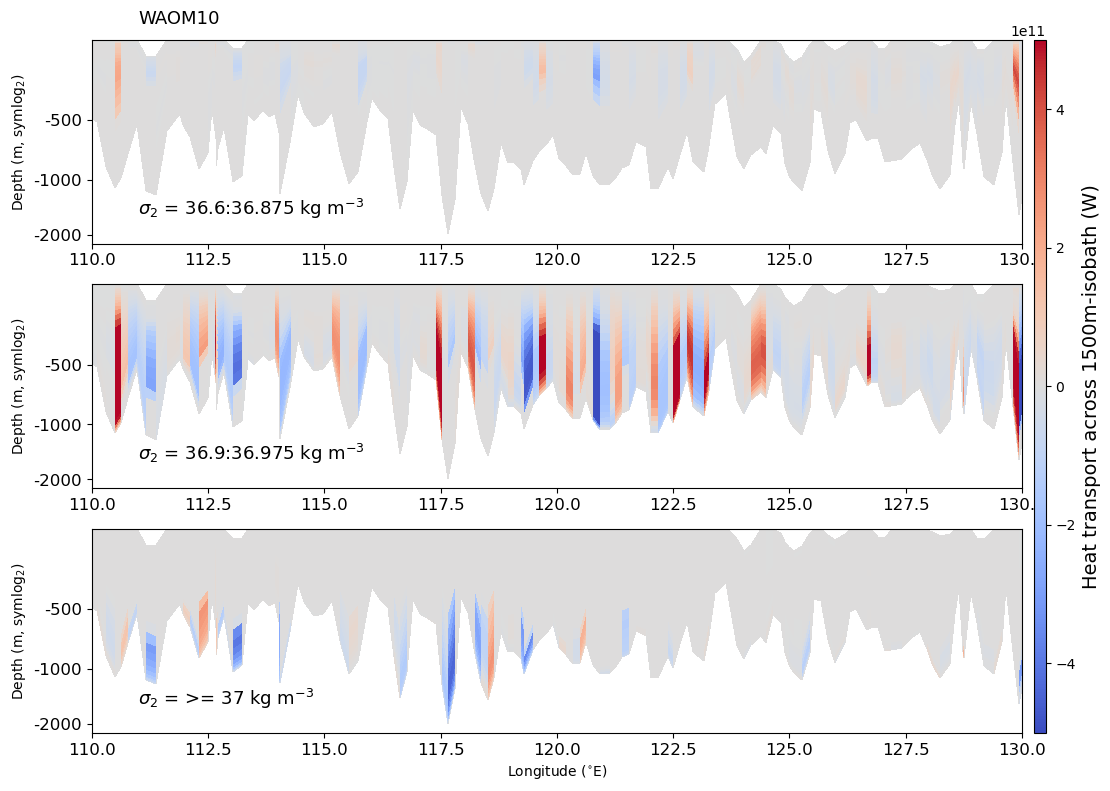

In [67]:
fig, ax = plt.subplots(nrows=3, figsize = (12, 9))
ax[0].text(111,100,'WAOM10',fontsize=13)
aa = ax[0].pcolormesh(lon_along_10km[ind_TIS_10km],np.nanmean(z_rho_10km.fillna(0)[:,:,ind_TIS_10km], axis=0),np.nanmean(np.nansum(Net_heat_transport_10km_irho2[:,20:28,:,ind_TIS_10km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[0].text(111,-1600,'$\sigma_{2}$ = 36.6:36.875 kg m$^{-3}$',fontsize=13)
ax[0].set_xlim(110,130)

ax[1].pcolormesh(lon_along_10km[ind_TIS_10km],np.nanmean(z_rho_10km.fillna(0)[:,:,ind_TIS_10km], axis=0),np.nanmean(np.nansum(Net_heat_transport_10km_irho2[:,28:32,:,ind_TIS_10km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[1].text(111,-1600,'$\sigma_{2}$ = 36.9:36.975 kg m$^{-3}$',fontsize=13)
ax[1].set_xlim(110,130)

ax[2].pcolormesh(lon_along_10km[ind_TIS_10km],np.nanmean(z_rho_10km.fillna(0)[:,:,ind_TIS_10km], axis=0),np.nanmean(np.nansum(Net_heat_transport_10km_irho2[:,32:35,:,ind_TIS_10km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[2].text(111,-1600,'$\sigma_{2}$ = >= 37 kg m$^{-3}$',fontsize=13)
ax[2].set_xlim(110,130)

for bb in range(0,3):
    # ax[bb].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
    ax[bb].set_yscale('symlog',base = 2, linthresh=700)
    ax[bb].set_ylabel('Depth (m, symlog$_2$)')
    ax[bb].set_yticklabels(['-2000','-1000','-500'])
    ax[bb].set_aspect('auto')
    ax[bb].tick_params(labelsize=12)
ax[2].set_xlabel('Longitude ($^{\circ}$E)')

cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(aa, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport across 1500m-isobath (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Net_heat_transp_1500m_rho2_annual_EAntTIS.png"
plt.savefig(name_fig, dpi=300)

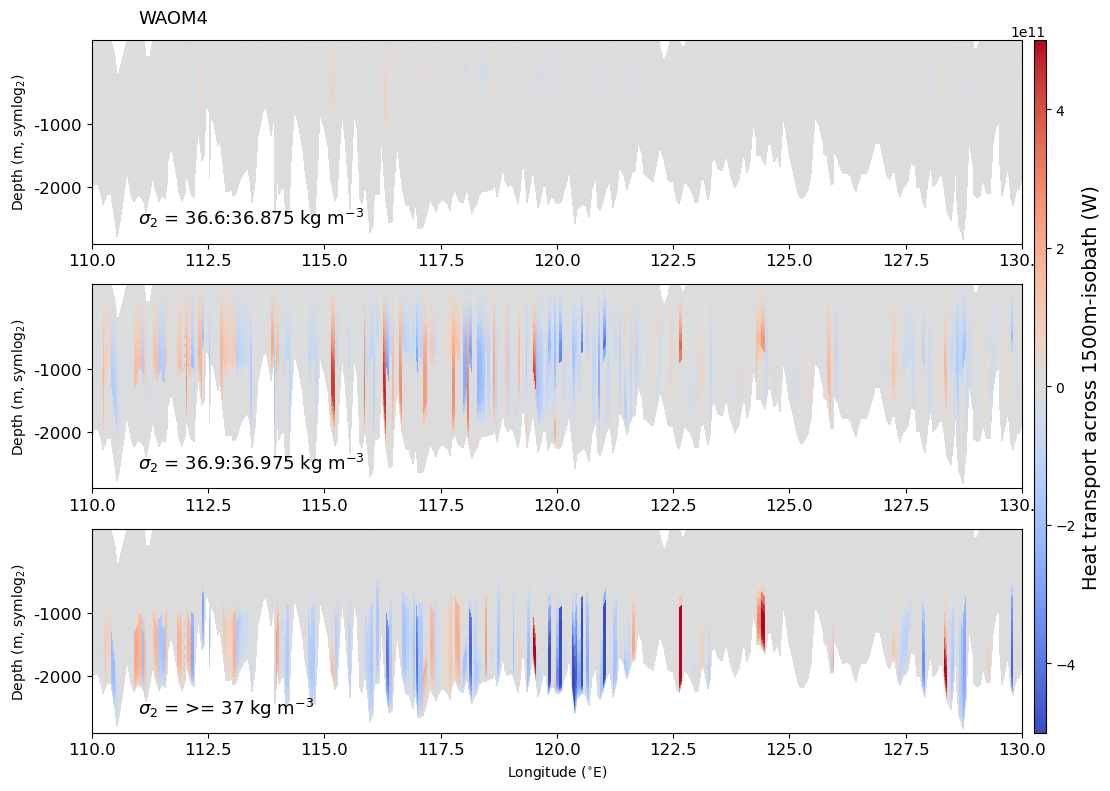

In [68]:
fig, ax = plt.subplots(nrows=3, figsize = (12, 9))
ax[0].text(111,100,'WAOM4',fontsize=13)
aa = ax[0].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4km_irho2[:,20:28,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[0].text(111,-1600,'$\sigma_{2}$ = 36.6:36.875 kg m$^{-3}$',fontsize=13)
ax[0].set_xlim(110,130)

ax[1].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4km_irho2[:,28:32,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[1].text(111,-1600,'$\sigma_{2}$ = 36.9:36.975 kg m$^{-3}$',fontsize=13)
ax[1].set_xlim(110,130)

ax[2].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4km_irho2[:,32:35,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[2].text(111,-1600,'$\sigma_{2}$ = >= 37 kg m$^{-3}$',fontsize=13)
ax[2].set_xlim(110,130)

for bb in range(0,3):
    # ax[bb].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
    ax[bb].set_yscale('symlog',base = 2, linthresh=700)
    ax[bb].set_ylabel('Depth (m, symlog$_2$)')
    ax[bb].set_yticklabels(['-2000','-1000','-500'])
    ax[bb].set_aspect('auto')
    ax[bb].tick_params(labelsize=12)
ax[2].set_xlabel('Longitude ($^{\circ}$E)')

cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(aa, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport across 1500m-isobath (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Net_heat_transp_1500m_rho2_annual_EAntTIS.png"
plt.savefig(name_fig, dpi=300)

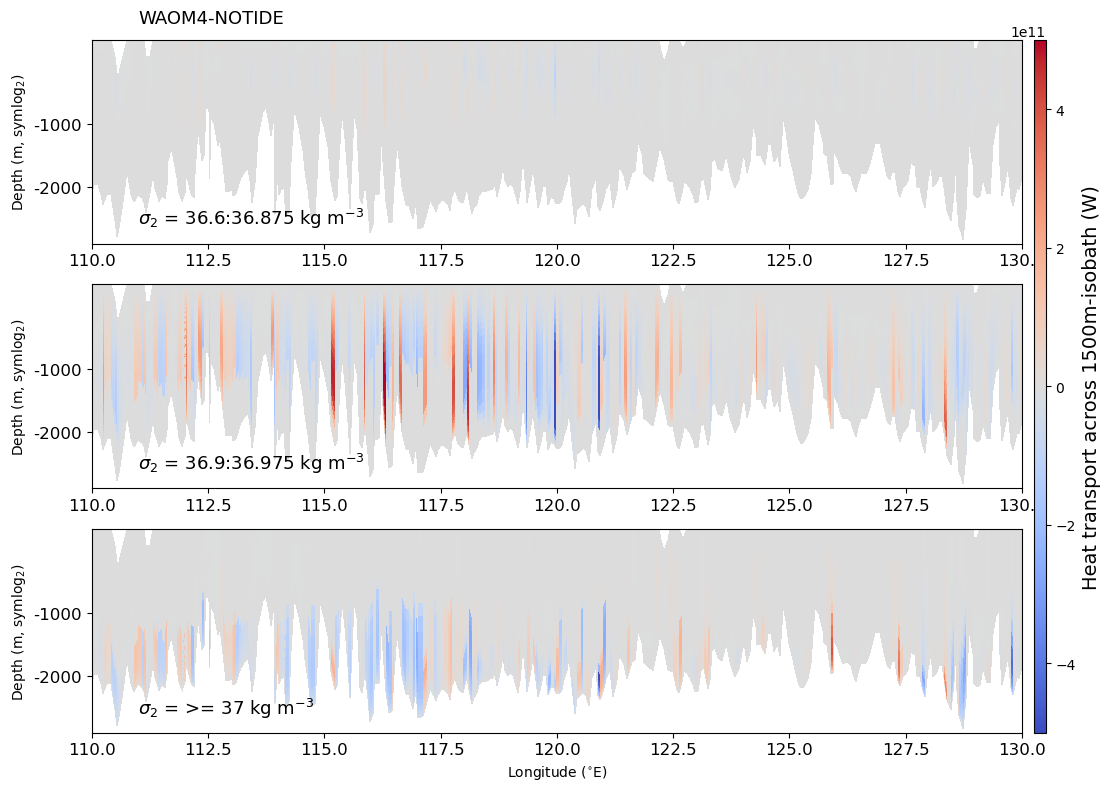

In [69]:
fig, ax = plt.subplots(nrows=3, figsize = (12, 9))
ax[0].text(111,100,'WAOM4-NOTIDE',fontsize=13)
aa = ax[0].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4kmNT_irho2[:,20:28,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[0].text(111,-1600,'$\sigma_{2}$ = 36.6:36.875 kg m$^{-3}$',fontsize=13)
ax[0].set_xlim(110,130)

ax[1].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4kmNT_irho2[:,28:32,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[1].text(111,-1600,'$\sigma_{2}$ = 36.9:36.975 kg m$^{-3}$',fontsize=13)
ax[1].set_xlim(110,130)

ax[2].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4kmNT_irho2[:,32:35,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[2].text(111,-1600,'$\sigma_{2}$ = >= 37 kg m$^{-3}$',fontsize=13)
ax[2].set_xlim(110,130)

for bb in range(0,3):
    # ax[bb].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
    ax[bb].set_yscale('symlog',base = 2, linthresh=700)
    ax[bb].set_ylabel('Depth (m, symlog$_2$)')
    ax[bb].set_yticklabels(['-2000','-1000','-500'])
    ax[bb].set_aspect('auto')
    ax[bb].tick_params(labelsize=12)
ax[2].set_xlabel('Longitude ($^{\circ}$E)')

cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(aa, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport across 1500m-isobath (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_Net_heat_transp_1500m_rho2_annual_EAntTIS.png"
plt.savefig(name_fig, dpi=300)

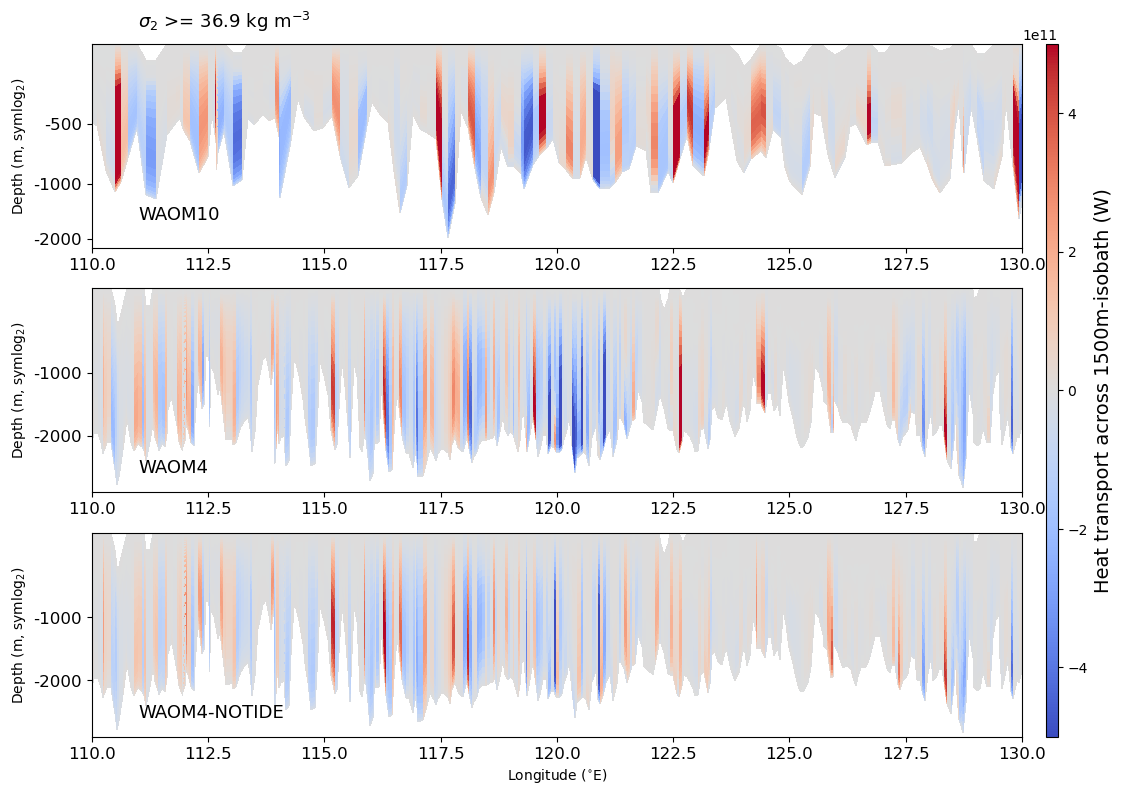

In [76]:
# 1 figure for sig2>=36.9 for WAOM10x4x4NT

fig, ax = plt.subplots(nrows=3, figsize = (12, 9))
ax[0].text(111,100,'$\sigma_{2}$ >= 36.9 kg m$^{-3}$',fontsize=13)
aa=ax[0].pcolormesh(lon_along_10km[ind_TIS_10km],np.nanmean(z_rho_10km.fillna(0)[:,:,ind_TIS_10km], axis=0),np.nanmean(np.nansum(Net_heat_transport_10km_irho2[:,28:35,:,ind_TIS_10km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[0].text(111,-1600,'WAOM10',fontsize=13)
ax[0].set_xlim(110,130)

aa=ax[1].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4km_irho2[:,28:35,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[1].text(111,-1600,'WAOM4',fontsize=13)
ax[1].set_xlim(110,130)

aa=ax[2].pcolormesh(lon_along_4km[ind_TIS_4km],z_rho_4km.fillna(0)[:,ind_TIS_4km],np.nanmean(np.nansum(Net_heat_transport_4kmNT_irho2[:,28:35,:,ind_TIS_4km], axis=1), axis=0), vmin=-5e11, vmax=5e11, cmap='coolwarm')
ax[2].text(111,-1600,'WAOM4-NOTIDE',fontsize=13)
ax[2].set_xlim(110,130)

for bb in range(0,3):
    # ax[bb].text(1,-2500,'$\sigma_{2}$ = 37.1:37.125 kg m$^{-3}$',fontsize=14)
    ax[bb].set_yscale('symlog',base = 2, linthresh=700)
    ax[bb].set_ylabel('Depth (m, symlog$_2$)')
    ax[bb].set_yticklabels(['-2000','-1000','-500'])
    ax[bb].set_aspect('auto')
    ax[bb].tick_params(labelsize=12)
ax[2].set_xlabel('Longitude ($^{\circ}$E)')

cax1 = plt.axes([0.92, 0.11, 0.01, 0.77])
cb = plt.colorbar(aa, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport across 1500m-isobath (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_Net_heat_transp_1500m_rho2_annual_EAntTIS.png"
plt.savefig(name_fig, dpi=300)

In [70]:
print(lon_along_10km[int(ind_EAnt_10km[35])])
# print(lon_along_10km.shape, int(ind_EAnt_10km[35]))

<xarray.Variable ()>
array(60.089004)
Attributes:
    long_name:      longitude of u-points
    standard_name:  longitude
    units:          degree_east


In [71]:
# plt.plot(ind_EAnt_10km[35:-1]) # remove jumping in indexes, 10km
# plt.plot(ind_EAnt_4km[111:-1]) # remove jumping in indexes, 4km


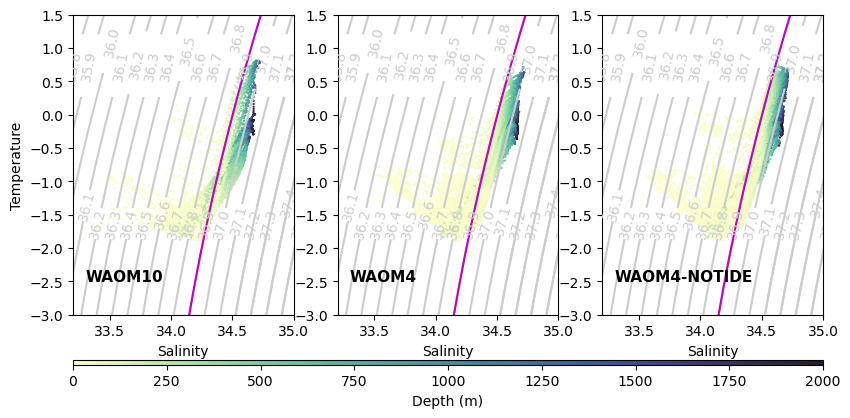

2023-10-10 17:56:54,950 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:54,954 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:54,959 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:54,990 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:54,999 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,009 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,019 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,059 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,062 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,066 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,072 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,079 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,092 - distributed.nanny - WARNING - Restarting worker
2023-10-10 17:56:55,101 - distributed.

In [80]:
import cmocean

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))
# normal isopycnals
for bb in range(0,3):
    CS1 = ax[bb].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
    ax[bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
    CS2 = ax[bb].contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='solid', colors=[(.8,0.8,0.8)], linewidth=0.1)
    ax[bb].clabel(CS2, CS2.levels, inline=True, fontsize=10)
    ax[bb].set_xlim([33.2,35])
    ax[bb].set_ylim([-3,1.5])
    ax[0].set_ylabel('Temperature')
    ax[bb].set_xlabel('Salinity')# East antarct.

    c369 = ax[bb].contour(Si,Ti,dens.transpose(), levels=[36.9, 37.9],linestyles='solid', colors='m', linewidth=0.1)
    ax[bb].clabel(CS1, CS1.levels, inline=True, fontsize=10)
            
sc = ax[0].scatter(salt_10km.isel(contour_index_array=ind_TIS_10km[:]).mean('ocean_time'),temp_10km.isel(contour_index_array=ind_TIS_10km[:]).mean('ocean_time'),
                 c=-z_rho_10km.isel(contour_index_array=ind_TIS_10km[:]).mean('ocean_time'),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[0].text(33.3,-2.5,'WAOM10', fontsize=11, fontweight='bold')

sc = ax[1].scatter(salt_4km.isel(contour_index_array=ind_TIS_4km[:]).mean('ocean_time'),temp_4km.isel(contour_index_array=ind_TIS_4km[:]).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_TIS_4km[:]),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[1].text(33.3,-2.5,'WAOM4', fontsize=11, fontweight='bold')

sc = ax[2].scatter(salt_4kmNT.isel(contour_index_array=ind_TIS_4km[:]).mean('ocean_time'),temp_4kmNT.isel(contour_index_array=ind_TIS_4km[:]).mean('ocean_time'),
                 c=-z_rho_4km.isel(contour_index_array=ind_TIS_4km[:]),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap=cmocean.cm.deep, vmin=0, vmax=2000)
ax[2].text(33.3,-2.5,'WAOM4-NOTIDE', fontsize=11, fontweight='bold')

# - cbar horiz
cbar_ax1 = fig.add_axes([0.25, 0.2, 0.5, 0.01])
fig.colorbar(sc, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Depth (m)')

plt.subplots_adjust(left=0.25, right=0.75, bottom=0.3, top=0.9)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_TSdiag_1500m_rho2_annnual_EastAnt.png"
plt.savefig(name_fig, dpi=300)